In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import crosstab
import matplotlib.pyplot as plt
from IPython.display import display
#import plotly.express as px

In [2]:
data=pd.read_csv('mexicoproperties.csv')

In [3]:
data.head(10)

Unnamed: 0                                        id  created_on operation  \
0           0  f148cbb2c2ff6ad7476f44d219b7af14bc717754  2015-01-05      rent   
1           1  5450e023897c87100feb23fc4d5ecec1ac1658d4  2015-01-05      rent   
2           2  e11cfdc485256c33a8af75e9b614293efdea5c05  2015-01-05      rent   
3           3  c108c5e0def8a486e4d43945aa4e7cef1dda5cae  2015-01-05      rent   
4           4  577da74be713b9df810ef4e5100d9c374bb7441f  2015-02-22      rent   
5           5  3f5b9f5ab49cdc89d834e665634841f2a70f1047  2015-01-24      rent   
6           6  fe754f01117c46733844ccf321e659e12dd14f8a  2015-02-24      rent   
7           7  a7d5d14136257d5479cf25615a00b6028f93be9c  2015-02-20      rent   
8           8  f93ba874f15960a6a122876a8787145a97eaeee9  2014-11-20      rent   
9           9  7d3d97a0e9356ae9dd23e77305fd143dabd40446  2014-11-20      rent   

  property_type    place_name place_with_parent_names country_name  \
0         house       Morelos        |México|Morelos|       México   
1         house       Morelos        |México|Morelos|       México   
2         store       Morelos        |México|Morelos|       México   
3         store       Tabasco        |México|Tabasco|       México   
4         house     Querétaro      |México|Querétaro|       México   
5     apartment    Nuevo León     |México|Nuevo León|       México   
6         store    Nuevo León     |México|Nuevo León|       México   
7         house  Quintana Roo   |México|Quintana Roo|       México   
8     apartment  Quintana Roo   |México|Quintana Roo|       México   
9         store  Quintana Roo   |México|Quintana Roo|       México   

     state_name        lat  ...    price  currency price_aprox_local_currency  \
0       Morelos  18.824124  ...  10000.0       MXN                   11184.51   
1       Morelos  18.825402  ...  20000.0       MXN                   22485.30   
2       Morelos  18.823515  ...   5000.0       MXN                    5652.51   
3       Tabasco  17.994583  ...   8000.0       MXN                    7586.83   
4     Querétaro        NaN  ...  10000.0       MXN                   11711.01   
5    Nuevo León        NaN  ...  22462.0       MXN                   25253.33   
6    Nuevo León        NaN  ...  19000.0       MXN                   22115.43   
7  Quintana Roo  21.133346  ...  12500.0       MXN                   14638.67   
8  Quintana Roo  18.509356  ...   4150.0       MXN                    4761.45   
9  Quintana Roo  18.509356  ...   4000.0       MXN                    4589.44   

   price_aprox_usd  surface_total_in_m2  price_usd_per_m2  price_per_m2  \
0           631.99                500.0          1.263980           NaN   
1          1270.55                480.0          2.646979           NaN   
2           319.40                180.0          1.774444           NaN   
3           428.70                528.0          0.811932           NaN   
4           661.74                  NaN               NaN     62.500000   
5          1426.96                  0.0               NaN           NaN   
6          1249.65                  NaN               NaN    158.333333   
7           827.17                  NaN               NaN     65.789474   
8           269.05                  NaN               NaN    103.750000   
9           259.33                  NaN               NaN    333.333333   

   rooms  expenses                                              title  
0    NaN       NaN   LINDA CASA EN ZONA COMERCIAL IDEAL PARA OFICINAS  
1    NaN       NaN             PRECIOSA CASA SOBRE AVENIDA IMPORTANTE  
2    NaN       NaN       INTERESANTE LOCAL EN RENTA FRENTE AL CANARIO  
3    NaN       NaN                      Plaza Moro, Cardenas, Tabasco  
4    NaN       NaN                  Casa en Renta en San Juan del Río  
5    NaN       NaN  Departamentos EQUIPADOS en RENTA Zona Valle Po...  
6    NaN       NaN                        Local en Renta en Guadalupe  
7    NaN       NaN                     Casa en

###  Exploring the data 

In [4]:
# Fields in the table 
data.columns

Index(['Unnamed: 0', 'id', 'created_on', 'operation', 'property_type',
       'place_name', 'place_with_parent_names', 'country_name', 'state_name',
       'lat', 'lon', 'price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'rooms', 'expenses', 'title'],
      dtype='object')

In [5]:
#Number of columns 
#Number of rows

In [6]:
data.shape

(3396421, 21)

In [7]:
No_rows=data.shape[0]
No_rows

3396421

In [8]:
No_field=data.shape[1]
No_field

21

In [9]:
# Missing Data 
data.isnull().sum()

Unnamed: 0                          0
id                                  0
created_on                          0
operation                           0
property_type                       0
place_name                          0
place_with_parent_names             0
country_name                        0
state_name                          0
lat                            915943
lon                            915943
price                           37510
currency                       139660
price_aprox_local_currency      37510
price_aprox_usd                 37510
surface_total_in_m2           1693437
price_usd_per_m2              2170011
price_per_m2                   594381
rooms                         3281832
expenses                      3373842
title                               0
dtype: int64

In [10]:
data.surface_total_in_m2.min()

-133.0

In [11]:
data.describe()

Unnamed: 0           lat           lon         price  \
count  3.396421e+06  2.480478e+06  2.480478e+06  3.358911e+06   
mean   1.698210e+06  2.093369e+01 -9.876158e+01  2.643961e+06   
std    9.804624e+05  2.990206e+00  5.341055e+00  6.416914e+06   
min    0.000000e+00 -2.869301e+01 -1.316414e+02  0.000000e+00   
25%    8.491050e+05  1.922986e+01 -1.003984e+02  3.690000e+05   
50%    1.698210e+06  2.038247e+01 -9.924189e+01  1.390000e+06   
75%    2.547315e+06  2.112955e+01 -9.813249e+01  2.990000e+06   
max    3.396420e+06  8.998116e+01  1.052345e+02  9.500000e+08   

       price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
count                3.358911e+06     3.358911e+06         1.702984e+06   
mean                 3.266251e+06     1.787313e+05         4.488242e+02   
std                  8.702311e+06     4.755819e+05         3.331339e+03   
min                  0.000000e+00     0.000000e+00        -1.330000e+02   
25%                  4.512499e+05     2.476366e+04         6.000000e+01   
50%                  1.555766e+06     8.505327e+04         1.550000e+02   
75%                  3.374615e+06     1.843313e+05         3.100000e+02   
max                  9.452642e+08     4.954910e+07         2.000000e+05   

       price_usd_per_m2  price_per_m2          rooms      expenses  
count      1.226410e+06  2.802040e+06  114589.000000  2.257900e+04  
mean       7.536001e+02  1.621425e+04       2.865956  2.631509e+03  
std        1.785712e+03  4.809894e+05       1.109116  2.711193e+04  
min       -6.998428e+04  3.972611e-06       1.000000  1.000000e+00  
25%        2.251490e+02  5.500000e+03       2.000000  3.500000e+02  
50%        5.408698e+02  1.036364e+04       3.000000  1.000000e+03  
75%        9.238062e+02  1.514899e+04       3.000000  2.600000e+03  
max        3.706319e+05  1.995000e+08      28.000000  1.800000e+06

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3396421 entries, 0 to 3396420
Data columns (total 21 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Unnamed: 0                  int64  
 1   id                          object 
 2   created_on                  object 
 3   operation                   object 
 4   property_type               object 
 5   place_name                  object 
 6   place_with_parent_names     object 
 7   country_name                object 
 8   state_name                  object 
 9   lat                         float64
 10  lon                         float64
 11  price                       float64
 12  currency                    object 
 13  price_aprox_local_currency  float64
 14  price_aprox_usd             float64
 15  surface_total_in_m2         float64
 16  price_usd_per_m2            float64
 17  price_per_m2                float64
 18  rooms                       float64
 19  expenses             

In [13]:
data.isna().sum()

Unnamed: 0                          0
id                                  0
created_on                          0
operation                           0
property_type                       0
place_name                          0
place_with_parent_names             0
country_name                        0
state_name                          0
lat                            915943
lon                            915943
price                           37510
currency                       139660
price_aprox_local_currency      37510
price_aprox_usd                 37510
surface_total_in_m2           1693437
price_usd_per_m2              2170011
price_per_m2                   594381
rooms                         3281832
expenses                      3373842
title                               0
dtype: int64

In [14]:
#duplicate data entry

In [15]:
data.duplicated().sum()

0

# Data Cleaning 

We need to drop the following columns

Country_name: There is only one country, Mexico , under considertion 

place_with_parent_names: We already have columns for places, all the places are in Mexico

Id: it is not needed 
    
Rooms: There is no data entry for this feature or variable
    
Expenses:There is no data entry for this feature or variable
    
Title: It is not relevant to my analysis 

### Remove Negative values from  column surface_total_in_m2 and column price_usd_per_m2 

In [16]:
data.loc[data['surface_total_in_m2']<0,'surface_total_in_m2']=abs(data.surface_total_in_m2)
data.loc[data['price_usd_per_m2']<0,'price_usd_per_m2']=abs(data.price_usd_per_m2)
data.describe()

Unnamed: 0           lat           lon         price  \
count  3.396421e+06  2.480478e+06  2.480478e+06  3.358911e+06   
mean   1.698210e+06  2.093369e+01 -9.876158e+01  2.643961e+06   
std    9.804624e+05  2.990206e+00  5.341055e+00  6.416914e+06   
min    0.000000e+00 -2.869301e+01 -1.316414e+02  0.000000e+00   
25%    8.491050e+05  1.922986e+01 -1.003984e+02  3.690000e+05   
50%    1.698210e+06  2.038247e+01 -9.924189e+01  1.390000e+06   
75%    2.547315e+06  2.112955e+01 -9.813249e+01  2.990000e+06   
max    3.396420e+06  8.998116e+01  1.052345e+02  9.500000e+08   

       price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
count                3.358911e+06     3.358911e+06         1.702984e+06   
mean                 3.266251e+06     1.787313e+05         4.488256e+02   
std                  8.702311e+06     4.755819e+05         3.331339e+03   
min                  0.000000e+00     0.000000e+00         0.000000e+00   
25%                  4.512499e+05     2.476366e+04         6.000000e+01   
50%                  1.555766e+06     8.505327e+04         1.550000e+02   
75%                  3.374615e+06     1.843313e+05         3.100000e+02   
max                  9.452642e+08     4.954910e+07         2.000000e+05   

       price_usd_per_m2  price_per_m2          rooms      expenses  
count      1.226410e+06  2.802040e+06  114589.000000  2.257900e+04  
mean       7.547032e+02  1.621425e+04       2.865956  2.631509e+03  
std        1.785246e+03  4.809894e+05       1.109116  2.711193e+04  
min        0.000000e+00  3.972611e-06       1.000000  1.000000e+00  
25%        2.251778e+02  5.500000e+03       2.000000  3.500000e+02  
50%        5.408786e+02  1.036364e+04       3.000000  1.000000e+03  
75%        9.238062e+02  1.514899e+04       3.000000  2.600000e+03  
max        3.706319e+05  1.995000e+08      28.000000  1.800000e+06

### Replace Zero values with NAN


In [17]:
data.replace([0], np.nan, inplace=True)

### Drop the following columns base on the reasons given below

['Unnamed: 0','id','country_name','place_with_parent_names','rooms','expenses','title']

In [18]:
data1=data.drop(columns=['Unnamed: 0','id','country_name','place_with_parent_names','rooms','expenses','title'])

In [19]:
data1.head(5)

created_on operation property_type place_name state_name        lat  \
0  2015-01-05      rent         house    Morelos    Morelos  18.824124   
1  2015-01-05      rent         house    Morelos    Morelos  18.825402   
2  2015-01-05      rent         store    Morelos    Morelos  18.823515   
3  2015-01-05      rent         store    Tabasco    Tabasco  17.994583   
4  2015-02-22      rent         house  Querétaro  Querétaro        NaN   

         lon    price currency  price_aprox_local_currency  price_aprox_usd  \
0 -98.948113  10000.0      MXN                    11184.51           631.99   
1 -98.946803  20000.0      MXN                    22485.30          1270.55   
2 -98.949789   5000.0      MXN                     5652.51           319.40   
3 -93.386271   8000.0      MXN                     7586.83           428.70   
4        NaN  10000.0      MXN                    11711.01           661.74   

   surface_total_in_m2  price_usd_per_m2  price_per_m2  
0                500.0          1.263980           NaN  
1                480.0          2.646979           NaN  
2                180.0          1.774444           NaN  
3                528.0          0.811932           NaN  
4                  NaN               NaN          62.5

In [20]:
data1.describe()

lat           lon         price  price_aprox_local_currency  \
count  2.480478e+06  2.480478e+06  3.250804e+06                3.250804e+06   
mean   2.093369e+01 -9.876158e+01  2.731887e+06                3.374872e+06   
std    2.990206e+00  5.341055e+00  6.504302e+06                8.825082e+06   
min   -2.869301e+01 -1.316414e+02  5.000000e+01                8.847600e+02   
25%    1.922986e+01 -1.003984e+02  4.550000e+05                5.491673e+05   
50%    2.038247e+01 -9.924189e+01  1.470000e+06                1.639832e+06   
75%    2.112955e+01 -9.813249e+01  3.075693e+06                3.481774e+06   
max    8.998116e+01  1.052345e+02  9.500000e+08                9.452642e+08   

       price_aprox_usd  surface_total_in_m2  price_usd_per_m2  price_per_m2  
count     3.250804e+06         1.335112e+06      1.226371e+06  2.802040e+06  
mean      1.846751e+05         5.724934e+02      7.547272e+02  1.621425e+04  
std       4.822884e+05         3.752982e+03      1.785270e+03  4.809894e+05  
min       5.000000e+01         1.000000e+00      1.762314e-03  3.972611e-06  
25%       2.982084e+04         1.200000e+02      2.251778e+02  5.500000e+03  
50%       8.943537e+04         2.000000e+02      5.409214e+02  1.036364e+04  
75%       1.895544e+05         3.870000e+02      9.238062e+02  1.514899e+04  
max       4.954910e+07         2.000000e+05      3.706319e+05  1.995000e+08

In [21]:
data1.tail(5)

created_on operation property_type        place_name  \
3396416  2017-05-21      sell     apartment  Distrito Federal   
3396417  2017-07-16      sell     apartment  Distrito Federal   
3396418  2017-07-06      sell     apartment  Distrito Federal   
3396419  2017-06-08      sell     apartment  Distrito Federal   
3396420  2017-05-29      sell     apartment  Distrito Federal   

              state_name  lat  lon      price currency  \
3396416  Baja California  NaN  NaN  4500000.0      MXN   
3396417  Baja California  NaN  NaN  4500000.0      MXN   
3396418  Baja California  NaN  NaN  4500000.0      MXN   
3396419  Baja California  NaN  NaN  4500000.0      MXN   
3396420  Baja California  NaN  NaN  4500000.0      MXN   

         price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
3396416                  4502228.03        253195.89                  NaN   
3396417                  4502228.03        253195.89                  NaN   
3396418                  4502228.03        253195.89                  NaN   
3396419                  4502228.03        253195.89                  NaN   
3396420                  4502228.03        253195.89                  NaN   

         price_usd_per_m2  price_per_m2  
3396416               NaN  50000.000000  
3396417               NaN  56250.000000  
3396418               NaN  40909.090909  
3396419               NaN  48387.096774  
3396420               NaN  23560.209424

### Dropping the NaN values 

In [22]:
data1.isna().sum()

created_on                          0
operation                           0
property_type                       0
place_name                          0
state_name                          0
lat                            915943
lon                            915943
price                          145617
currency                       139660
price_aprox_local_currency     145617
price_aprox_usd                145617
surface_total_in_m2           2061309
price_usd_per_m2              2170050
price_per_m2                   594381
dtype: int64

 ### The NA values in the column surface_total_in_m2 can be replaced with 
 price/price_per_m2
    

In [23]:
data1.surface_total_in_m2=data1.surface_total_in_m2.fillna(data1.price/data1.price_per_m2)

In [24]:
data1.describe()

lat           lon         price  price_aprox_local_currency  \
count  2.480478e+06  2.480478e+06  3.250804e+06                3.250804e+06   
mean   2.093369e+01 -9.876158e+01  2.731887e+06                3.374872e+06   
std    2.990206e+00  5.341055e+00  6.504302e+06                8.825082e+06   
min   -2.869301e+01 -1.316414e+02  5.000000e+01                8.847600e+02   
25%    1.922986e+01 -1.003984e+02  4.550000e+05                5.491673e+05   
50%    2.038247e+01 -9.924189e+01  1.470000e+06                1.639832e+06   
75%    2.112955e+01 -9.813249e+01  3.075693e+06                3.481774e+06   
max    8.998116e+01  1.052345e+02  9.500000e+08                9.452642e+08   

       price_aprox_usd  surface_total_in_m2  price_usd_per_m2  price_per_m2  
count     3.250804e+06         3.164072e+06      1.226371e+06  2.802040e+06  
mean      1.846751e+05         5.868653e+03      7.547272e+02  1.621425e+04  
std       4.822884e+05         2.190891e+06      1.785270e+03  4.809894e+05  
min       5.000000e+01         1.000000e+00      1.762314e-03  3.972611e-06  
25%       2.982084e+04         9.500000e+01      2.251778e+02  5.500000e+03  
50%       8.943537e+04         1.600000e+02      5.409214e+02  1.036364e+04  
75%       1.895544e+05         2.900000e+02      9.238062e+02  1.514899e+04  
max       4.954910e+07         1.435433e+09      3.706319e+05  1.995000e+08

In [25]:
data1.isna().sum()

created_on                          0
operation                           0
property_type                       0
place_name                          0
state_name                          0
lat                            915943
lon                            915943
price                          145617
currency                       139660
price_aprox_local_currency     145617
price_aprox_usd                145617
surface_total_in_m2            232349
price_usd_per_m2              2170050
price_per_m2                   594381
dtype: int64

### The NA values in the price_usd_per_m2 can be replaced with

price_aprox_usd/surface_total_in_m2

In [26]:
data1.price_usd_per_m2=data1.price_usd_per_m2.fillna(data1.price_aprox_usd/data1.surface_total_in_m2)
data1.replace([np.inf, -np.inf], np.nan, inplace=True)

In [27]:
data1.describe()

lat           lon         price  price_aprox_local_currency  \
count  2.480478e+06  2.480478e+06  3.250804e+06                3.250804e+06   
mean   2.093369e+01 -9.876158e+01  2.731887e+06                3.374872e+06   
std    2.990206e+00  5.341055e+00  6.504302e+06                8.825082e+06   
min   -2.869301e+01 -1.316414e+02  5.000000e+01                8.847600e+02   
25%    1.922986e+01 -1.003984e+02  4.550000e+05                5.491673e+05   
50%    2.038247e+01 -9.924189e+01  1.470000e+06                1.639832e+06   
75%    2.112955e+01 -9.813249e+01  3.075693e+06                3.481774e+06   
max    8.998116e+01  1.052345e+02  9.500000e+08                9.452642e+08   

       price_aprox_usd  surface_total_in_m2  price_usd_per_m2  price_per_m2  
count     3.250804e+06         3.164072e+06      3.055331e+06  2.802040e+06  
mean      1.846751e+05         5.868653e+03      9.097692e+02  1.621425e+04  
std       4.822884e+05         2.190891e+06      1.612727e+04  4.809894e+05  
min       5.000000e+01         1.000000e+00      1.999277e-07  3.972611e-06  
25%       2.982084e+04         9.500000e+01      3.060975e+02  5.500000e+03  
50%       8.943537e+04         1.600000e+02      5.831787e+02  1.036364e+04  
75%       1.895544e+05         2.900000e+02      9.165433e+02  1.514899e+04  
max       4.954910e+07         1.435433e+09      5.900000e+06  1.995000e+08

In [28]:
data1.isna().sum()

created_on                         0
operation                          0
property_type                      0
place_name                         0
state_name                         0
lat                           915943
lon                           915943
price                         145617
currency                      139660
price_aprox_local_currency    145617
price_aprox_usd               145617
surface_total_in_m2           232349
price_usd_per_m2              341090
price_per_m2                  594381
dtype: int64

### The NA values in the price_per_m2 can be replaced with

price_per_m2/surface_total_in_m2

In [29]:
data1.price_per_m2=data1.price_per_m2.fillna(data1.price/data1.surface_total_in_m2)


In [30]:
data1.describe()

lat           lon         price  price_aprox_local_currency  \
count  2.480478e+06  2.480478e+06  3.250804e+06                3.250804e+06   
mean   2.093369e+01 -9.876158e+01  2.731887e+06                3.374872e+06   
std    2.990206e+00  5.341055e+00  6.504302e+06                8.825082e+06   
min   -2.869301e+01 -1.316414e+02  5.000000e+01                8.847600e+02   
25%    1.922986e+01 -1.003984e+02  4.550000e+05                5.491673e+05   
50%    2.038247e+01 -9.924189e+01  1.470000e+06                1.639832e+06   
75%    2.112955e+01 -9.813249e+01  3.075693e+06                3.481774e+06   
max    8.998116e+01  1.052345e+02  9.500000e+08                9.452642e+08   

       price_aprox_usd  surface_total_in_m2  price_usd_per_m2  price_per_m2  
count     3.250804e+06         3.164072e+06      3.055331e+06  3.055331e+06  
mean      1.846751e+05         5.868653e+03      9.097692e+02  1.593099e+04  
std       4.822884e+05         2.190891e+06      1.612727e+04  4.606774e+05  
min       5.000000e+01         1.000000e+00      1.999277e-07  3.972611e-06  
25%       2.982084e+04         9.500000e+01      3.060975e+02  5.263158e+03  
50%       8.943537e+04         1.600000e+02      5.831787e+02  1.033333e+04  
75%       1.895544e+05         2.900000e+02      9.165433e+02  1.528239e+04  
max       4.954910e+07         1.435433e+09      5.900000e+06  1.995000e+08

In [31]:
data1.isna().sum()

created_on                         0
operation                          0
property_type                      0
place_name                         0
state_name                         0
lat                           915943
lon                           915943
price                         145617
currency                      139660
price_aprox_local_currency    145617
price_aprox_usd               145617
surface_total_in_m2           232349
price_usd_per_m2              341090
price_per_m2                  341090
dtype: int64

### Drop rows where price is NaN


In [32]:
data2=data1.dropna(subset=['price'])

In [33]:
data2.describe()

lat           lon         price  price_aprox_local_currency  \
count  2.361416e+06  2.361416e+06  3.250804e+06                3.250804e+06   
mean   2.091525e+01 -9.878102e+01  2.731887e+06                3.374872e+06   
std    2.985924e+00  5.309449e+00  6.504302e+06                8.825082e+06   
min    1.470887e+01 -1.316414e+02  5.000000e+01                8.847600e+02   
25%    1.920921e+01 -1.003975e+02  4.550000e+05                5.491673e+05   
50%    2.020148e+01 -9.924253e+01  1.470000e+06                1.639832e+06   
75%    2.112758e+01 -9.817825e+01  3.075693e+06                3.481774e+06   
max    8.991676e+01  1.052345e+02  9.500000e+08                9.452642e+08   

       price_aprox_usd  surface_total_in_m2  price_usd_per_m2  price_per_m2  
count     3.250804e+06         3.055331e+06      3.055331e+06  3.055331e+06  
mean      1.846751e+05         6.043464e+03      9.097692e+02  1.593099e+04  
std       4.822884e+05         2.229537e+06      1.612727e+04  4.606774e+05  
min       5.000000e+01         1.000000e+00      1.999277e-07  3.972611e-06  
25%       2.982084e+04         9.500000e+01      3.060975e+02  5.263158e+03  
50%       8.943537e+04         1.600000e+02      5.831787e+02  1.033333e+04  
75%       1.895544e+05         2.860000e+02      9.165433e+02  1.528239e+04  
max       4.954910e+07         1.435433e+09      5.900000e+06  1.995000e+08

In [34]:
data2.isna().sum()

created_on                         0
operation                          0
property_type                      0
place_name                         0
state_name                         0
lat                           889388
lon                           889388
price                              0
currency                           0
price_aprox_local_currency         0
price_aprox_usd                    0
surface_total_in_m2           195473
price_usd_per_m2              195473
price_per_m2                  195473
dtype: int64

In [35]:
data2.shape

(3250804, 14)

##### Dropping NA values from  lon and lat column will further reduce our data volume conisderably. So , we treat lon and lat columns separately since they are not relvevant to our quantative analysis. We drop the lon and lat column from the data 

In [36]:
data3=data2.dropna(subset=['lon','lat'])

In [37]:
data3.isnull().sum()

created_on                         0
operation                          0
property_type                      0
place_name                         0
state_name                         0
lat                                0
lon                                0
price                              0
currency                           0
price_aprox_local_currency         0
price_aprox_usd                    0
surface_total_in_m2           150754
price_usd_per_m2              150754
price_per_m2                  150754
dtype: int64

In [38]:
data3.head(10)

created_on operation property_type    place_name    state_name        lat  \
0   2015-01-05      rent         house       Morelos       Morelos  18.824124   
1   2015-01-05      rent         house       Morelos       Morelos  18.825402   
2   2015-01-05      rent         store       Morelos       Morelos  18.823515   
3   2015-01-05      rent         store       Tabasco       Tabasco  17.994583   
7   2015-02-20      rent         house  Quintana Roo  Quintana Roo  21.133346   
8   2014-11-20      rent     apartment  Quintana Roo  Quintana Roo  18.509356   
9   2014-11-20      rent         store  Quintana Roo  Quintana Roo  18.509356   
10  2015-02-26      rent     apartment  Quintana Roo  Quintana Roo  21.152753   
11  2015-02-24      rent         house        Colima        Colima  19.253490   
12  2015-02-24      rent         store        Colima        Colima  19.248841   

           lon    price currency  price_aprox_local_currency  price_aprox_usd  \
0   -98.948113  10000.0      MXN                    11184.51           631.99   
1   -98.946803  20000.0      MXN                    22485.30          1270.55   
2   -98.949789   5000.0      MXN                     5652.51           319.40   
3   -93.386271   8000.0      MXN                     7586.83           428.70   
7   -86.861353  12500.0      MXN                    14638.67           827.17   
8   -88.314668   4150.0      MXN                     4761.45           269.05   
9   -88.314668   4000.0      MXN                     4589.44           259.33   
10  -86.849743   9500.0      MXN                    10500.86           593.36   
11 -103.714803   9000.0      MXN                     9375.85           529.79   
12 -103.726948   2500.0      MXN                     2604.33           147.16   

    surface_total_in_m2  price_usd_per_m2  price_per_m2  
0                 500.0          1.263980     20.000000  
1                 480.0          2.646979     41.666667  
2                 180.0          1.774444     27.777778  
3                 528.0          0.811932     15.151515  
7                 190.0          4.353526     65.789474  
8                  40.0          6.726250    103.750000  
9                  12.0         21.610833    333.333333  
10                 95.0          6.245895    100.000000  
11                225.0          2.354622     40.000000  
12                 35.0          4.204571     71.428571

In [39]:
data3.dropna()

created_on operation property_type           place_name  \
0        2015-01-05      rent         house              Morelos   
1        2015-01-05      rent         house              Morelos   
2        2015-01-05      rent         store              Morelos   
3        2015-01-05      rent         store              Tabasco   
7        2015-02-20      rent         house         Quintana Roo   
...             ...       ...           ...                  ...   
3396408  2017-06-26      sell     apartment             Guerrero   
3396409  2017-07-08      sell     apartment             Jiutepec   
3396412  2017-05-19      sell     apartment          Guadalajara   
3396413  2017-05-04      sell     apartment               Cancún   
3396414  2017-07-09      sell     apartment  Tlalnepantla de Baz   

               state_name        lat         lon      price currency  \
0                 Morelos  18.824124  -98.948113    10000.0      MXN   
1                 Morelos  18.825402  -98.946803    20000.0      MXN   
2                 Morelos  18.823515  -98.949789     5000.0      MXN   
3                 Tabasco  17.994583  -93.386271     8000.0      MXN   
7            Quintana Roo  21.133346  -86.861353    12500.0      MXN   
...                   ...        ...         ...        ...      ...   
3396408          Guerrero  16.775039  -99.796154  4500000.0      MXN   
3396409           Morelos  18.882725  -99.163605  4500000.0      MXN   
3396412           Jalisco  20.671580 -103.363970  4500000.0      MXN   
3396413      Quintana Roo  21.136125  -86.830506  4500000.0      MXN   
3396414  Estado de México  19.553735  -99.218439  4500000.0      MXN   

         price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
0                          11184.51           631.99                500.0   
1                          22485.30          1270.55                480.0   
2                           5652.51           319.40                180.0   
3                           7586.83           428.70                528.0   
7                          14638.67           827.17                190.0   
...                             ...              ...                  ...   
3396408                  4502228.03        253195.89                110.0   
3396409                  4502228.03        253195.89                 65.0   
3396412                  4502228.03        253195.89                133.0   
3396413                  4502228.03        253195.89                215.0   
3396414                  4502228.03        253195.89                137.0   

         price_usd_per_m2  price_per_m2  
0                1.263980     20.000000  
1                2.646979     41.666667  
2                1.774444     27.777778  
3                0.811932     15.151515  
7                4.353526     65.789474  
...                   ...           ...  
3396408       2301.780818  40909.090909  
3396409       3895.321385  69230.769231  
3396412       1903.728496  33834.586466  
3396413       1177.655302  20930.232558  
3396414       1848.145182  32846.715328  

[2210662 rows x 14 columns]

In [40]:
data2.shape

(3250804, 14)

#### Data2 has lon and lat columns while Data3 does not 

In [41]:
data3.shape

(2361416, 14)

In [42]:
records_loss=(data.shape[0]-data3.shape[0])/data.shape[0]
records_loss

0.30473401265626376

We have lost about 10% of our records/rows to data cleaning. 10% data loss is not bad since the data volume is very large.  

# Exploratory Data Analysis 

In [43]:
data=data3

In [44]:
data.head(10)

created_on operation property_type    place_name    state_name        lat  \
0   2015-01-05      rent         house       Morelos       Morelos  18.824124   
1   2015-01-05      rent         house       Morelos       Morelos  18.825402   
2   2015-01-05      rent         store       Morelos       Morelos  18.823515   
3   2015-01-05      rent         store       Tabasco       Tabasco  17.994583   
7   2015-02-20      rent         house  Quintana Roo  Quintana Roo  21.133346   
8   2014-11-20      rent     apartment  Quintana Roo  Quintana Roo  18.509356   
9   2014-11-20      rent         store  Quintana Roo  Quintana Roo  18.509356   
10  2015-02-26      rent     apartment  Quintana Roo  Quintana Roo  21.152753   
11  2015-02-24      rent         house        Colima        Colima  19.253490   
12  2015-02-24      rent         store        Colima        Colima  19.248841   

           lon    price currency  price_aprox_local_currency  price_aprox_usd  \
0   -98.948113  10000.0      MXN                    11184.51           631.99   
1   -98.946803  20000.0      MXN                    22485.30          1270.55   
2   -98.949789   5000.0      MXN                     5652.51           319.40   
3   -93.386271   8000.0      MXN                     7586.83           428.70   
7   -86.861353  12500.0      MXN                    14638.67           827.17   
8   -88.314668   4150.0      MXN                     4761.45           269.05   
9   -88.314668   4000.0      MXN                     4589.44           259.33   
10  -86.849743   9500.0      MXN                    10500.86           593.36   
11 -103.714803   9000.0      MXN                     9375.85           529.79   
12 -103.726948   2500.0      MXN                     2604.33           147.16   

    surface_total_in_m2  price_usd_per_m2  price_per_m2  
0                 500.0          1.263980     20.000000  
1                 480.0          2.646979     41.666667  
2                 180.0          1.774444     27.777778  
3                 528.0          0.811932     15.151515  
7                 190.0          4.353526     65.789474  
8                  40.0          6.726250    103.750000  
9                  12.0         21.610833    333.333333  
10                 95.0          6.245895    100.000000  
11                225.0          2.354622     40.000000  
12                 35.0          4.204571     71.428571

### Number of variables and records/rows in the dataset

In [45]:
print( 'datasheet shape:', data.shape)
record,vriable=data.shape
print(f'Total of Number of records or row  is {record}')

datasheet shape: (2361416, 14)
Total of Number of records or row  is 2361416


In [46]:
data3.size

33059824

In [47]:
data.columns
print ('Number of Variables:',data.columns.size)

Number of Variables: 14


In [48]:
print('variables are:',data.columns.to_numpy())

variables are: ['created_on' 'operation' 'property_type' 'place_name' 'state_name' 'lat'
 'lon' 'price' 'currency' 'price_aprox_local_currency' 'price_aprox_usd'
 'surface_total_in_m2' 'price_usd_per_m2' 'price_per_m2']


### Classification of Variables to Quantitative Variable and Categorical Variable

In [49]:
def check_variables(df: pd.DataFrame):
    cols = df.columns
    quantitative_cols = df._get_numeric_data().columns
    categorical_cols = list(set(cols) - set(quantitative_cols))
    return categorical_cols, list(set(quantitative_cols))

In [50]:
cat_cols, quan_cols = check_variables(data)
print(f'categorical columns: {cat_cols}')



categorical columns: ['operation', 'currency', 'place_name', 'state_name', 'created_on', 'property_type']


In [51]:

print(f'quantitative columns: {quan_cols}')

quantitative columns: ['price_aprox_local_currency', 'surface_total_in_m2', 'price_per_m2', 'lat', 'lon', 'price_aprox_usd', 'price', 'price_usd_per_m2']


In [52]:
data[['state_name', 'created_on', 'place_name', 'currency', 'operation', 'property_type']].nunique()

state_name         33
created_on       1161
place_name       7343
currency            4
operation           2
property_type       4
dtype: int64

In [53]:
data.currency.unique()

array(['MXN', 'USD', 'ARS', 'BRL'], dtype=object)

In [54]:
data.loc[data.currency=='USD'].shape[0]

133362

In [55]:
data.loc[data.currency=='MXN'].shape[0]

2228047

In [56]:
data.loc[data.currency=='ARS'].shape[0]

5

### State Names 

In [57]:
print(data['state_name'].unique())
print(data['state_name'].nunique())

['Morelos' 'Tabasco' 'Quintana Roo' 'Colima' 'Durango' 'Puebla' 'Jalisco'
 'Guanajuato' 'Yucatán' 'Sonora' 'Nuevo León' 'Chiapas' 'Querétaro'
 'Hidalgo' 'Baja California' 'Estado de México' 'Oaxaca'
 'Distrito Federal' 'Guerrero' 'Aguascalientes' 'San Luis Potosí'
 'Campeche' 'Veracruz de Ignacio de la Llave' 'Tlaxcala'
 'Coahuila de Zaragoza' 'Sinaloa' 'Baja California Sur' 'Nayarit'
 'Zacatecas' 'Tamaulipas' 'Ciudad de México' 'Chihuahua'
 'Michoacán de Ocampo']
33


We have 33 states under consideration 

### Types of Operations 

In [58]:
print(data.operation.unique())

['rent' 'sell']


### Types of property

In [59]:
print(data.property_type.unique())

['house' 'store' 'apartment' 'PH']


### Types of currency

In [60]:
print(data.currency.unique())

['MXN' 'USD' 'ARS' 'BRL']


## Qualitative Analysis

In [61]:
print(f'categorical columns: {cat_cols}')

categorical columns: ['operation', 'currency', 'place_name', 'state_name', 'created_on', 'property_type']


##### Number of Operations per State

In [62]:
data['state_name'].value_counts()

Estado de México                   366296
Yucatán                            193586
Querétaro                          192069
Nuevo León                         169408
Distrito Federal                   169216
Morelos                            168735
Veracruz de Ignacio de la Llave    137853
Puebla                             131357
Quintana Roo                       107383
Jalisco                             95964
Guerrero                            89111
Tamaulipas                          66598
Guanajuato                          51868
Chiapas                             50963
San Luis Potosí                     46179
Baja California                     45456
Sinaloa                             45295
Chihuahua                           43561
Tabasco                             34949
Hidalgo                             24984
Aguascalientes                      21643
Baja California Sur                 19175
Sonora                              17711
Durango                           

In [63]:
[data.state_name.value_counts()]

[Estado de México                   366296
 Yucatán                            193586
 Querétaro                          192069
 Nuevo León                         169408
 Distrito Federal                   169216
 Morelos                            168735
 Veracruz de Ignacio de la Llave    137853
 Puebla                             131357
 Quintana Roo                       107383
 Jalisco                             95964
 Guerrero                            89111
 Tamaulipas                          66598
 Guanajuato                          51868
 Chiapas                             50963
 San Luis Potosí                     46179
 Baja California                     45456
 Sinaloa                             45295
 Chihuahua                           43561
 Tabasco                             34949
 Hidalgo                             24984
 Aguascalientes                      21643
 Baja California Sur                 19175
 Sonora                              17711
 Durango   

In [64]:
data.groupby('state_name')['price'].mean().sort_values(ascending=False)

state_name
Nuevo León                         5.308513e+06
Distrito Federal                   3.977523e+06
Jalisco                            3.650108e+06
Estado de México                   2.942827e+06
Morelos                            2.877180e+06
Ciudad de México                   2.862640e+06
Guerrero                           2.729203e+06
Querétaro                          2.666199e+06
Puebla                             2.659072e+06
Yucatán                            2.310921e+06
Oaxaca                             2.154994e+06
Sinaloa                            2.023673e+06
Chihuahua                          2.019893e+06
San Luis Potosí                    1.889790e+06
Guanajuato                         1.888771e+06
Quintana Roo                       1.861124e+06
Aguascalientes                     1.766928e+06
Chiapas                            1.756788e+06
Veracruz de Ignacio de la Llave    1.695763e+06
Nayarit                            1.640490e+06
Durango                      

<AxesSubplot:ylabel='state_name'>

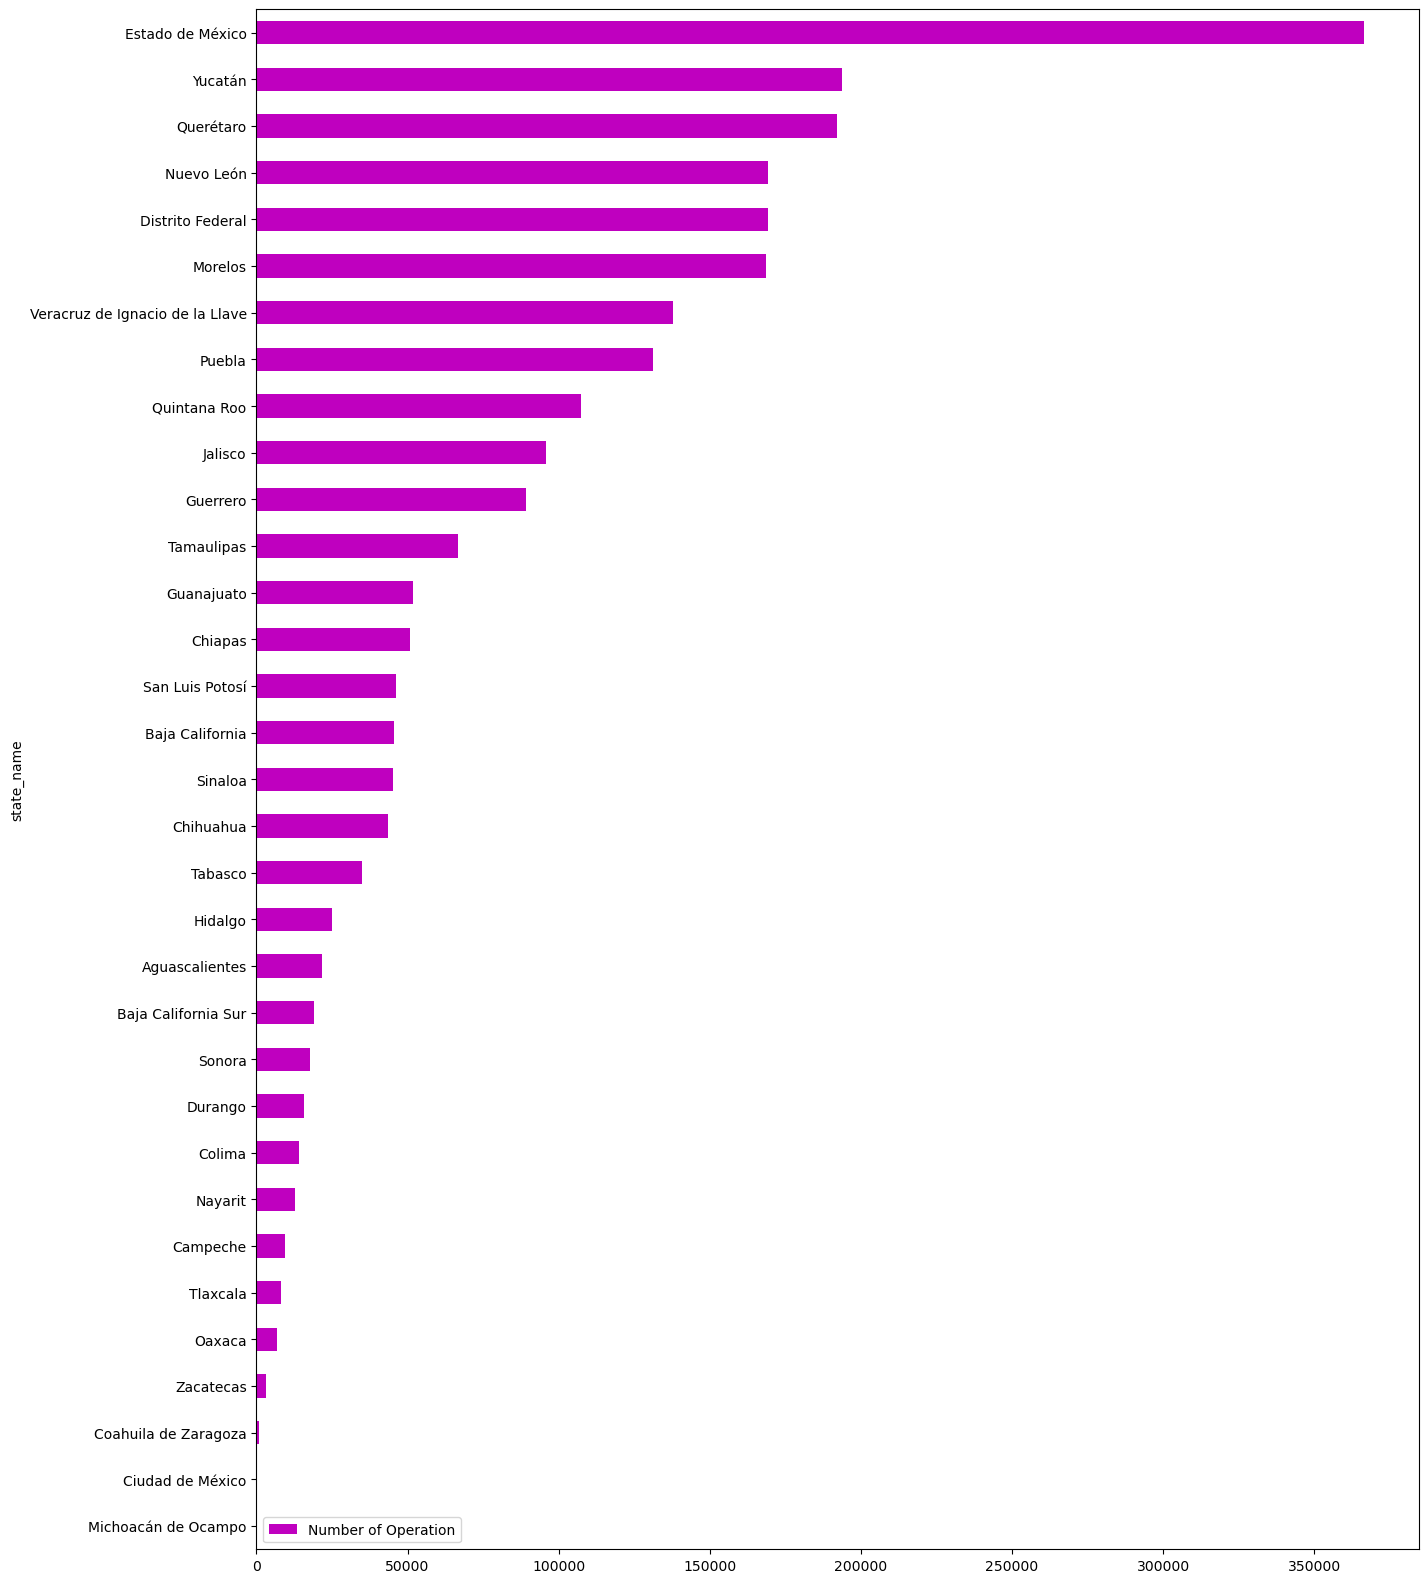

In [65]:
df=pd.DataFrame(data.groupby("state_name").size(),columns=['Number of Operation'])

df1=df.sort_values(by=['Number of Operation'],ascending=True)

#df1.plot.barh(color ={'Number of Operation':'red'})
df1.plot.barh(color ='m',figsize=(15,20))

array([<AxesSubplot:ylabel='Number of Operation'>], dtype=object)

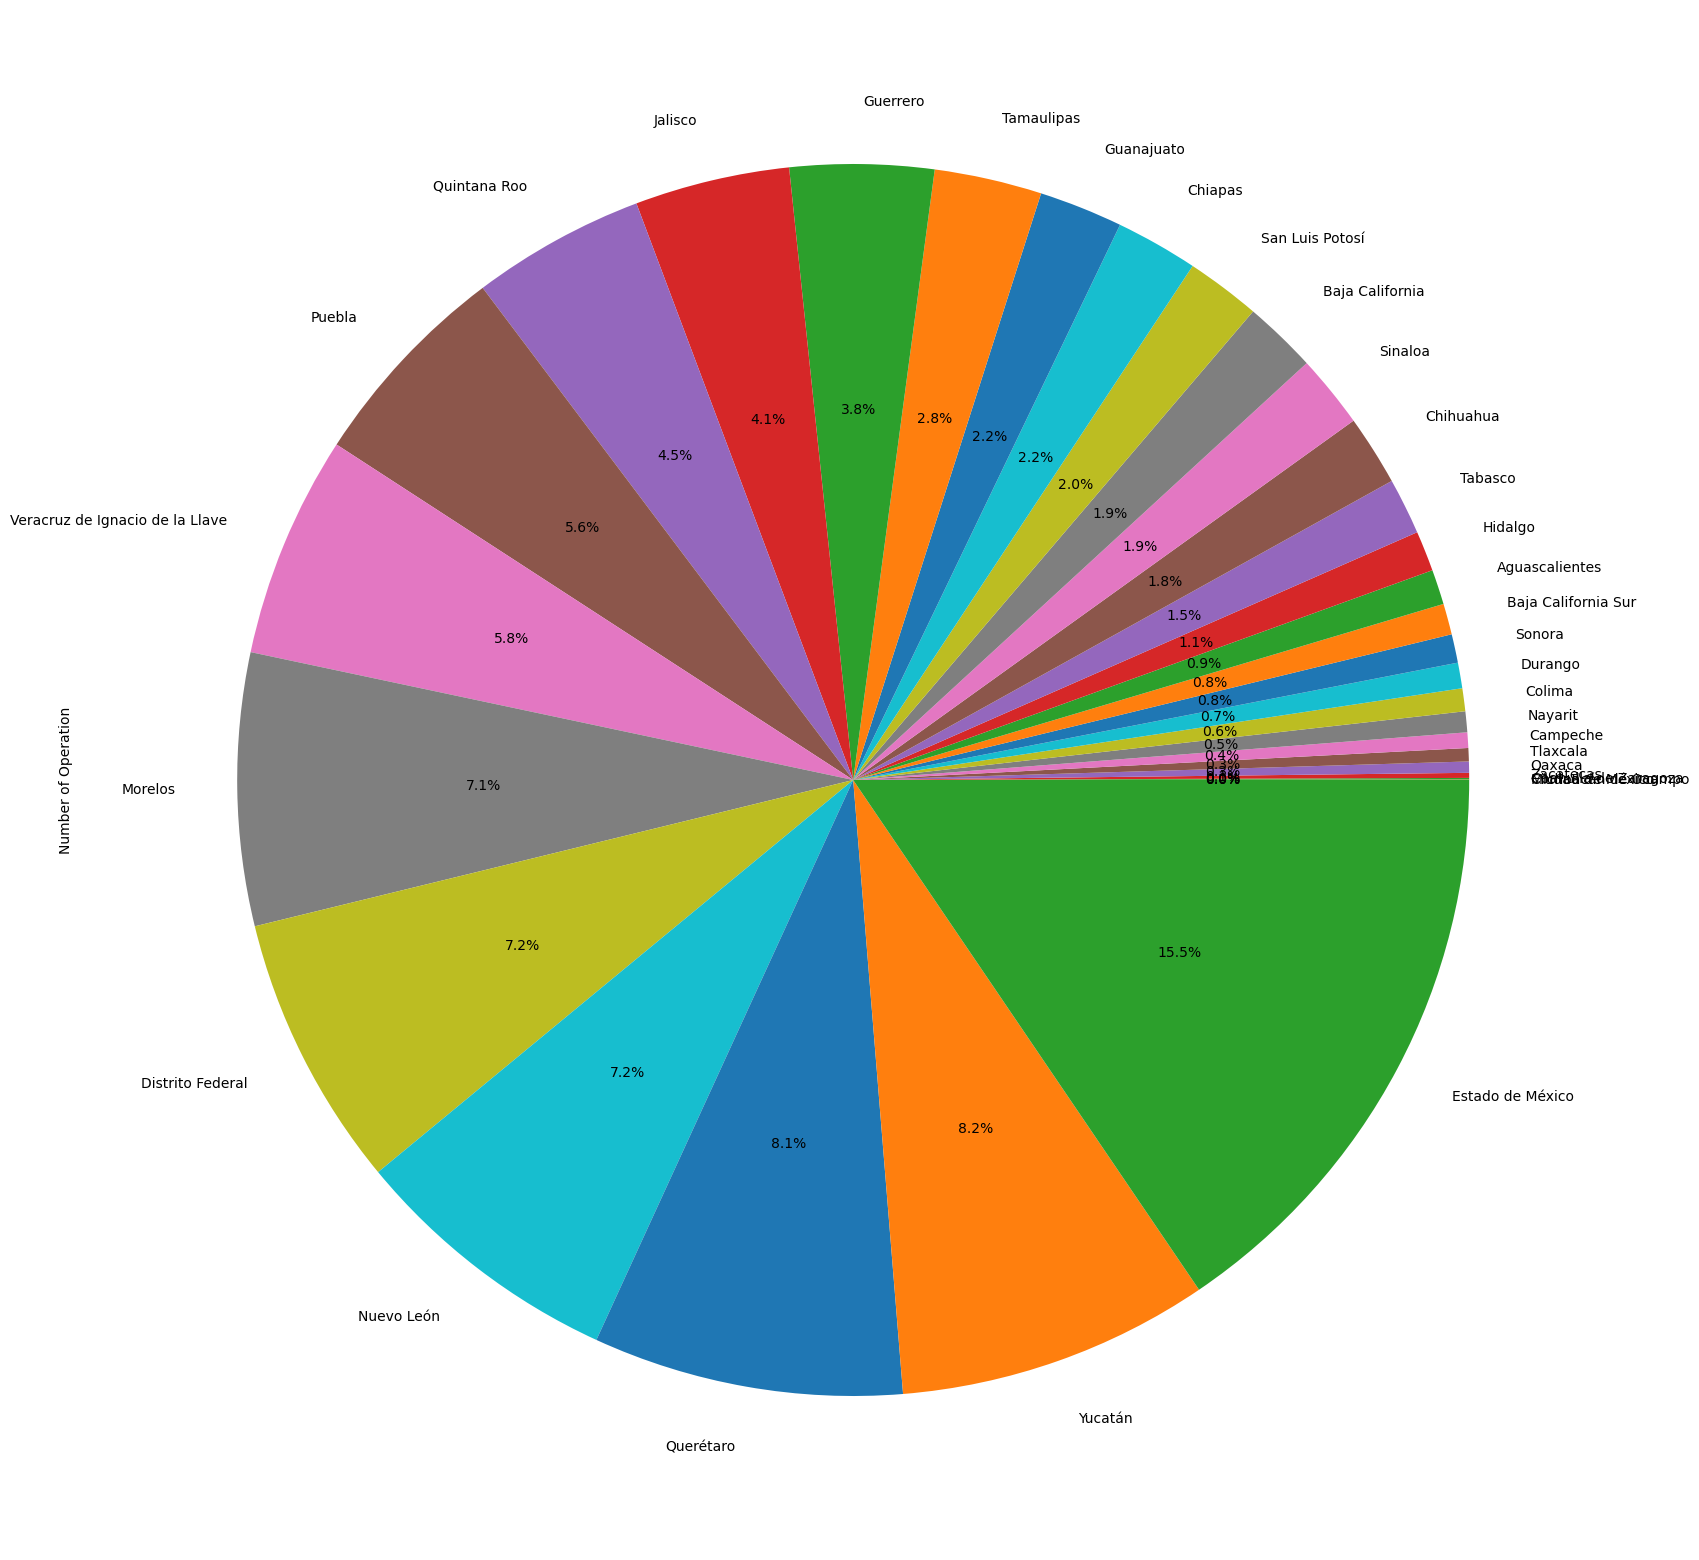

In [66]:
df1.plot.pie(subplots=True,autopct='%.1f%%',figsize=(20,20),legend=False)

### Insight

The 5 tops state where we have highest number of properties available for  sale and rent : 

Estado de México

Baja California

Querétaro

Veracruz de Ignacio de la Llave 

Morelos. 
 
13.5% of these  available properties in Mexico are in Estado de México state, so this is most active state followed by Baja California  with 10.3% of the total operations.Investors  and indviduals who are interested in wide range  properties options  should focus on these 5 states becuase they reponsible for about 46% of the total properties available for  sale and  rent in Mexico

Conversley, the 5 states where we have least number of properties avaliable for sale and rent are:

Michoacán de Ocampo	

Ciudad de México

Coahuila de Zaragoza

Zacatecas

Oaxaca

Individual or investors who are interested in these 5 states will narrowest range of options of properties to buy or rent 

##### Number of Operations per Property Type

In [67]:
data['property_type'].value_counts()

house        1660705
apartment     557497
store         142753
PH               461
Name: property_type, dtype: int64

<AxesSubplot:ylabel='property_type'>

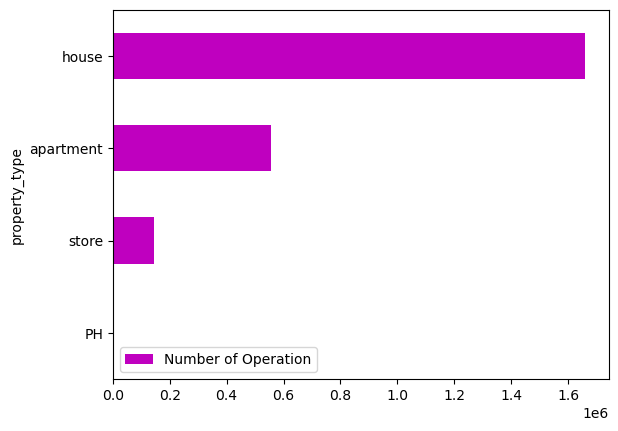

In [68]:
df=pd.DataFrame(data.groupby("property_type").size(),columns=['Number of Operation'])

df1=df.sort_values(by=['Number of Operation'],ascending=True)

#df1.plot.barh(color ={'Number of Operation':'red'})
df1.plot.barh(color ='m')

array([<AxesSubplot:ylabel='Number of Operation'>], dtype=object)

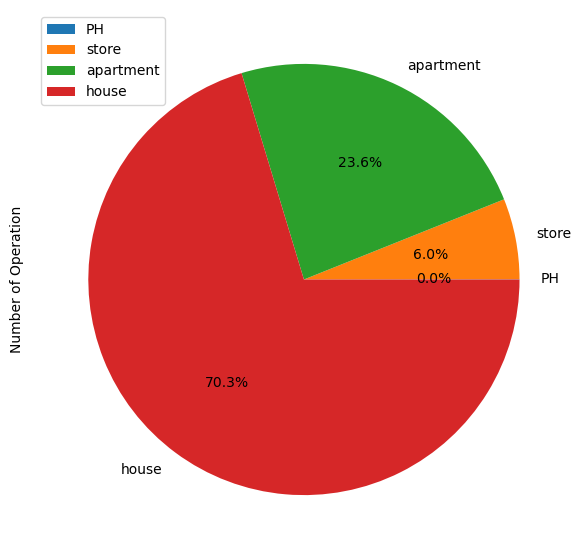

In [69]:
df1.plot.pie(subplots=True,autopct='%.1f%%',figsize=(7,7))

### Insight
Across Mexico, investors or individuals looking to invest in or rent house will not have problem because house is reponsible for about 70% of the total properties available for sale or rent in Mexico.

Next to houses is  apartment, it is reponsible for about 24% of the total properties 


There are fewer stores available for sales or rent. Store is 5.5% of total available properties 


We have very few PH, across Mexico ,about 473 PH available for rent or sale

##### Number of Operations per Operation type 

array([<AxesSubplot:ylabel='Number of Operation'>], dtype=object)

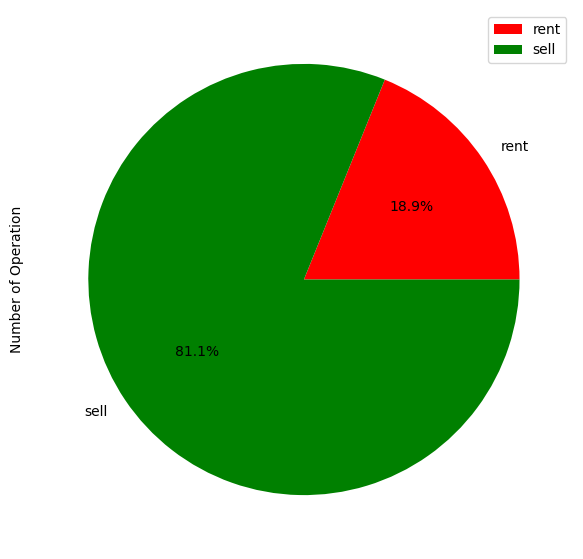

In [70]:
df=pd.DataFrame(data.groupby("operation").size(),columns=['Number of Operation'])

df1=df.sort_values(by=['Number of Operation'],ascending=True)

#df1.plot.barh(color ={'Number of Operation':'red'})
mycolour=['r','g']

df1.plot.pie(subplots=True,autopct='%.1f%%', colors=mycolour,figsize=(7,7))

###  Insight 
Majority of the properties available in Mexico are for sale. about 84% of the properties are for sale while 16% are for rent. So, the Mexican Real Estate market is suitable for investors who want to buy properties 


#### Number of Operations per Operation type per state

In [71]:
table_sm=pd.crosstab(data.state_name,data.operation)

In [72]:
table=table_sm.sort_values(by=['sell'],ascending=False)
table

operation                         rent    sell
state_name                                    
Estado de México                 50548  315748
Yucatán                          34700  158886
Querétaro                        39562  152507
Morelos                          21901  146834
Distrito Federal                 25489  143727
Nuevo León                       39808  129600
Puebla                           31456   99901
Veracruz de Ignacio de la Llave  39380   98473
Quintana Roo                     18616   88767
Jalisco                          16015   79949
Guerrero                         16519   72592
Tamaulipas                       16639   49959
Chiapas                           9510   41453
Sinaloa                           4904   40391
Guanajuato                       12101   39767
Baja California                   6100   39356
San Luis Potosí                  10198   35981
Chihuahua                        10942   32619
Hidalgo                           2538   22446
Tabasco                          14799   20150
Aguascalientes                    3639   18004
Baja California Sur               1932   17243
Sonora                            3341   14370
Durango                           2558   13281
Colima                            1532   12633
Nayarit                           1892   11008
Tlaxcala                          1104    7128
Oaxaca                            1268    5678
Campeche                          5638    3957
Zacatecas                          857    2239
Coahuila de Zaragoza               199     781
Ciudad de México                    90     160
Michoacán de Ocampo                 18      35

<AxesSubplot:ylabel='state_name'>

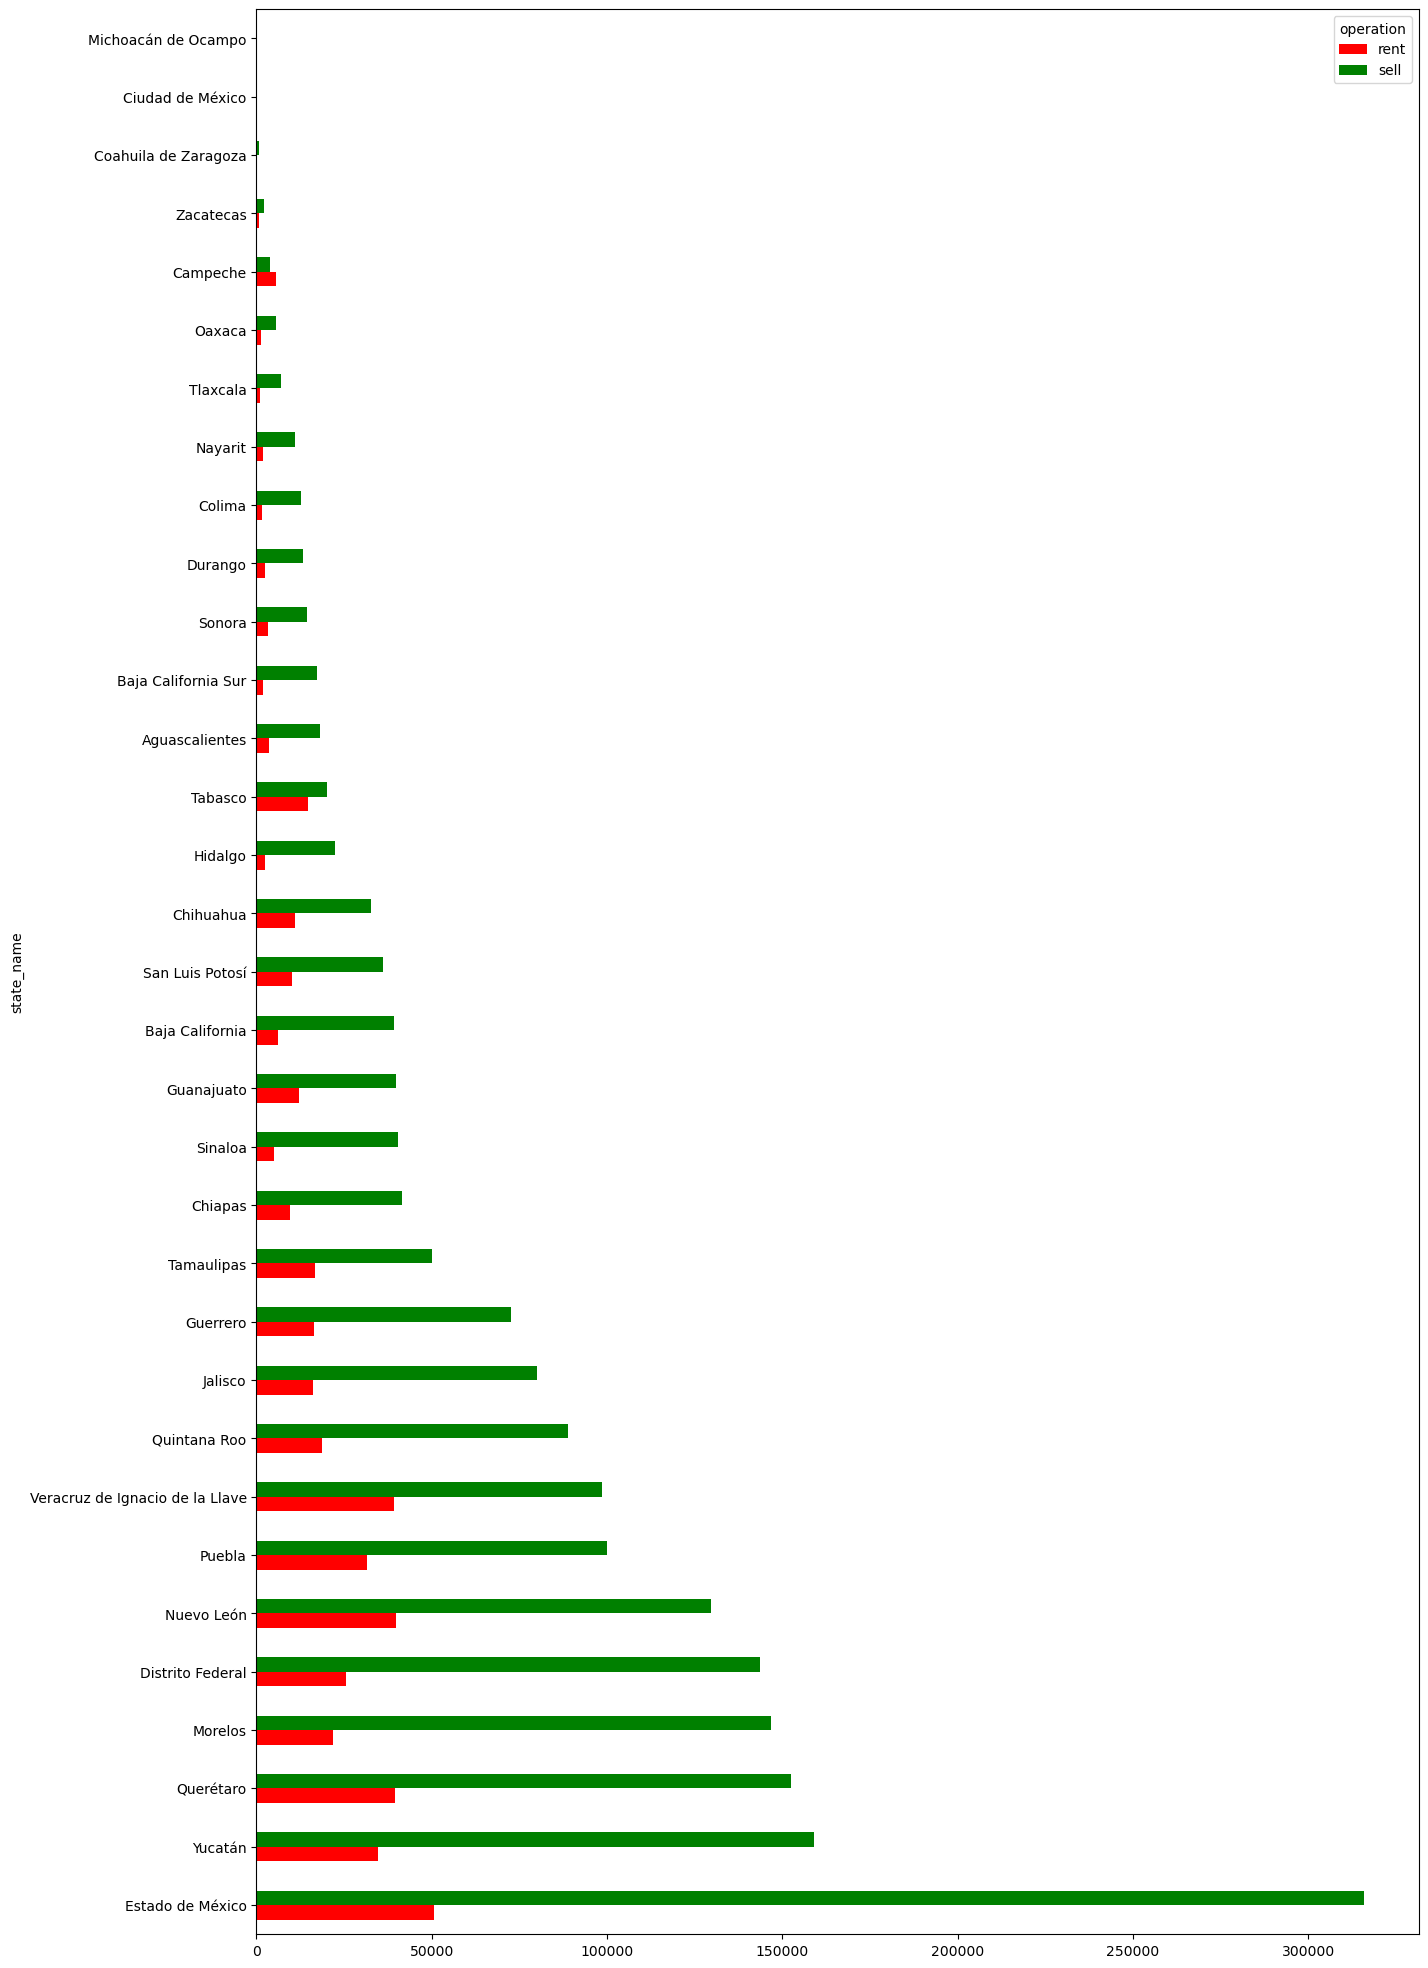

In [73]:
table.plot.barh(color=mycolour,figsize=(15,25))

### Insight 

Acros the 33 states, except Campeche state , the total number of properties available for sale is more than the number of properties available for rent.

In Campeche state , the number of properties available for rent is higher than number of properties available for sale by about 7%

In [74]:
table

operation                         rent    sell
state_name                                    
Estado de México                 50548  315748
Yucatán                          34700  158886
Querétaro                        39562  152507
Morelos                          21901  146834
Distrito Federal                 25489  143727
Nuevo León                       39808  129600
Puebla                           31456   99901
Veracruz de Ignacio de la Llave  39380   98473
Quintana Roo                     18616   88767
Jalisco                          16015   79949
Guerrero                         16519   72592
Tamaulipas                       16639   49959
Chiapas                           9510   41453
Sinaloa                           4904   40391
Guanajuato                       12101   39767
Baja California                   6100   39356
San Luis Potosí                  10198   35981
Chihuahua                        10942   32619
Hidalgo                           2538   22446
Tabasco                          14799   20150
Aguascalientes                    3639   18004
Baja California Sur               1932   17243
Sonora                            3341   14370
Durango                           2558   13281
Colima                            1532   12633
Nayarit                           1892   11008
Tlaxcala                          1104    7128
Oaxaca                            1268    5678
Campeche                          5638    3957
Zacatecas                          857    2239
Coahuila de Zaragoza               199     781
Ciudad de México                    90     160
Michoacán de Ocampo                 18      35

#### Number of Operations per Property type in each state

In [75]:
table_sm=pd.crosstab(data.state_name,data.property_type)
table=table_sm.sort_values(by=['house'],ascending=False)
table

property_type                     PH  apartment   house  store
state_name                                                    
Estado de México                  20      70398  279978  15900
Yucatán                            0      26525  158936   8125
Querétaro                         16      24627  156411  11015
Morelos                            0      18895  146445   3395
Nuevo León                         0      34892  115309  19207
Veracruz de Ignacio de la Llave    0      27296   98012  12545
Puebla                             0      33697   90924   6736
Jalisco                           42      21979   66436   7507
Distrito Federal                 370     115726   47932   5188
Tamaulipas                         0      12776   47080   6742
Guanajuato                         0       3527   45512   2829
Quintana Roo                       0      59346   42875   5162
Chiapas                            0       4616   42718   3629
Guerrero                           0      49849   36591   2671
Baja California                    0       6507   35476   3473
Sinaloa                            5       8326   33924   3040
San Luis Potosí                    0      11303   32022   2854
Chihuahua                          0       3415   31427   8719
Tabasco                            0       7496   24382   3071
Hidalgo                            0        925   23192    867
Aguascalientes                     0       1047   18836   1760
Sonora                             0       1011   15030   1670
Baja California Sur                0       3480   14214   1481
Durango                            0       1020   13150   1669
Colima                             0       1206   12104    855
Nayarit                            0       3678    8801    421
Campeche                           0       1416    7400    779
Tlaxcala                           0        821    6843    568
Oaxaca                             0       1259    5209    478
Zacatecas                          0        189    2637    270
Coahuila de Zaragoza               0         53     814    113
Ciudad de México                   8        182      46     14
Michoacán de Ocampo                0         14      39      0

####  NOTE 

The investors or individual should not consider  Michoacán de Ocampo state for rent or sale of PH and stores. Store and PH are not avilable in this state 

<AxesSubplot:xlabel='state_name'>

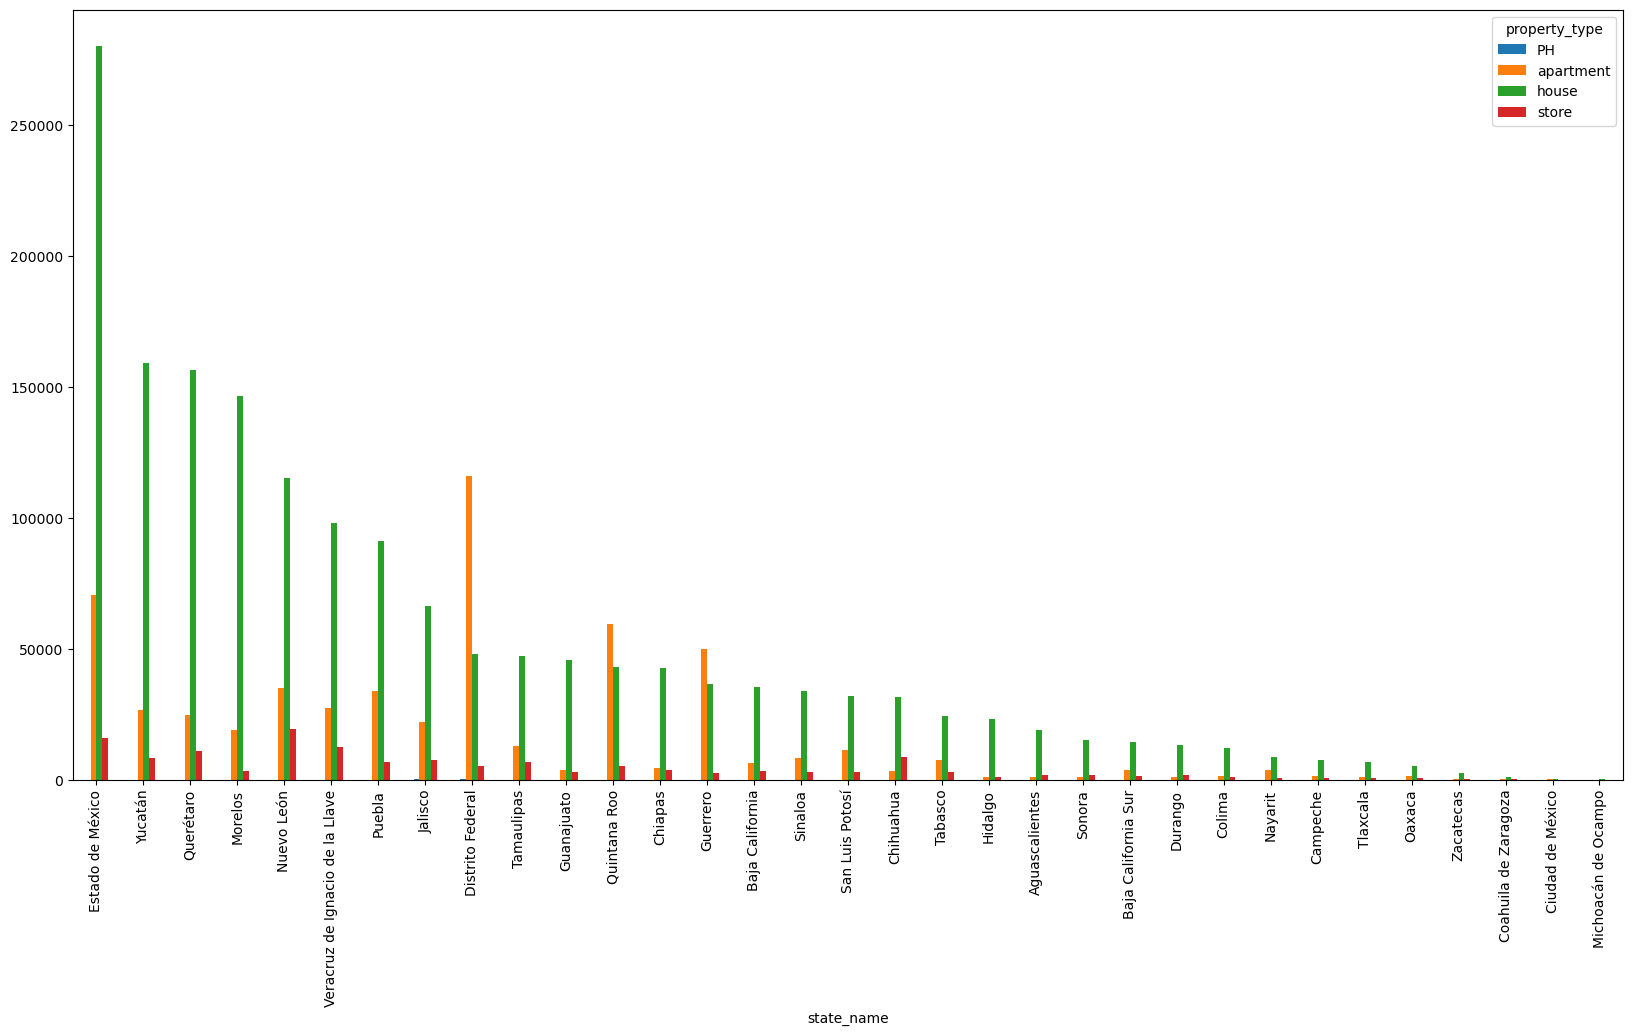

In [76]:
table.plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='state_name'>

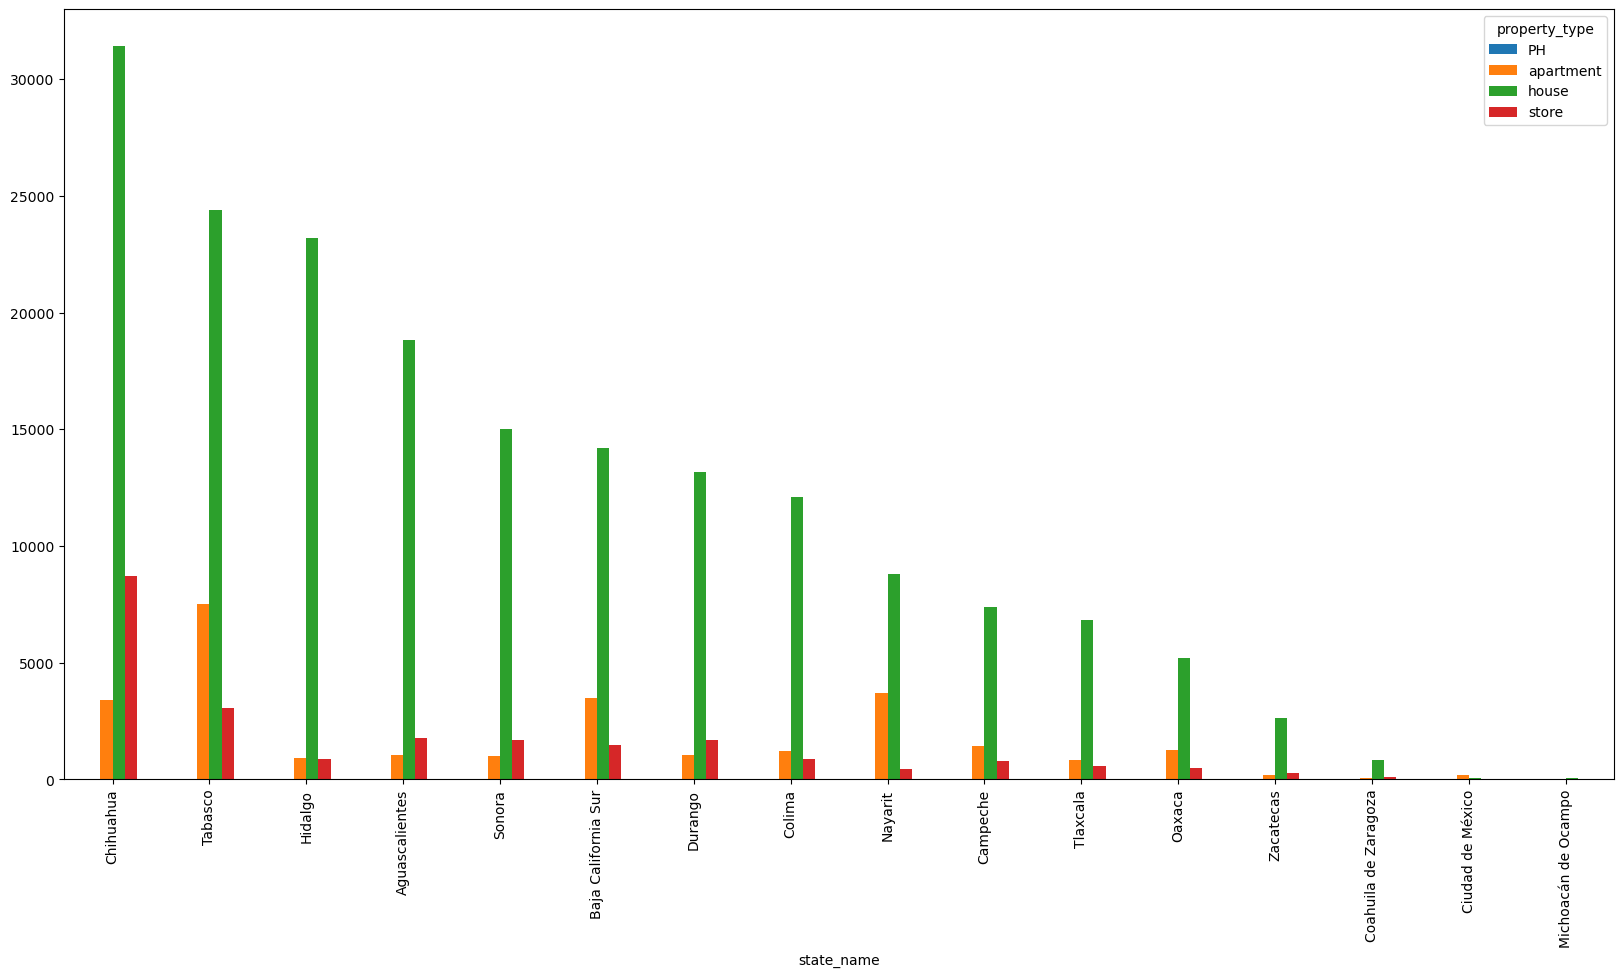

In [77]:
table.tail(16).plot.bar(figsize=(20,10))

### Insight 

Investors or individuals looking to invest or rent PH should only consider the following states:
    
   Distrito Federal
    
   Estado de México
    
   Querétaro
    
   Ciudad de México
    
   Chiapas
    
   Quintana Roo
    
   Sinaloa
    
Infact, they should focus on Distrito Federal because it has 78% of the total PH available in Mexico.

## Business Analysis  on Type of Property

Here we look at the Buinsess from the perspective of property type. We have four types of property: Store, House , Apartment and PH

array([<AxesSubplot:ylabel='Number of Operation'>], dtype=object)

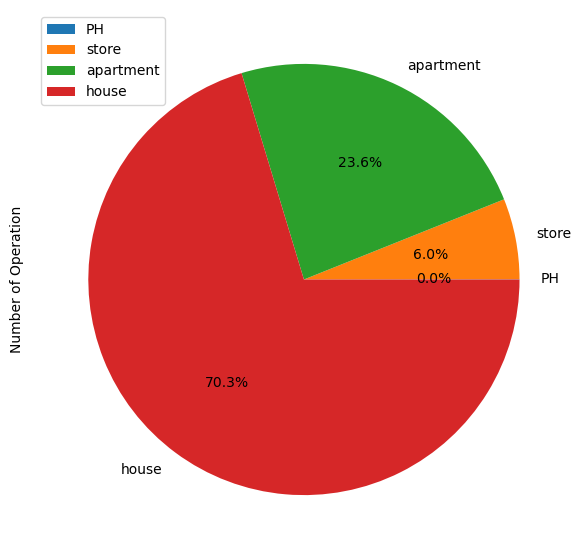

In [78]:
df=pd.DataFrame(data.groupby("property_type").size(),columns=['Number of Operation'])

df1=df.sort_values(by=['Number of Operation'],ascending=True)

#df1.plot.barh(color ={'Number of Operation':'red'})
df1.plot.pie(subplots=True,autopct='%.1f%%',figsize=(7,7))

### Stores Availability

 

lets look at the number of stores available for sales or rent in Mexico 

In [79]:
data1=data[(data.property_type=='store')]
df=pd.DataFrame(data.groupby("operation").size(),columns=['Number of Operation'])
df=pd.crosstab(data1.state_name,data1.operation)
df1=df.sort_values(by=['rent'],ascending=False)
df[(df.rent) < (df.sell)].count()

operation
rent    0
sell    0
dtype: int64

In [80]:
df1

operation                         rent  sell
state_name                                  
Estado de México                 12120  3780
Nuevo León                       12113  7094
Veracruz de Ignacio de la Llave  10383  2162
Querétaro                         7439  3576
Yucatán                           5959  2166
Chihuahua                         5249  3470
Jalisco                           5166  2341
Tamaulipas                        4829  1913
Puebla                            4598  2138
Distrito Federal                  3647  1541
Quintana Roo                      3279  1883
Chiapas                           2931   698
Tabasco                           2559   512
Baja California                   2214  1259
Morelos                           2116  1279
San Luis Potosí                   2051   803
Guanajuato                        1981   848
Guerrero                          1790   881
Sinaloa                           1550  1490
Durango                           1161   508
Aguascalientes                    1154   606
Sonora                            1047   623
Baja California Sur                942   539
Campeche                           564   215
Hidalgo                            546   321
Colima                             493   362
Tlaxcala                           456   112
Nayarit                            311   110
Oaxaca                             300   178
Zacatecas                          195    75
Coahuila de Zaragoza                90    23
Ciudad de México                     7     7

<AxesSubplot:xlabel='state_name'>

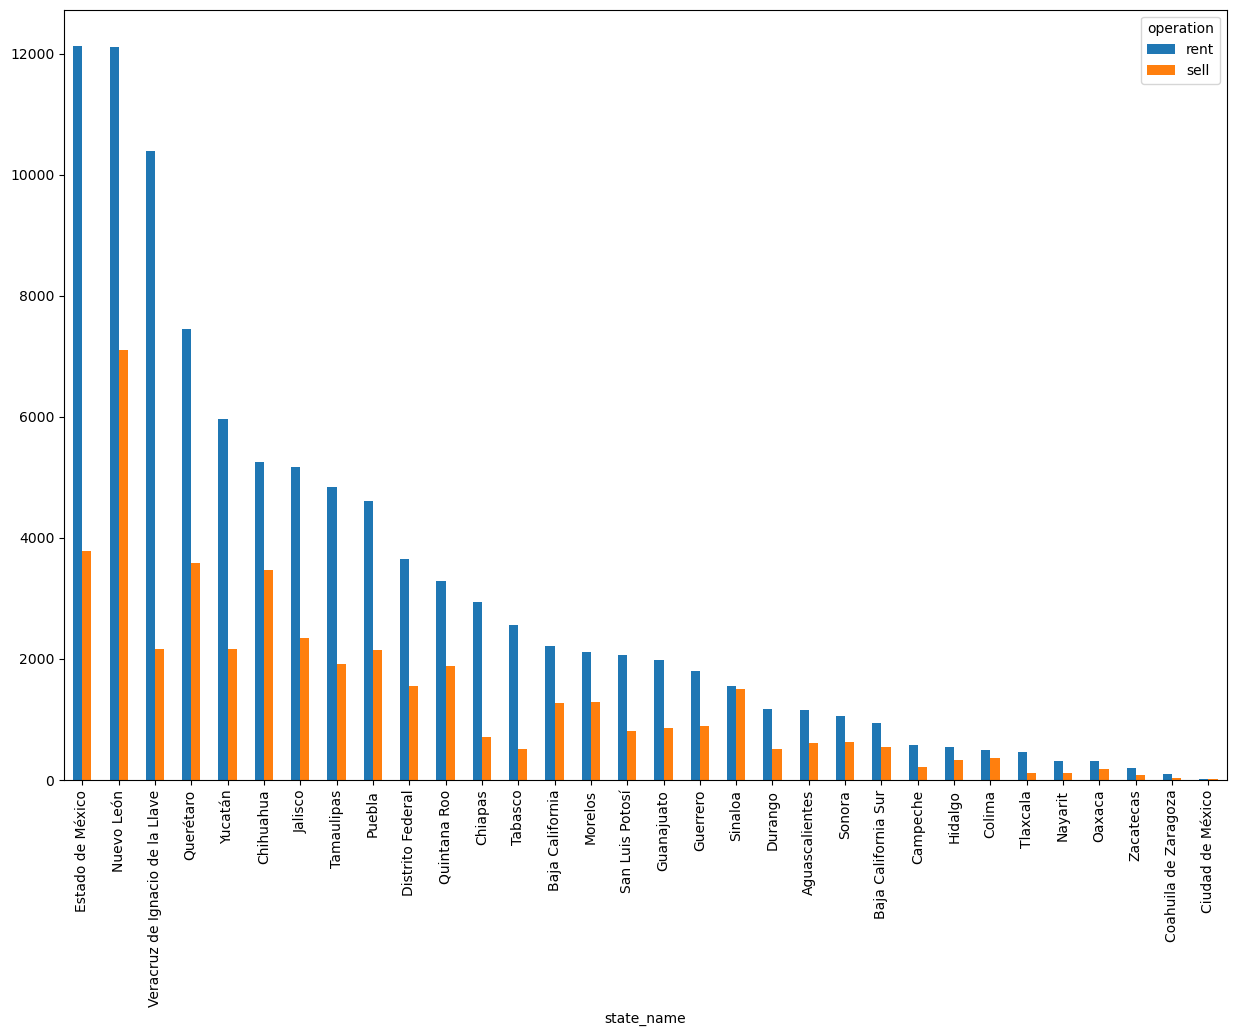

In [81]:
df1.plot.bar(figsize=(15,10))

array([<AxesSubplot:ylabel='rent'>, <AxesSubplot:ylabel='sell'>],
      dtype=object)

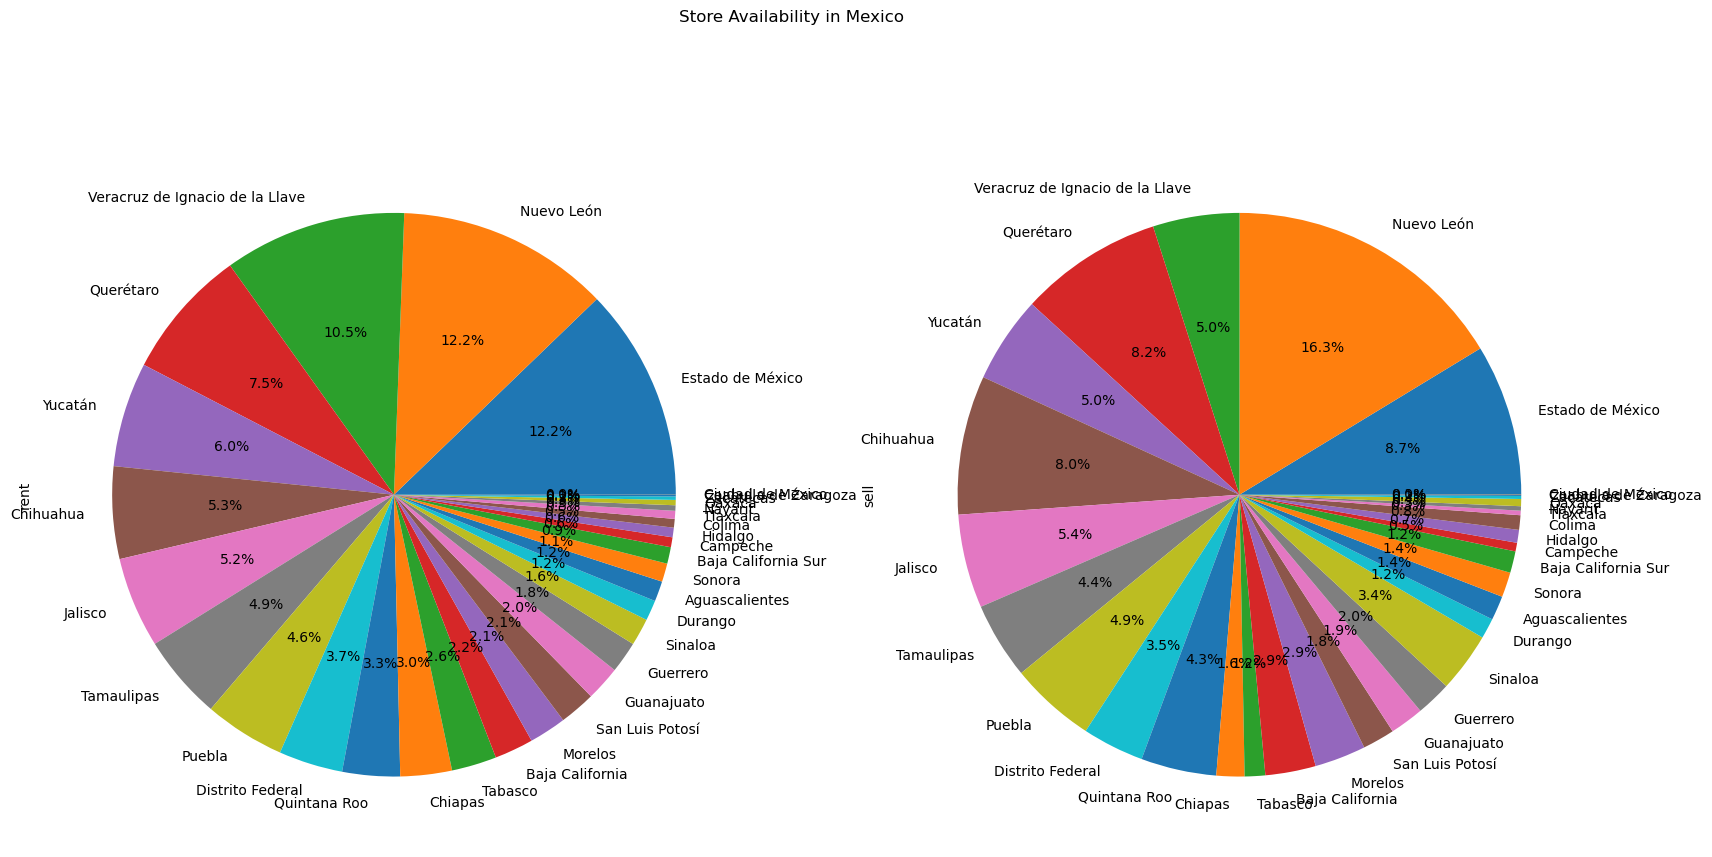

In [82]:
df1.plot.pie(subplots=True,title="Store Availability in Mexico",autopct='%.1f%%',figsize=(20,10),legend=False)

### Insight 

We have highest number of stores available for sales or rent in the following states :
    
Veracruz de Igancio la Liave

Nuevo Leon

Estado De Mexico

Queretaro

Baja California

Across all the states, we have more number of stores available for rent than the number of stores available for sale. Only in Oaxaca  we more number of stores available for sale and there is no store available in Michoacán de Ocampo state 

Investors looking to buy store  should focus on states like Veracruz de Igancio la Liave,Nuevo Leon,Estado De Mexico and Queretaro, The four states make up of about 39%  the total stores avialable for sale in Mexico. Similarly, for rent purpose, these  4 states are reponsible for about 45% of the total available store for rent in Mexico

###  Availability of Appartments 

Lets look at the number of operations of apartments available for  rent and sale across the states 

In [83]:
data1=data[data.property_type=='apartment']
df=pd.DataFrame(data.groupby("operation").size(),columns=['Number of Operation'])
df=pd.crosstab(data1.state_name,data1.operation)
df1=df.sort_values(by=['rent'],ascending=False)
df[(df.rent) > (df.sell)].count()

operation
rent    5
sell    5
dtype: int64

In [84]:
df1

operation                         rent   sell
state_name                                   
Distrito Federal                 17780  97946
Estado de México                 13907  56491
Nuevo León                       13123  21769
Veracruz de Ignacio de la Llave  13048  14248
Puebla                           11712  21985
Querétaro                        10707  13920
Yucatán                          10485  16040
Quintana Roo                      9958  49388
Guerrero                          8692  41157
Jalisco                           4937  17042
Morelos                           4791  14104
Tabasco                           4759   2737
Tamaulipas                        4737   8039
San Luis Potosí                   3560   7743
Chihuahua                         2464    951
Chiapas                           2122   2494
Baja California                   1645   4862
Guanajuato                        1497   2030
Campeche                          1178    238
Sinaloa                           1168   7158
Nayarit                            551   3127
Durango                            481    539
Sonora                             416    595
Oaxaca                             395    864
Aguascalientes                     392    655
Baja California Sur                314   3166
Hidalgo                            283    642
Colima                             161   1045
Zacatecas                           98     91
Tlaxcala                            94    727
Ciudad de México                    76    106
Coahuila de Zaragoza                36     17
Michoacán de Ocampo                  0     14

<AxesSubplot:xlabel='state_name'>

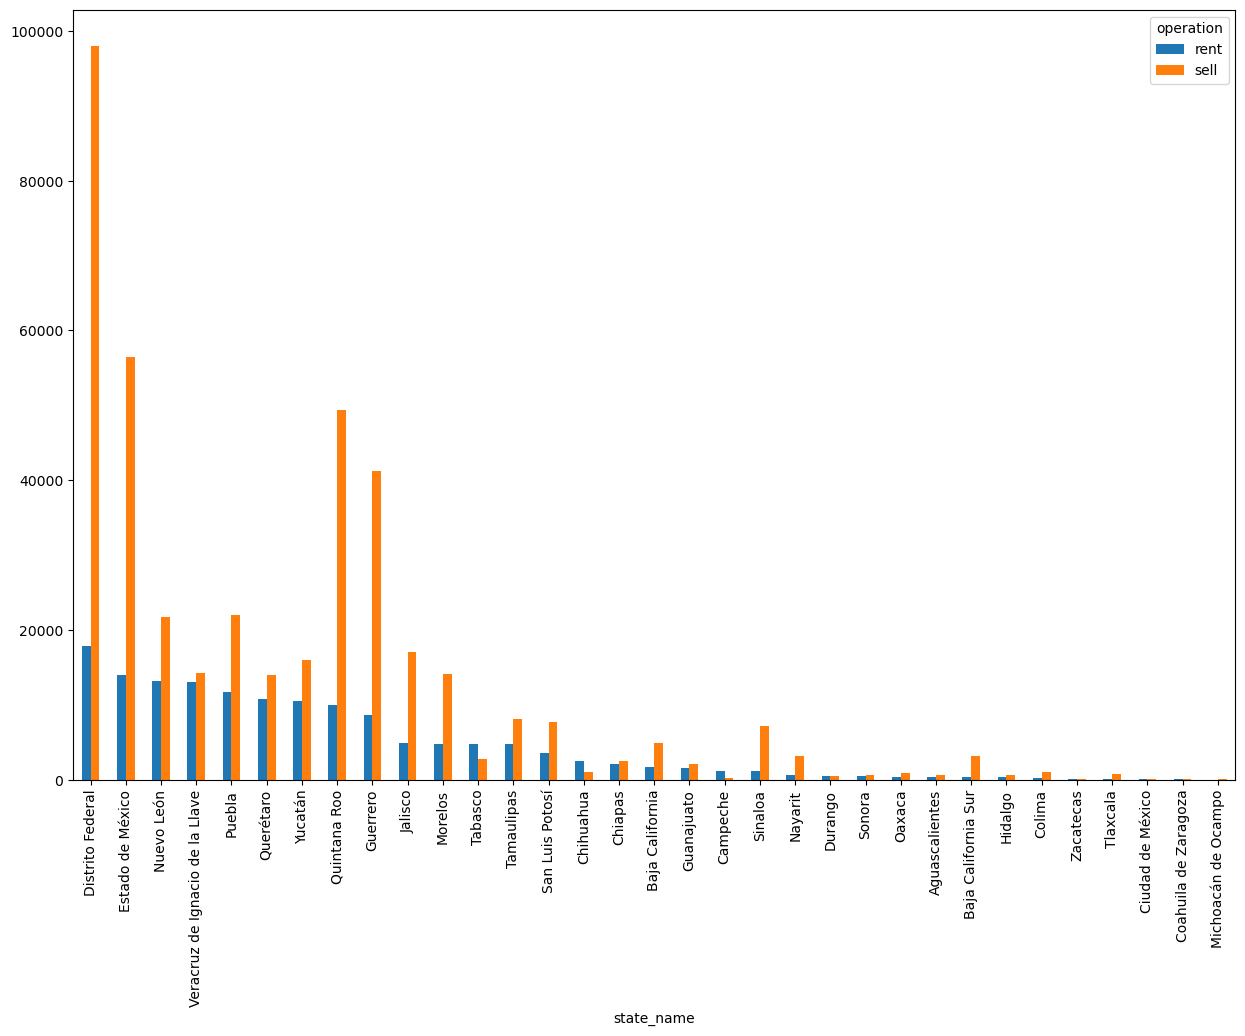

In [85]:
df1.plot.bar(figsize=(15,10))

array([<AxesSubplot:ylabel='rent'>, <AxesSubplot:ylabel='sell'>],
      dtype=object)

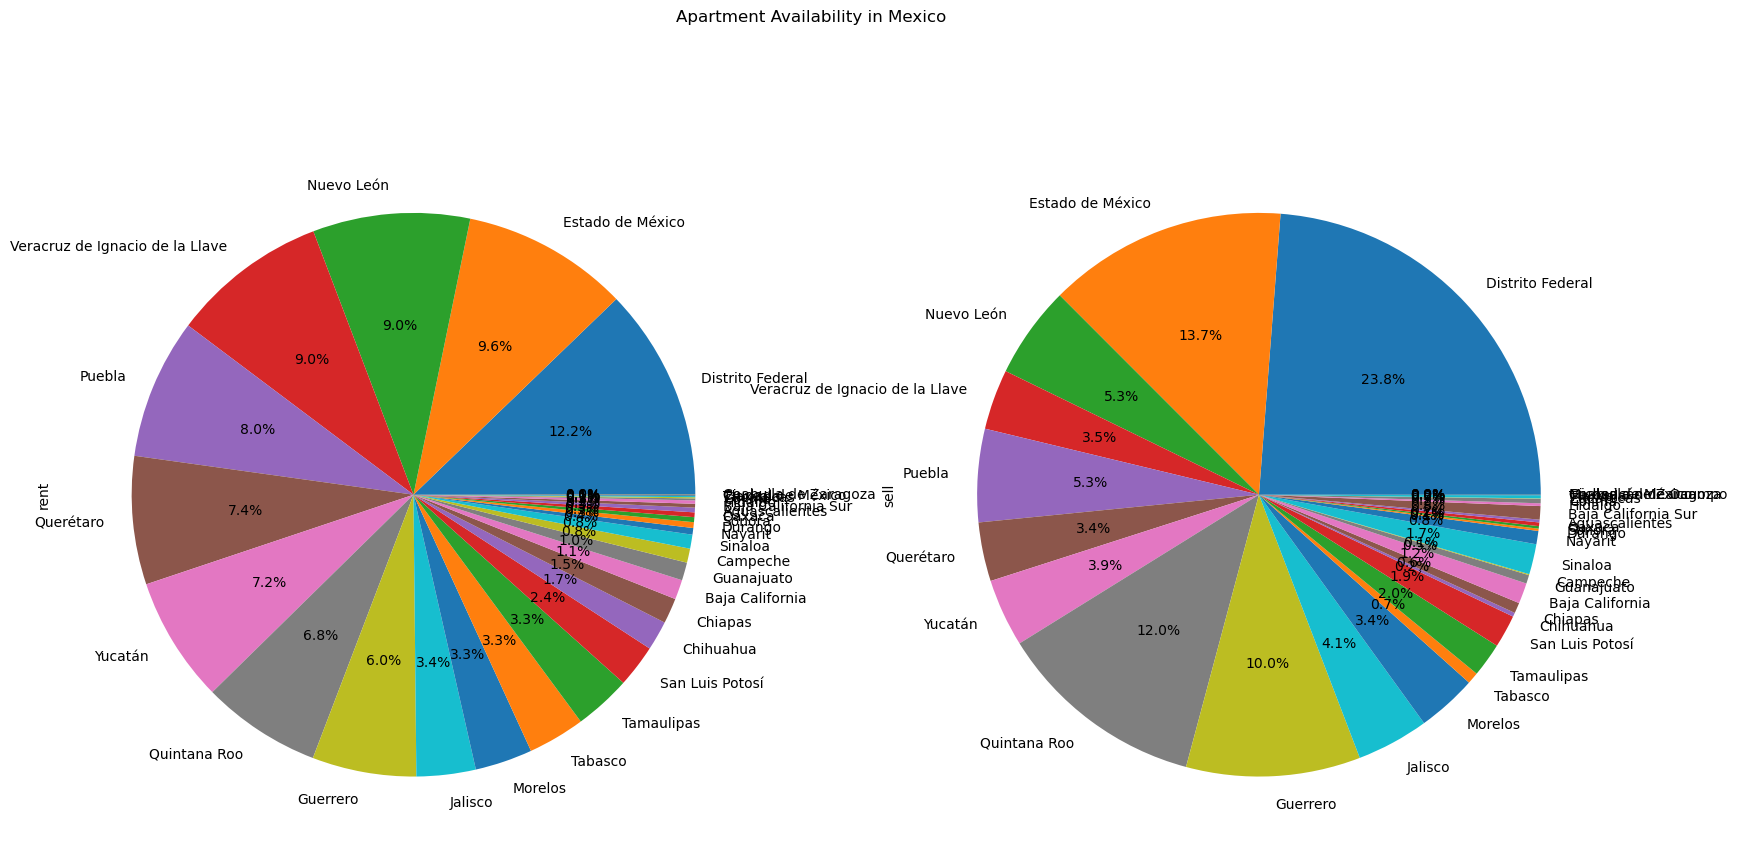

In [86]:
df1.plot.pie(subplots=True,title="Apartment Availability in Mexico",autopct='%.1f%%',figsize=(20,10),legend=False)

### Insight

We have highest number of aprtments  available for sales or  rent in the following states :
    
Baja Califorina

Distrito Federal

Estado De Mexico

Puebla

Veracruz Igancio de la Liave

Across all the states, we have more number of apartment available for sell  than the number of apartment available for rent. Only in Tabasco,Chihuahua,Campeche and Coahuila de Zaragoza, we more number of apartment available for rent. 

Investors looking to buy apartment should focus on  Baja Califorina, it has more than one-quater of the total apartments avialable for sale in Mexico. Three top states for sales of apartment are Baja Califorina,Distrito Federal and Estado De Mexico. They are reponsible for about 53% of the total apartment avilable for sales in Mexico.Similarly for rent, these  3 states are reponsible for about 36% of the totlal available apartments for rent in Mexico

### House  Availability

In [87]:
data1=data[data.property_type=='house']
df=pd.DataFrame(data.groupby("operation").size(),columns=['Number of Operation'])
df=pd.crosstab(data1.state_name,data1.operation)
df1=df.sort_values(by=['rent'],ascending=False)
df[(df.rent) > (df.sell)].count()

operation
rent    1
sell    1
dtype: int64

In [88]:
df1

operation                         rent    sell
state_name                                    
Estado de México                 24514  255464
Querétaro                        21416  134995
Yucatán                          18256  140680
Veracruz de Ignacio de la Llave  15949   82063
Puebla                           15146   75778
Morelos                          14994  131451
Nuevo León                       14572  100737
Guanajuato                        8623   36889
Tabasco                           7481   16901
Tamaulipas                        7073   40007
Guerrero                          6037   30554
Jalisco                           5898   60538
Quintana Roo                      5379   37496
San Luis Potosí                   4587   27435
Chiapas                           4457   38261
Distrito Federal                  4049   43883
Campeche                          3896    3504
Chihuahua                         3229   28198
Baja California                   2241   33235
Sinaloa                           2186   31738
Aguascalientes                    2093   16743
Sonora                            1878   13152
Hidalgo                           1709   21483
Nayarit                           1030    7771
Durango                            916   12234
Colima                             878   11226
Baja California Sur                676   13538
Oaxaca                             573    4636
Zacatecas                          564    2073
Tlaxcala                           554    6289
Coahuila de Zaragoza                73     741
Michoacán de Ocampo                 18      21
Ciudad de México                     7      39

<AxesSubplot:xlabel='state_name'>

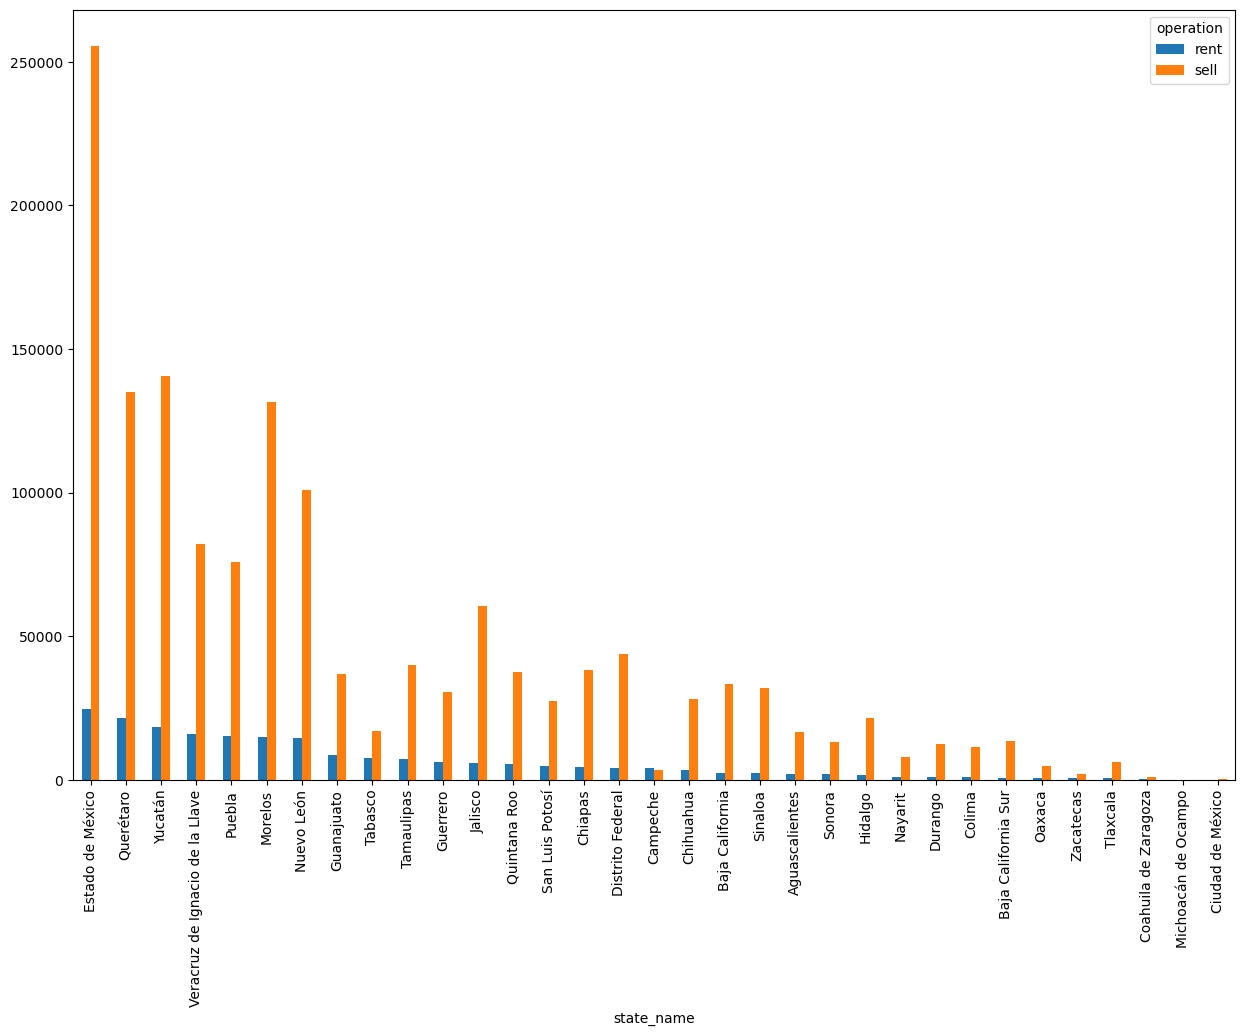

In [89]:
df1.plot.bar(figsize=(15,10))

array([<AxesSubplot:ylabel='rent'>, <AxesSubplot:ylabel='sell'>],
      dtype=object)

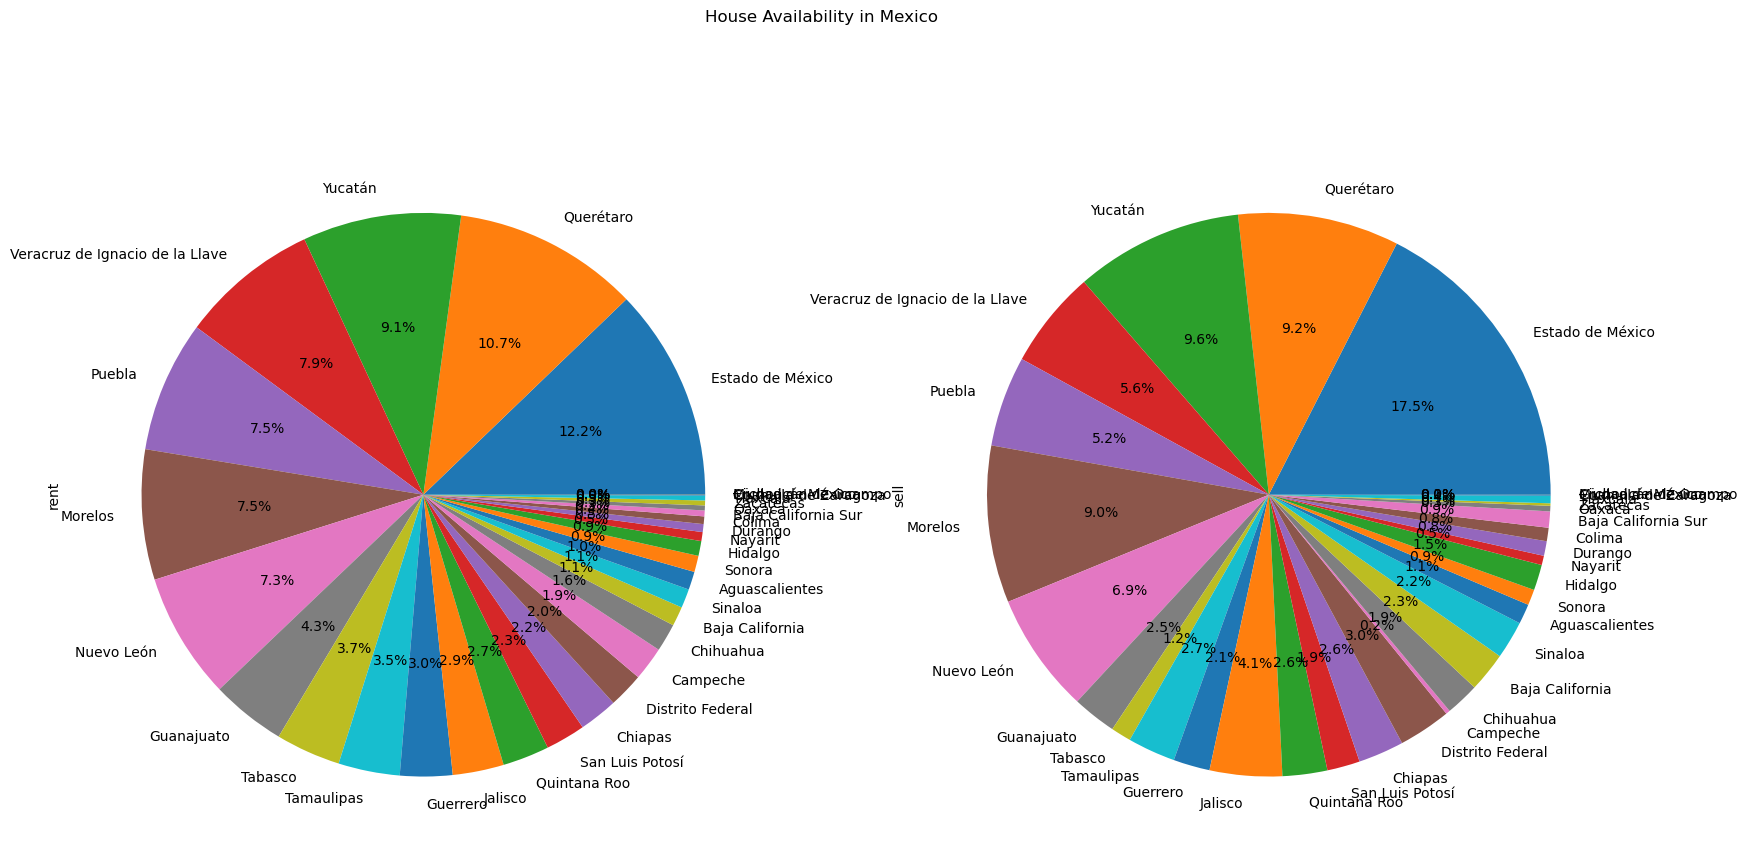

In [90]:
df1.plot.pie(subplots=True,autopct='%.1f%%',figsize=(20,10),legend=False,title="House Availability in Mexico")

### Insight:

We have highest number of houses  available for sales or  rent in the following states :
    
Estado de México

Querétaro

Veracruz de Ignacio de la Llave

Puebla

Morelos

Across all the states, we have more number of house available for sell  than the number of house available for rent. 

Investors looking to buy house  should focus on  these states: Estado de México,Querétaro, Veracruz de Ignacio de la Llave,Puebla and Puebla. They account for 47% of the total house available for sale in Mexico.Similarly for rent, these  5  states are accountable for about 50% of the totlal available store for rent in Mexico

In [91]:
data1=data[data.property_type=='PH']
df=pd.DataFrame(data.groupby("operation").size(),columns=['Number of Operation'])
df=pd.crosstab(data1.state_name,data1.operation)
df1=df.sort_values(by=['sell'],ascending=False)
df[(df.rent) < (df.sell)].count()

operation
rent    6
sell    6
dtype: int64

In [92]:
df1

operation         rent  sell
state_name                  
Distrito Federal    13   357
Jalisco             14    28
Querétaro            0    16
Estado de México     7    13
Ciudad de México     0     8
Sinaloa              0     5

<AxesSubplot:xlabel='state_name'>

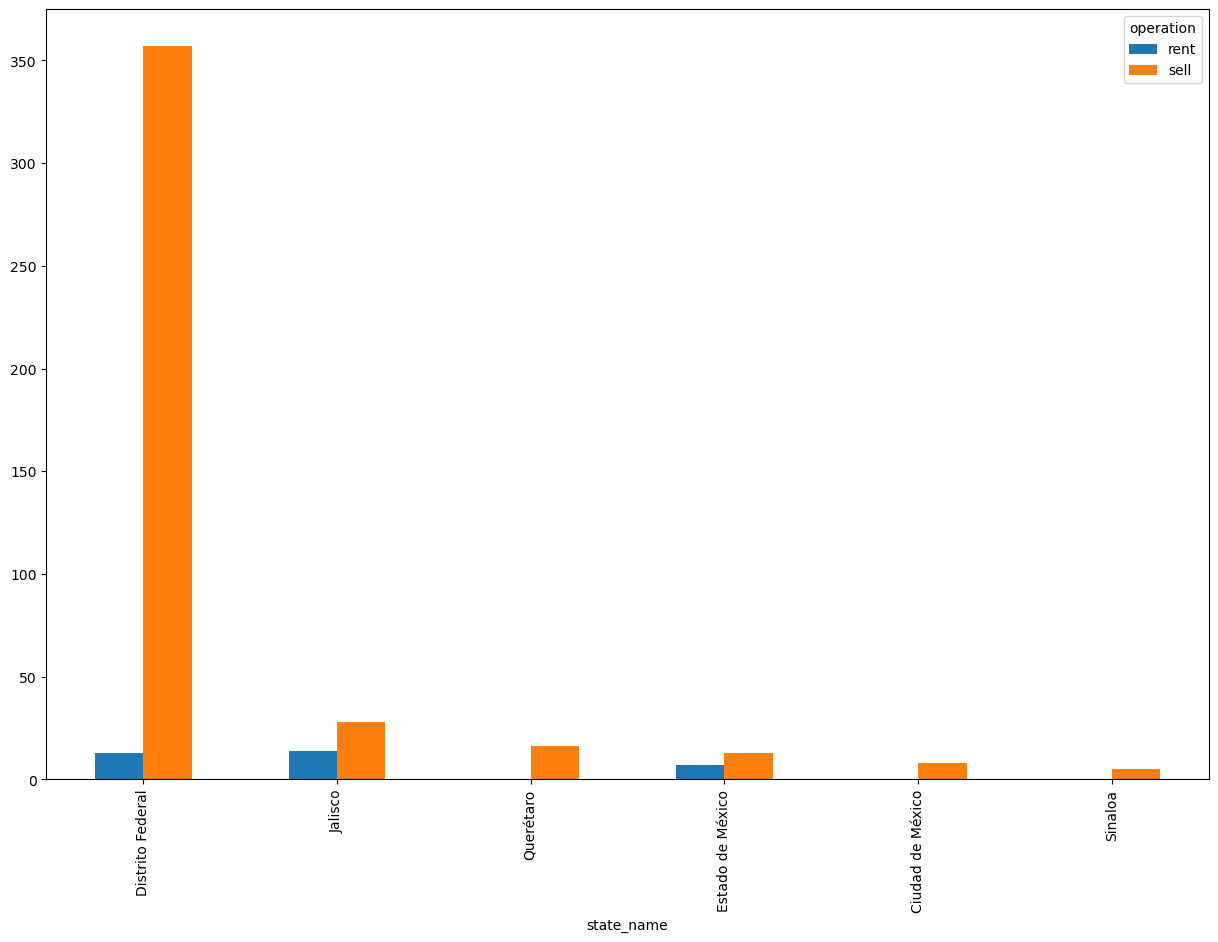

In [93]:
df1.plot.bar(figsize=(15,10))

array([<AxesSubplot:ylabel='rent'>, <AxesSubplot:ylabel='sell'>],
      dtype=object)

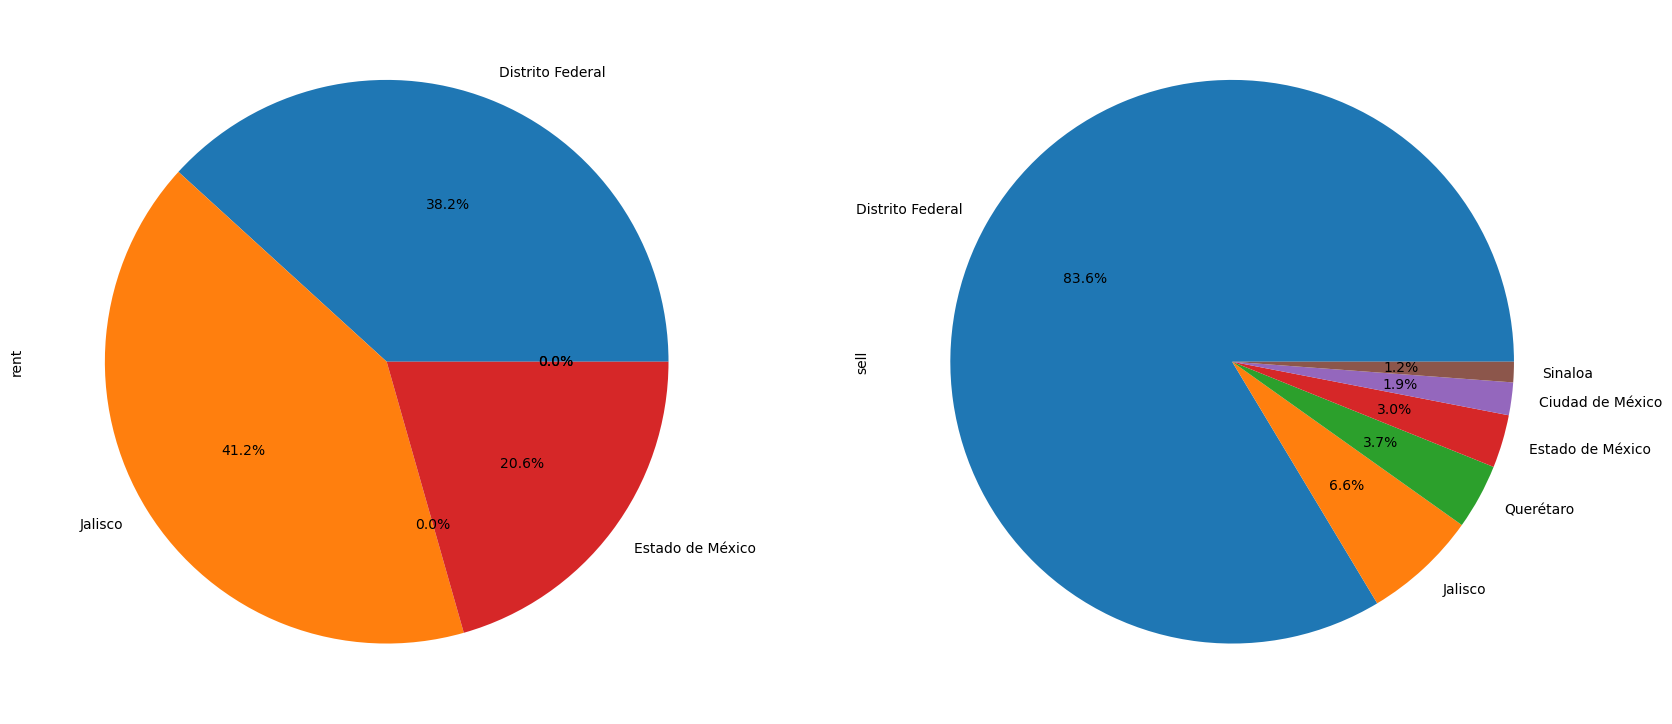

In [94]:
df1.plot.pie(subplots=True,autopct='%.1f%%',figsize=(20,20),legend=False,)

82.4% of the availabe PH  for sale in Mexico are in Distrito Federal.Individual interested in  renting PH shuld focus on Distrito Federal,Jalisco and Estado de México	

### Focus on Critical States

In [95]:
df=pd.DataFrame(data.groupby("state_name").size(),columns=['Number of Operation'])

df1=df.sort_values(by=['Number of Operation'],ascending=False)

In [96]:
df1.head(6)

Number of Operation
state_name                           
Estado de México               366296
Yucatán                        193586
Querétaro                      192069
Nuevo León                     169408
Distrito Federal               169216
Morelos                        168735

In [97]:
df1.head(6).sum()/data.operation.count()

Number of Operation    0.533286
dtype: float64

### Important areas in the critical states 

#### Important area in Estado de Mexico State 

In [98]:
df=data[data.state_name=='Estado de México']


In [99]:
df=pd.DataFrame(df.groupby("place_name").size(),columns=['Number of Operation'])

df1=df.sort_values(by=['Number of Operation'],ascending=False)

df1


Number of Operation
place_name                                         
Huixquilucan                                  51882
Atizapán de Zaragoza                          41487
Naucalpan de Juárez                           34792
Metepec                                       27789
Toluca                                        18809
...                                             ...
Tequexquináhuac                                   1
Federal Burocrática                               1
Felipe Ureña                                      1
Plan Maestro San Martín Obispo                    1
14 de Diciembre                                   1

[1114 rows x 1 columns]

array([<AxesSubplot:ylabel='Number of Operation'>], dtype=object)

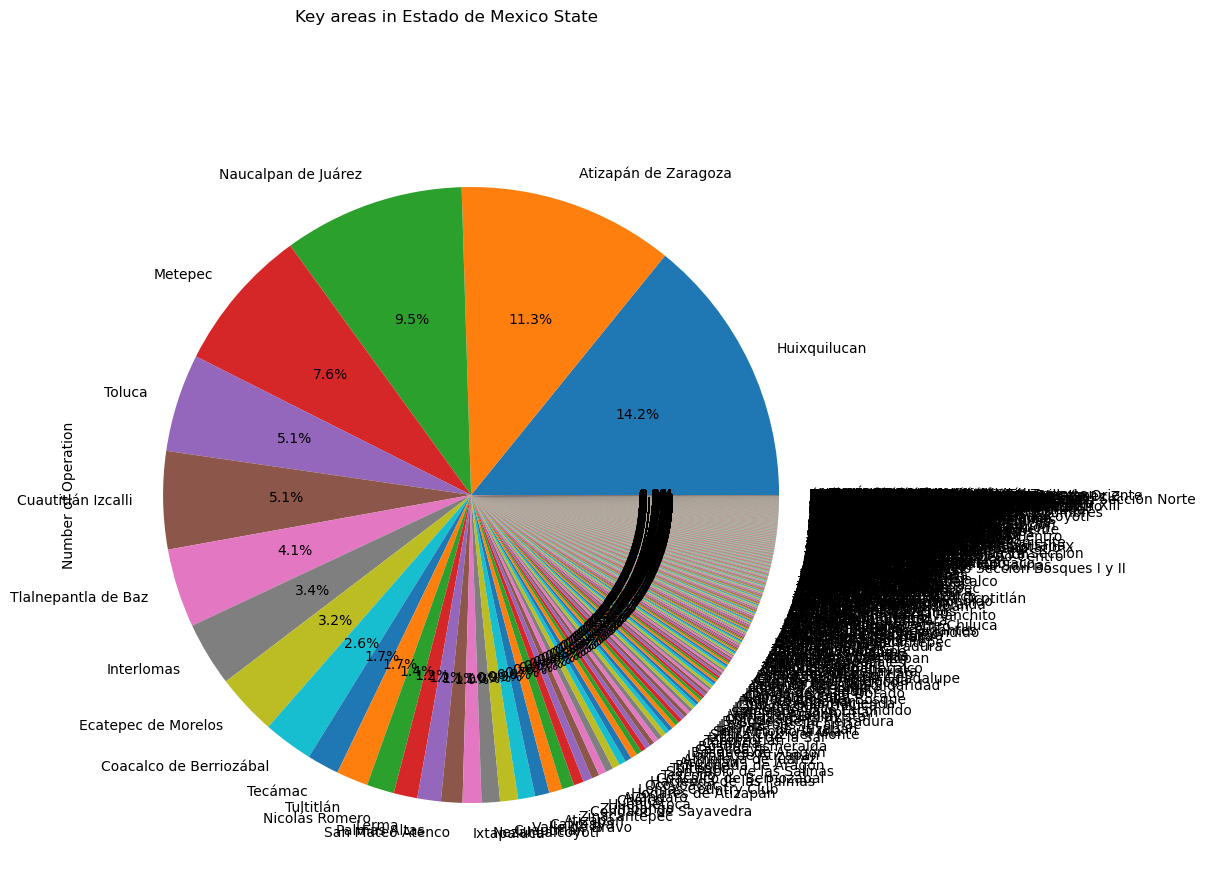

In [100]:
df1.plot.pie(subplots=True,autopct='%.1f%%',figsize=(20,10),title='Key areas in Estado de Mexico State',legend=False)

Top major towns or cities where we have highest number of properties avilable for sale or rent in Estado de México state  are  :
    
   Huixquilucan: 13.6%
        
   Atizapán de Zaragoza:  11.8%
        
   Naucalpan de Juárez: 8.8%
    
   Metepec: 7.1%
        
   Toluca 5.5%

#### Important areas  in Baja California State 

In [101]:
df=data[data.state_name=='Baja California']
df=pd.DataFrame(df.groupby("place_name").size(),columns=['Number of Operation'])

df1=df.sort_values(by=['Number of Operation'],ascending=False)

df1


Number of Operation
place_name                                  
Tijuana                                17487
Mexicali                                5248
Ensenada                                2398
Playas de Rosarito                      1128
Zona Urbana Río Tijuana                  725
...                                      ...
Chamizal                                   1
Villa Corona del Mar                       1
Orquídea                                   1
Parajes de Oriente                         1
El Seminario                               1

[731 rows x 1 columns]

array([<AxesSubplot:ylabel='Number of Operation'>], dtype=object)

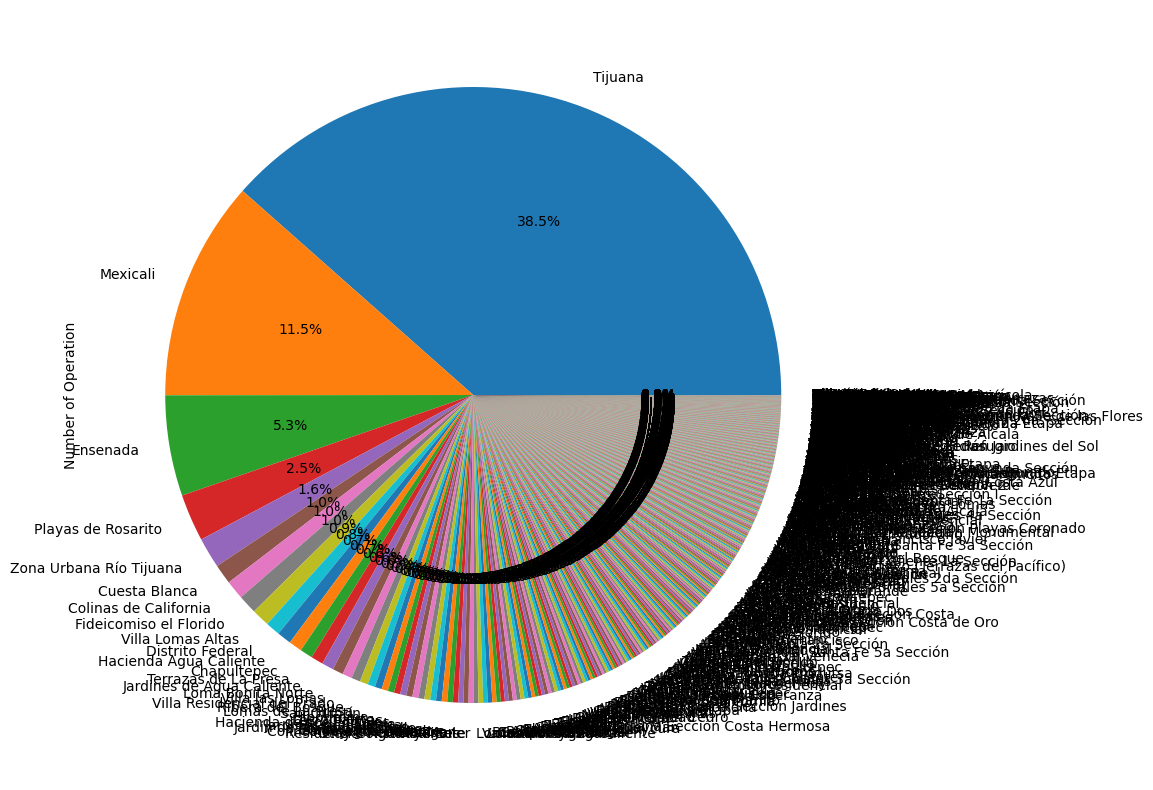

In [102]:
df1.plot.pie(subplots=True,autopct='%.1f%%',figsize=(20,10),legend=False)

In [103]:
print('Top major towns or cities where we have highest number of properties avilable for sale or rent in Baja California state  are:')
df1.head(5)

Top major towns or cities where we have highest number of properties avilable for sale or rent in Baja California state  are:


Number of Operation
place_name                                  
Tijuana                                17487
Mexicali                                5248
Ensenada                                2398
Playas de Rosarito                      1128
Zona Urbana Río Tijuana                  725

About 82% of the properties available for sale or rent in Baja California state are in Distrito Federal city

#### Important Areas in Queretaro State

In [104]:
df=data[data.state_name=='Querétaro']
df=pd.DataFrame(df.groupby("place_name").size(),columns=['Number of Operation'])

df1=df.sort_values(by=['Number of Operation'],ascending=False)

df1.head(5)

Number of Operation
place_name                           
Querétaro                      123534
Corregidora                     19596
El Marqués                       8657
San Juan del Río                 8626
Juriquilla                       7392

array([<AxesSubplot:ylabel='Number of Operation'>], dtype=object)

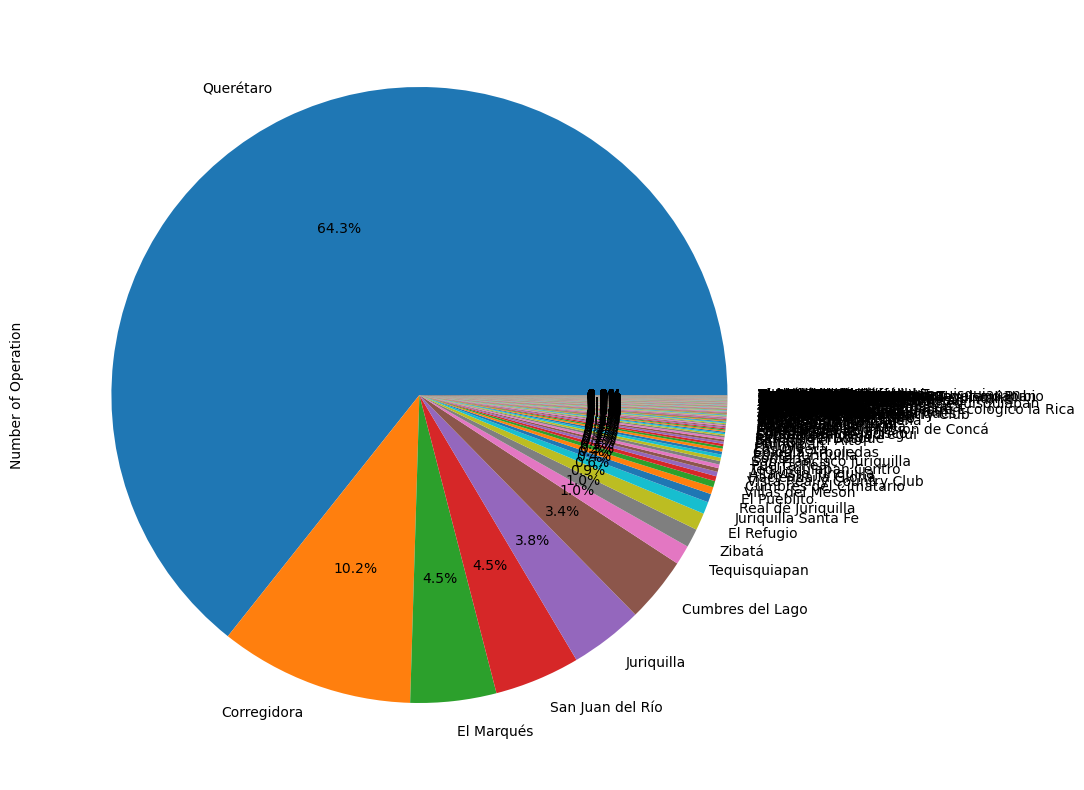

In [105]:
df1.plot.pie(subplots=True,autopct='%.1f%%',figsize=(20,10),legend=False)

In [106]:
print('Top major towns or cities where we have highest number of properties avilable for sale or rent in Querétaro state are:')
df1.head(5)

Top major towns or cities where we have highest number of properties avilable for sale or rent in Querétaro state are:


Number of Operation
place_name                           
Querétaro                      123534
Corregidora                     19596
El Marqués                       8657
San Juan del Río                 8626
Juriquilla                       7392

About 82% of the properties available for sale or rent in Querétaro state are in Querétaro

#### Important Areas in Veracruz de Ignacio de la Llave

In [107]:
df=data[data.state_name=='Veracruz de Ignacio de la Llave']

df=pd.DataFrame(df.groupby("place_name").size(),columns=['Number of Operation'])

df1=df.sort_values(by=['Number of Operation'],ascending=False)

df1.head(5)

Number of Operation
place_name                         
Veracruz                     125707
Coahuila                      11327
Nuevo Veracruz                  137
Las Bajadas                     124
Bajos del Jobo                   68

array([<AxesSubplot:ylabel='Number of Operation'>], dtype=object)

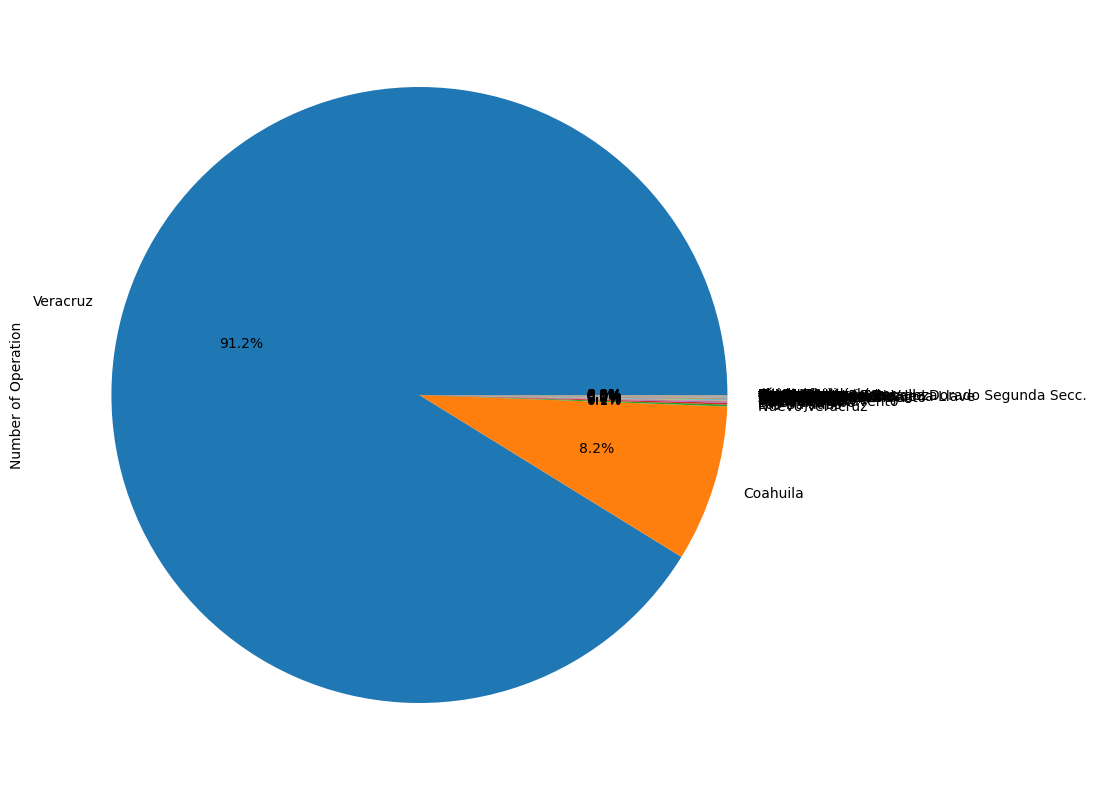

In [108]:
df1.plot.pie(subplots=True,autopct='%.1f%%',figsize=(20,10),legend=False)

In [109]:
print('Top major towns or cities where we have highest number of properties avilable for sale or rent in Veracruz de Ignacio de la Llave state are:')
df1.head(5)

Top major towns or cities where we have highest number of properties avilable for sale or rent in Veracruz de Ignacio de la Llave state are:


Number of Operation
place_name                         
Veracruz                     125707
Coahuila                      11327
Nuevo Veracruz                  137
Las Bajadas                     124
Bajos del Jobo                   68

About 65% of the properties available for sale or rent in  state are in Veracruz de Ignacio de la Llave are in Veracruz

# Quantitative Analyis 

In [110]:
print(f'quantitative columns: {quan_cols}')

quantitative columns: ['price_aprox_local_currency', 'surface_total_in_m2', 'price_per_m2', 'lat', 'lon', 'price_aprox_usd', 'price', 'price_usd_per_m2']


In [111]:
data.describe()

lat           lon         price  price_aprox_local_currency  \
count  2.361416e+06  2.361416e+06  2.361416e+06                2.361416e+06   
mean   2.091525e+01 -9.878102e+01  2.682734e+06                3.276684e+06   
std    2.985924e+00  5.309449e+00  6.294907e+06                8.212069e+06   
min    1.470887e+01 -1.316414e+02  5.000000e+01                8.847600e+02   
25%    1.920921e+01 -1.003975e+02  4.240000e+05                5.247885e+05   
50%    2.020148e+01 -9.924253e+01  1.452000e+06                1.639841e+06   
75%    2.112758e+01 -9.817825e+01  3.000000e+06                3.440103e+06   
max    8.991676e+01  1.052345e+02  9.500000e+08                9.452642e+08   

       price_aprox_usd  surface_total_in_m2  price_usd_per_m2  price_per_m2  
count     2.361416e+06         2.210662e+06      2.210662e+06  2.210662e+06  
mean      1.791967e+05         2.794925e+03      8.978364e+02  1.479787e+04  
std       4.481508e+05         1.213858e+06      1.872247e+04  1.952139e+05  
min       5.000000e+01         1.000000e+00      3.755250e-07  7.200000e-06  
25%       2.868632e+04         9.500000e+01      2.893548e+02  4.850000e+03  
50%       8.928813e+04         1.620000e+02      5.667674e+02  1.011905e+04  
75%       1.872500e+05         2.980000e+02      8.940003e+02  1.496599e+04  
max       4.954910e+07         1.111111e+09      5.900000e+06  6.900000e+07

## Price of property: Selling 

We will look at the price of selling the following categories of property.The price shall be considered in the local currency (MXN)

1. House

2. Apartment 

3. Store.

4. PH

### Price of selling house 

In [112]:
df=data.price_aprox_local_currency[(data.property_type=='house') & (data.operation=='sell')]
df.describe()

count    1.459753e+06
mean     3.902935e+06
std      8.408984e+06
min      8.848650e+04
25%      1.154278e+06
50%      2.021819e+06
75%      3.842416e+06
max      9.365352e+08
Name: price_aprox_local_currency, dtype: float64

<AxesSubplot:ylabel='Frequency'>

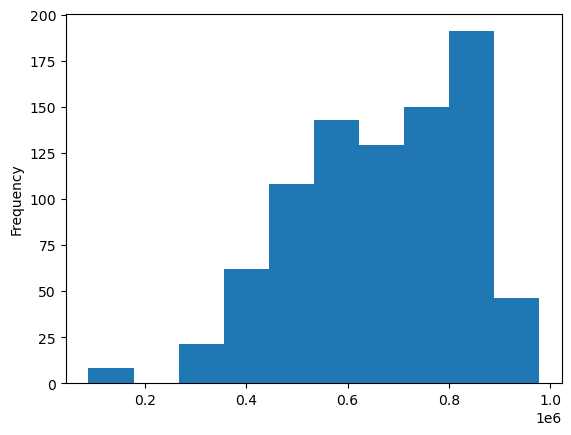

In [113]:
df_=data.price_aprox_local_currency[(data.property_type=='house') & (data.operation=='sell')]
df2=df_[(data.price<50000)]

df2.plot.hist()

In [114]:
df_=data.price_aprox_local_currency[(data.property_type=='house') & (data.operation=='sell')]

#df=data.price_aprox_usd



df2=df_[(data.price_aprox_local_currency<10000000) & (data.price_aprox_local_currency>50000)]



<AxesSubplot:ylabel='Frequency'>

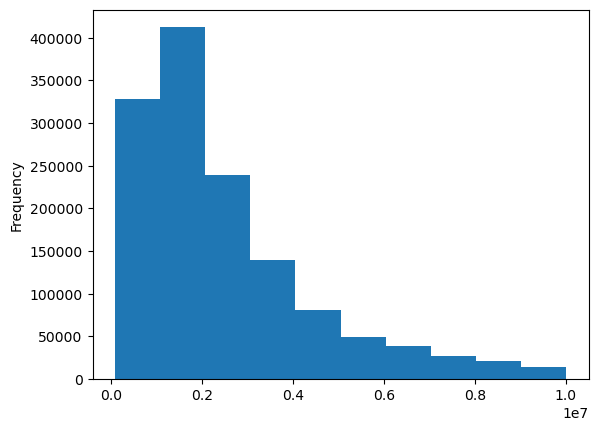

In [115]:
df2.plot.hist()

<AxesSubplot:ylabel='Frequency'>

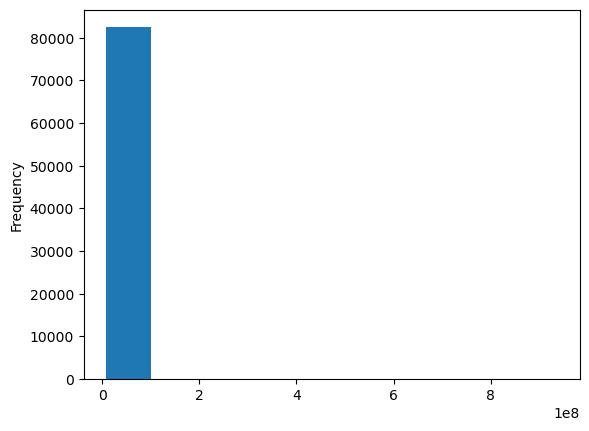

In [116]:
df2=df_[(data.price>10000000)]
df2.plot.hist()

In [117]:
print('average price of sold houses in Mexico :',round(df.mean()))

average price of sold houses in Mexico : 3902935


In [118]:
print('Modal price of sold houses in Mexico :',round(df.mode()[0]))

Modal price of sold houses in Mexico : 1991015


In [119]:
print('Median price of sold houses in Mexico :',round(df.median()))

Median price of sold houses in Mexico : 2021819


In [120]:
print('Least price of sold houses in Mexico :',round(df.min()))

Least price of sold houses in Mexico : 88486


In [121]:
print('Least price of sold houses in Mexico :',round(df.max()))

Least price of sold houses in Mexico : 936535198


In [122]:
print(' The price of the top 5% most expensive sold houses in Mexico :',round(df.quantile(0.95)))

 The price of the top 5% most expensive sold houses in Mexico : 13017935


In [123]:
print(' The price of the top 2% most expensive sold houses in Mexico :',round(df.quantile(0.98)))

 The price of the top 2% most expensive sold houses in Mexico : 22373640


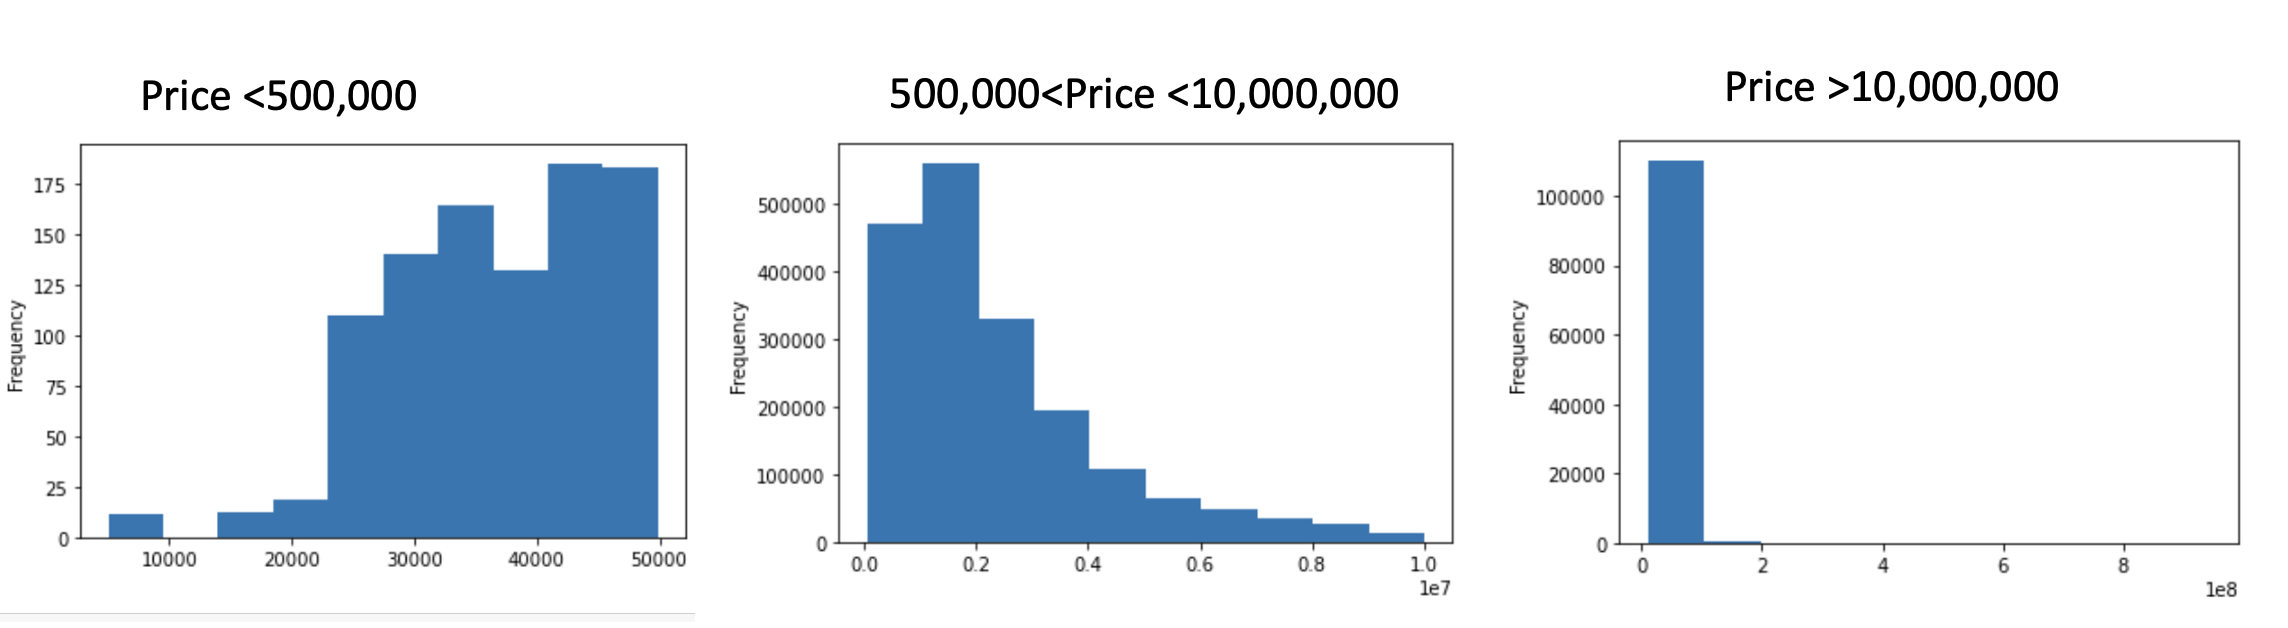

The price of the houses sold in Mexico is strongly skewed right. The majority of the houses have low price, they  are on the left side of the distribution while  we have few houses with extremely  high price  on the right side of the distribution.

The average price of the houses sold is  MXN 3,928,177

The least price of the houses sold is MXN 88,486
 
The most expensive house sold is MXN 936,535,198

The median price of the house sold is  MXN 2,044,454, the median price is lower than the average price because the average price is pushed up by the extremely expensive few houses

75% of the house sold cost less than  MXN 3,851,963 

95% of the house sold cost less than MXN 13,076,209

just 2% of the house sold cost more than MXN 22,631,693

### House Selling prices per states

In [124]:
df=data[(data.property_type=='house') & (data.operation=='sell')]
df

created_on operation property_type               place_name  \
129976   2015-01-05      sell         house                   Oaxaca   
129979   2015-03-28      sell         house                  Morelos   
129993   2015-01-16      sell         house                   Puebla   
129994   2015-01-05      sell         house                   Puebla   
129995   2015-01-05      sell         house                   Puebla   
...             ...       ...           ...                      ...   
3382524  2017-05-20      sell         house       Acapulco de Juárez   
3382541  2017-05-30      sell         house    Parque de Poblamiento   
3382542  2017-05-21      sell         house    Parque de Poblamiento   
3382543  2017-05-12      sell         house  Bosques del Prado Norte   
3382544  2017-05-10      sell         house     Condado de Sayavedra   

               state_name        lat         lon      price currency  \
129976             Oaxaca  17.098608  -96.664839  4500000.0      MXN   
129979            Morelos  18.801161  -98.924116  1390000.0      MXN   
129993             Puebla  19.042429  -98.204697  5000000.0      MXN   
129994             Puebla  19.048720  -98.190535  1500000.0      MXN   
129995             Puebla  19.010390  -98.246341  4300000.0      MXN   
...                   ...        ...         ...        ...      ...   
3382524          Guerrero  16.866024  -99.884319  4500000.0      MXN   
3382541           Hidalgo  20.116900  -98.768716  4500000.0      MXN   
3382542           Hidalgo  20.118114  -98.768793  4500000.0      MXN   
3382543    Aguascalientes  21.917067 -102.307022  4500000.0      MXN   
3382544  Estado de México  19.574133  -99.320145  4500000.0      MXN   

         price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
129976                   4749791.08        268390.72                750.0   
129979                   1554651.17         87846.80                168.0   
129993                   5277545.81        298211.92                269.0   
129994                   1721069.50         97250.40                165.0   
129995                   4538689.37        256462.25                290.0   
...                             ...              ...                  ...   
3382524                  4502228.03        253195.89                200.0   
3382541                  4502228.03        253195.89                377.0   
3382542                  4502228.03        253195.89                377.0   
3382543                  4502228.03        253195.89                410.0   
3382544                  4502228.03        253195.89                390.0   

         price_usd_per_m2  price_per_m2  
129976         357.854293   6000.000000  
129979         522.897619   8273.809524  
129993        1108.594498  18587.360595  
129994         589.396364   9090.909091  
129995         884.352586  14827.586207  
...                   ...           ...  
3382524       1265.979450  22500.000000  
3382541        671.607135  11936.339523  
3382542        671.607135  11936.339523  
3382543        617.550951  10975.609756  
3382544        649.220231  11538.461538  

[1459753 rows x 14 columns]

In [125]:
mean_price_per_state = df.groupby("state_name")["price_aprox_local_currency"].mean().sort_values(ascending = False)
mean_price_per_state 

state_name
Ciudad de México                   3.482351e+07
Distrito Federal                   8.675301e+06
Quintana Roo                       7.560028e+06
Nuevo León                         7.352920e+06
Baja California Sur                6.160716e+06
Guerrero                           5.862600e+06
Jalisco                            5.388953e+06
Nayarit                            4.643156e+06
Guanajuato                         4.428605e+06
Estado de México                   3.782019e+06
Puebla                             3.730110e+06
Morelos                            3.690075e+06
Oaxaca                             3.671847e+06
Querétaro                          3.446185e+06
Yucatán                            2.963163e+06
Sinaloa                            2.816456e+06
Chihuahua                          2.668070e+06
Campeche                           2.665176e+06
San Luis Potosí                    2.554666e+06
Colima                             2.537866e+06
Tabasco                      

<AxesSubplot:xlabel='state_name'>

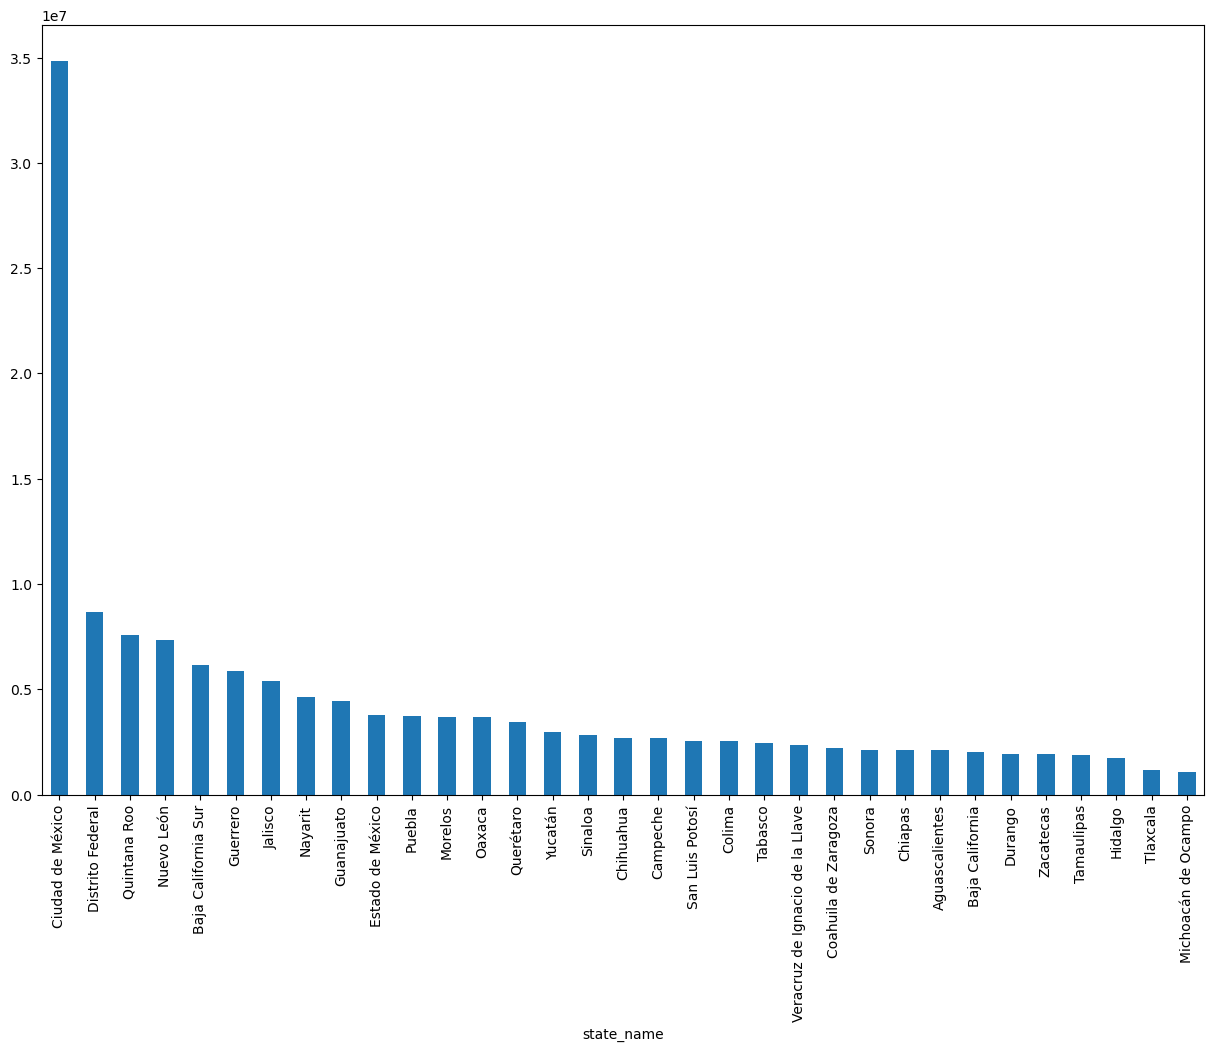

In [126]:
mean_price_per_state .plot.bar(figsize=(15,10))

In [127]:
median_price_per_state = df.groupby("state_name")["price_aprox_local_currency"].median().sort_values(ascending = False)
median_price_per_state 

state_name
Ciudad de México                   7817334.96
Nuevo León                         3801937.64
Distrito Federal                   3779497.85
Quintana Roo                       3361531.92
Puebla                             2799999.92
Jalisco                            2532483.79
Querétaro                          2514655.58
Morelos                            2414069.35
Guanajuato                         2406323.54
Baja California Sur                2101039.71
Yucatán                            2029967.08
Estado de México                   1989999.99
Guerrero                           1986261.83
Campeche                           1976677.84
Oaxaca                             1808623.91
Tabasco                            1782461.85
Chihuahua                          1782459.75
Nayarit                            1745314.45
San Luis Potosí                    1730882.12
Sinaloa                            1659672.71
Veracruz de Ignacio de la Llave    1658930.83
Chiapas                

<AxesSubplot:xlabel='state_name'>

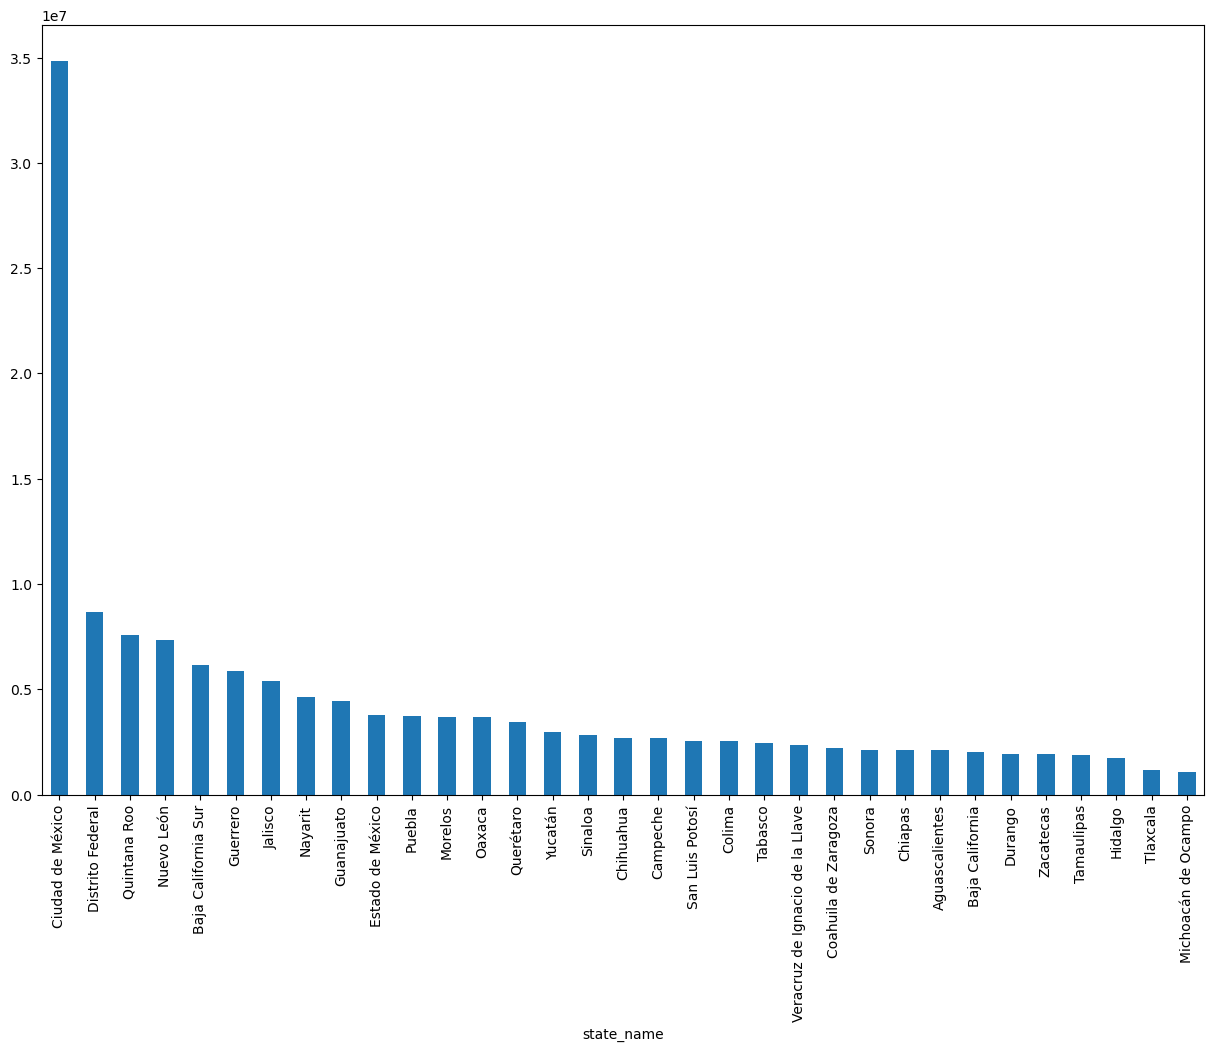

In [128]:
mean_price_per_state .plot.bar(figsize=(15,10))

In [129]:
tab=pd.DataFrame({'mean':mean_price_per_state,'median':median_price_per_state })
tab.sort_values(by='mean',inplace=True,ascending=False)

<AxesSubplot:xlabel='state_name'>

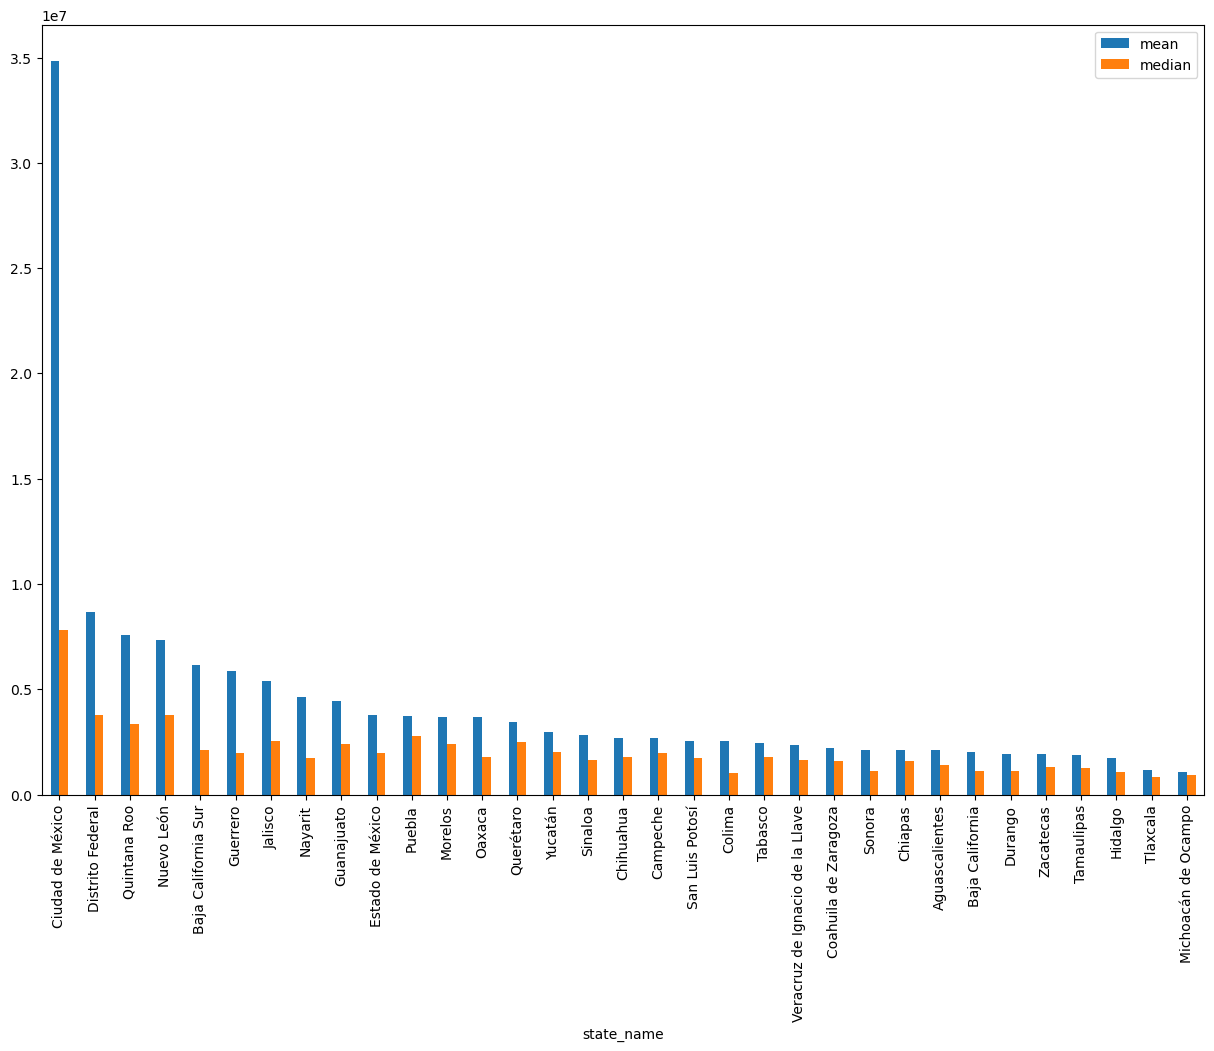

In [130]:
tab.plot.bar(figsize=(15,10))

In [131]:
print('the top  5 states where house are most expensive to buy ' ,tab.index[:5])

the top  5 states where house are most expensive to buy  Index(['Ciudad de México', 'Distrito Federal', 'Quintana Roo', 'Nuevo León',
       'Baja California Sur'],
      dtype='object', name='state_name')


In [132]:
print('the bottom  5 states where house are least  expensive' ,tab.index[-5:])

the bottom  5 states where house are least  expensive Index(['Zacatecas', 'Tamaulipas', 'Hidalgo', 'Tlaxcala',
       'Michoacán de Ocampo'],
      dtype='object', name='state_name')


The top  6 states where house are most expensive are:
    
   Ciudad de México
    
   Distrito Federal
    
   Quintana Roo
    
   Nuevo León
    
   Baja California

For propective buyers, the median price is better to make decision than the average price of the houses becuase:
    
Average price of the houses is pushed by the extremely expensive houses which their price are outlier
  
The median price indicates the highest  price of  of the first half of the houses  in each state, and price of the 75% of the houses listed  in each state is closer to the median price of he house  than the average price
  
Note that  the average prices of the houses is less affected by the outlier in the states where the price of the houses is low. Therefore, in state like Zacatecas, Tamaulipas, Hidalgo, Tlaxcala
      and Michoacán de Ocampo, there more option suitable to low income earnerswho want to buy house

###  House rent per state

In [133]:
df=data[(data.property_type=='house') & (data.operation=='rent')]
df

created_on operation property_type                         place_name  \
0       2015-01-05      rent         house                            Morelos   
1       2015-01-05      rent         house                            Morelos   
7       2015-02-20      rent         house                       Quintana Roo   
11      2015-02-24      rent         house                             Colima   
22      2015-01-05      rent         house                             Centro   
...            ...       ...           ...                                ...   
860204  2017-06-05      rent         house               Condado de Sayavedra   
860205  2017-10-21      rent         house               Condado de Sayavedra   
860206  2017-10-05      rent         house               Condado de Sayavedra   
860207  2017-08-10      rent         house                Fuentes de Satélite   
860209  2017-10-02      rent         house  San Cristóbal de las Casas Centro   

              state_name        lat         lon    price currency  \
0                Morelos  18.824124  -98.948113  10000.0      MXN   
1                Morelos  18.825402  -98.946803  20000.0      MXN   
7           Quintana Roo  21.133346  -86.861353  12500.0      MXN   
11                Colima  19.253490 -103.714803   9000.0      MXN   
22               Tabasco  17.993550  -92.941501  35000.0      MXN   
...                  ...        ...         ...      ...      ...   
860204  Estado de México  19.574132  -99.320148  50000.0      MXN   
860205  Estado de México  19.573419  -99.321360  45000.0      MXN   
860206  Estado de México  19.574133  -99.320145  55000.0      MXN   
860207  Estado de México  19.522699  -99.260544  20000.0      MXN   
860209           Chiapas  16.736941  -92.636918   5000.0      MXN   

        price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
0                         11184.51           631.99                500.0   
1                         22485.30          1270.55                480.0   
7                         14638.67           827.17                190.0   
11                         9375.85           529.79                225.0   
22                        33192.52          1875.57                270.0   
...                            ...              ...                  ...   
860204                    49656.40          2607.84                670.0   
860205                    44690.84          2347.06                500.0   
860206                    54622.16          2868.63               1000.0   
860207                    19862.45          1043.13                350.0   
860209                     4965.56           260.78                  NaN   

        price_usd_per_m2  price_per_m2  
0               1.263980     20.000000  
1               2.646979     41.666667  
7               4.353526     65.789474  
11              2.354622     40.000000  
22              6.946556    129.629630  
...                  ...           ...  
860204          3.892299     71.839080  
860205          4.694120     90.000000  
860206          2.868630     55.000000  
860207          2.980371     57.142857  
860209               NaN           NaN  

[200952 rows x 14 columns]

In [134]:
df=data.price_aprox_local_currency[(data.property_type=='house') & (data.operation=='rent')]
df.describe()

count    2.009520e+05
mean     2.152707e+04
std      5.151312e+04
min      9.045000e+02
25%      8.137720e+03
50%      1.389997e+04
75%      2.259687e+04
max      1.837292e+06
Name: price_aprox_local_currency, dtype: float64

<AxesSubplot:ylabel='Frequency'>

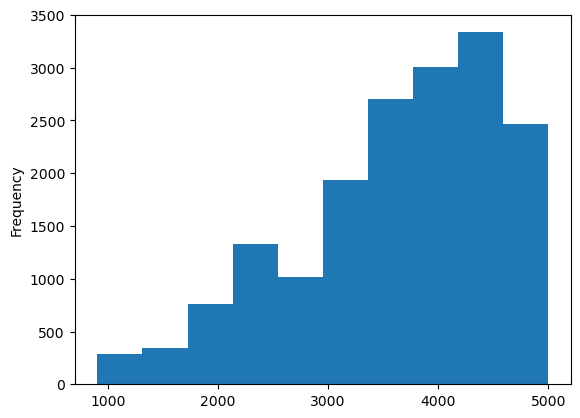

In [135]:
df_=data.price_aprox_local_currency[(data.property_type=='house') & (data.operation=='rent')]

#df=data.price_aprox_usd



df2=df_[data.price_aprox_local_currency<5000]
df2.plot.hist()

In [136]:
df_=data.price_aprox_local_currency[(data.property_type=='house') & (data.operation=='rent')]

#df=data.price_aprox_usd



df2=df_[(data.price_aprox_local_currency<200000) & (data.price_aprox_local_currency>5000)]

<AxesSubplot:ylabel='Frequency'>

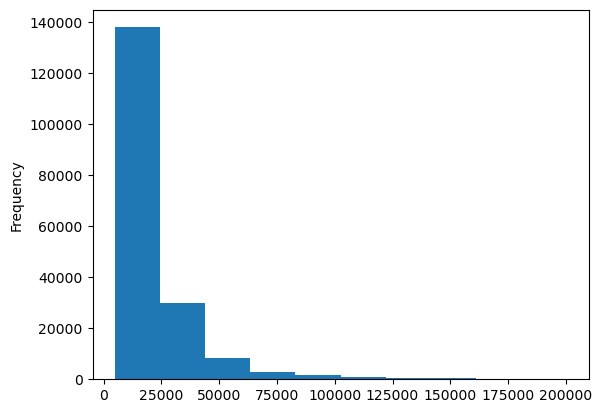

In [137]:
df2.plot.hist()

<AxesSubplot:ylabel='Frequency'>

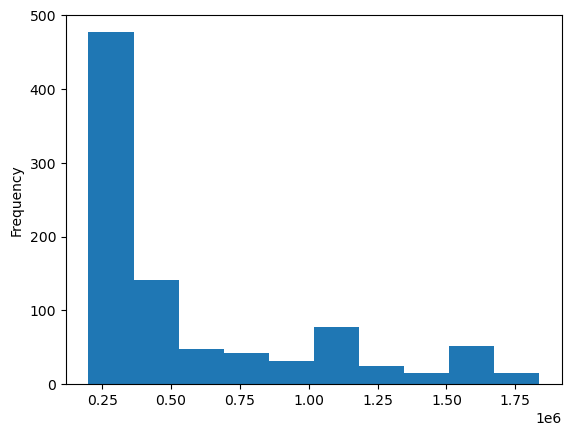

In [138]:
df_=data.price_aprox_local_currency[(data.property_type=='house') & (data.operation=='rent')]

#df=data.price_aprox_usd



df2=df_[data.price_aprox_local_currency>200000]
df2.plot.hist()

In [139]:
print('average price of house rent in Mexico :',round(df.mean()))

average price of house rent in Mexico : 21527


In [140]:
print('modal price of house rent in Mexico :',round(df.mode()[0]))

modal price of house rent in Mexico : 15008


In [141]:
print('median price of house rent in Mexico :',round(df.median()))

median price of house rent in Mexico : 13900


In [142]:
print('Least price of house rent in Mexico :',round(df.min()))

Least price of house rent in Mexico : 904


In [143]:
print('Most expensive house rent in Mexico :',round(df.max()))

Most expensive house rent in Mexico : 1837292


In [144]:
print(' The price of the top 5% most expensive house rent in Mexico :',round(df.quantile(0.95)))

 The price of the top 5% most expensive house rent in Mexico : 54456


In [145]:
print(' The price of the top 2% most expensive house rent in Mexico :',round(df.quantile(0.98)))

 The price of the top 2% most expensive house rent in Mexico : 90252


In [146]:
print(' The price of the top 2% most expensive house rent in Mexico :',round(df.quantile(0.99)))

 The price of the top 2% most expensive house rent in Mexico : 126354


The cost of rent of the houses in Mexico is strongly skewed right. The majority of the houses have low rent, they are on the left side of the distribution while we have few houses with extremely high rent on the right side of the distribution.

The average rent of the houses is MXN 23,558

The least house  rent  in Mexico  is MXN 900

The most expensive house rent is MXN 1,837,292

The median price of the house rent is MXN 2,044,454, the median rent is lower than the average house rent  because the average rent is pushed up by the extremely expensive few house rent

The rent of the 75%  house rent  in Mexico cost less MXN 24,012

The rent of the 95%  house rent in Mexico cost less MXN 63,177

The rent of  2% of the house rent  in Mexico  costs more than MXN 154,236

### Cost of house rent per states

In [147]:
df=data[(data.property_type=='house') & (data.operation=='rent')]
df

created_on operation property_type                         place_name  \
0       2015-01-05      rent         house                            Morelos   
1       2015-01-05      rent         house                            Morelos   
7       2015-02-20      rent         house                       Quintana Roo   
11      2015-02-24      rent         house                             Colima   
22      2015-01-05      rent         house                             Centro   
...            ...       ...           ...                                ...   
860204  2017-06-05      rent         house               Condado de Sayavedra   
860205  2017-10-21      rent         house               Condado de Sayavedra   
860206  2017-10-05      rent         house               Condado de Sayavedra   
860207  2017-08-10      rent         house                Fuentes de Satélite   
860209  2017-10-02      rent         house  San Cristóbal de las Casas Centro   

              state_name        lat         lon    price currency  \
0                Morelos  18.824124  -98.948113  10000.0      MXN   
1                Morelos  18.825402  -98.946803  20000.0      MXN   
7           Quintana Roo  21.133346  -86.861353  12500.0      MXN   
11                Colima  19.253490 -103.714803   9000.0      MXN   
22               Tabasco  17.993550  -92.941501  35000.0      MXN   
...                  ...        ...         ...      ...      ...   
860204  Estado de México  19.574132  -99.320148  50000.0      MXN   
860205  Estado de México  19.573419  -99.321360  45000.0      MXN   
860206  Estado de México  19.574133  -99.320145  55000.0      MXN   
860207  Estado de México  19.522699  -99.260544  20000.0      MXN   
860209           Chiapas  16.736941  -92.636918   5000.0      MXN   

        price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
0                         11184.51           631.99                500.0   
1                         22485.30          1270.55                480.0   
7                         14638.67           827.17                190.0   
11                         9375.85           529.79                225.0   
22                        33192.52          1875.57                270.0   
...                            ...              ...                  ...   
860204                    49656.40          2607.84                670.0   
860205                    44690.84          2347.06                500.0   
860206                    54622.16          2868.63               1000.0   
860207                    19862.45          1043.13                350.0   
860209                     4965.56           260.78                  NaN   

        price_usd_per_m2  price_per_m2  
0               1.263980     20.000000  
1               2.646979     41.666667  
7               4.353526     65.789474  
11              2.354622     40.000000  
22              6.946556    129.629630  
...                  ...           ...  
860204          3.892299     71.839080  
860205          4.694120     90.000000  
860206          2.868630     55.000000  
860207          2.980371     57.142857  
860209               NaN           NaN  

[200952 rows x 14 columns]

In [148]:
mean_house_rent_per_state = df.groupby("state_name")["price_aprox_local_currency"].mean().sort_values(ascending = False)
mean_house_rent_per_state

state_name
Distrito Federal                   88579.290647
Ciudad de México                   43092.687143
Baja California                    33843.329290
Estado de México                   29756.289626
Quintana Roo                       27822.423845
Oaxaca                             26366.068674
Nuevo León                         25427.024747
Jalisco                            24333.535963
San Luis Potosí                    22317.883918
Querétaro                          19453.990018
Campeche                           19400.556091
Yucatán                            18590.379687
Chihuahua                          18257.249814
Morelos                            18255.616407
Nayarit                            18233.498175
Puebla                             18200.810135
Baja California Sur                17861.726820
Chiapas                            17281.429672
Guanajuato                         16773.703795
Colima                             16122.531446
Guerrero                     

<AxesSubplot:xlabel='state_name'>

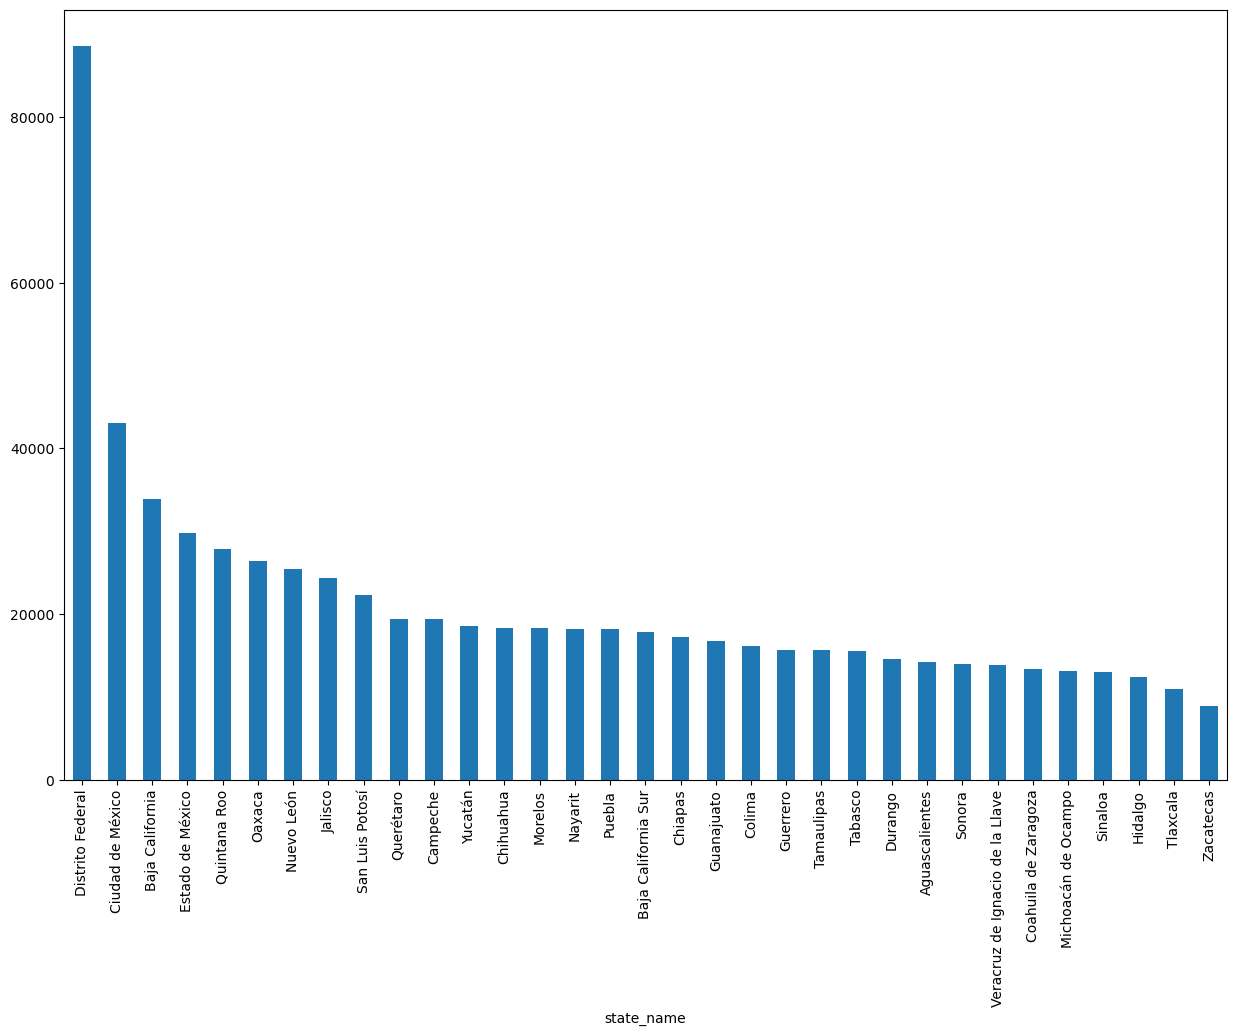

In [149]:
mean_house_rent_per_state.plot.bar(figsize=(15,10))

In [150]:
median_house_rent_per_state = df.groupby("state_name")["price_aprox_local_currency"].median().sort_values(ascending = False)
median_house_rent_per_state

state_name
Distrito Federal                   59999.970
Ciudad de México                   43372.160
Baja California                    18089.140
Quintana Roo                       18009.160
Jalisco                            17871.180
Nuevo León                         16887.860
Estado de México                   16436.200
San Luis Potosí                    15818.860
Puebla                             14941.990
Campeche                           14896.880
Querétaro                          14507.360
Oaxaca                             14259.530
Chihuahua                          13972.450
Michoacán de Ocampo                13107.950
Tabasco                            12999.850
Morelos                            12949.760
Aguascalientes                     12910.700
Guanajuato                         12044.480
Yucatán                            12044.480
Durango                            11005.380
Tamaulipas                         10978.420
Coahuila de Zaragoza               10899.940

<AxesSubplot:xlabel='state_name'>

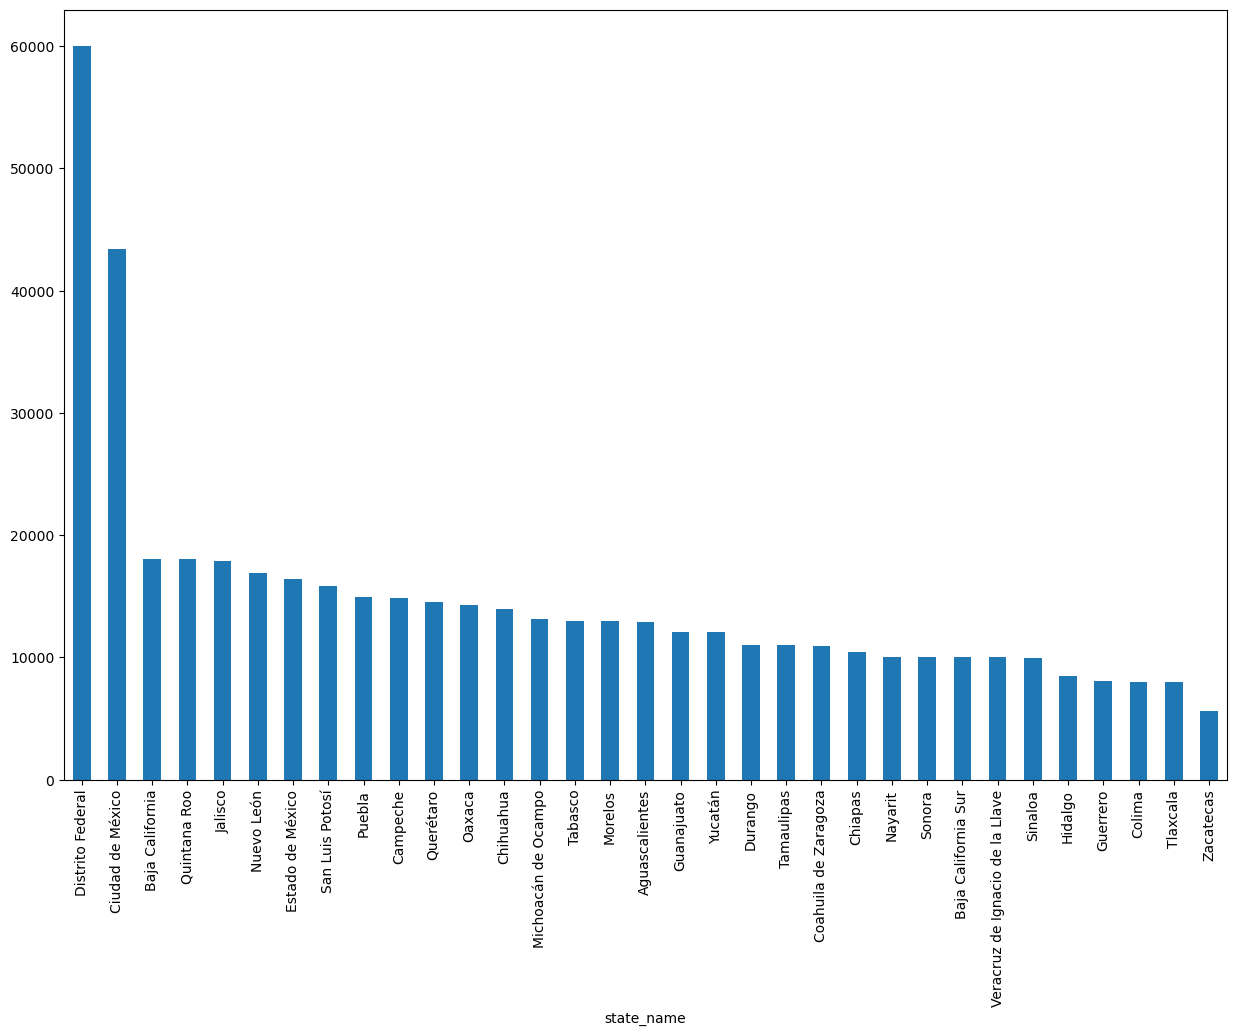

In [151]:
median_house_rent_per_state.plot.bar(figsize=(15,10))

In [152]:
tab=pd.DataFrame({'Average Rent':mean_house_rent_per_state,'Median rent':median_house_rent_per_state })
tab.sort_values(by='Median rent',inplace=True,ascending=False)

<AxesSubplot:xlabel='state_name'>

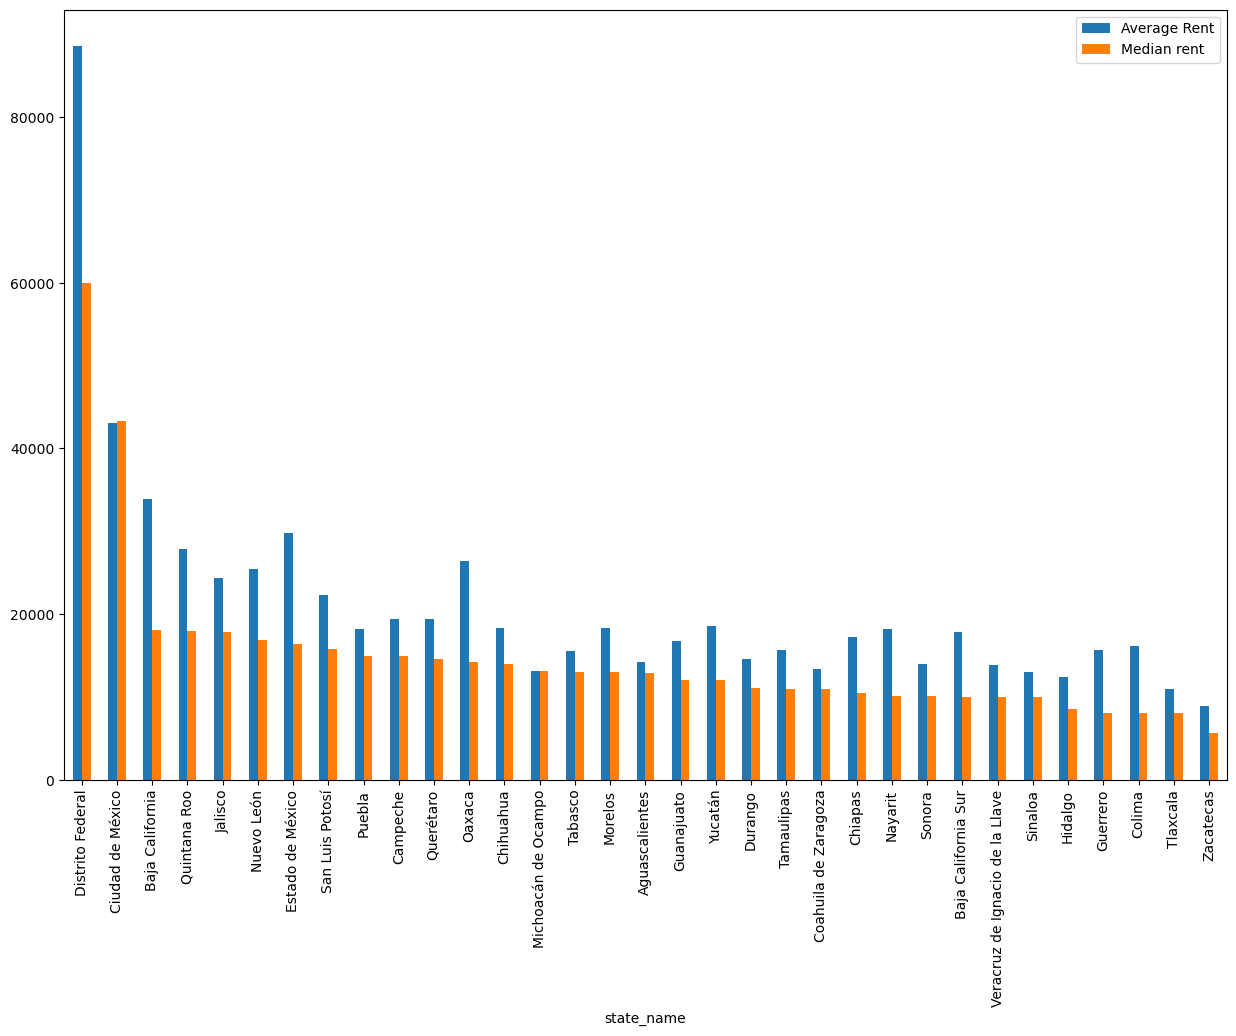

In [153]:
tab.plot.bar(figsize=(15,10))

In [154]:
print('the top  5 states where house  rent are most expensive' ,tab.index[:5])

the top  5 states where house  rent are most expensive Index(['Distrito Federal', 'Ciudad de México', 'Baja California',
       'Quintana Roo', 'Jalisco'],
      dtype='object', name='state_name')


In [155]:
print('the bottom  5 states where house rent  are least  expensive' ,tab.index[-5:])

the bottom  5 states where house rent  are least  expensive Index(['Hidalgo', 'Guerrero', 'Colima', 'Tlaxcala', 'Zacatecas'], dtype='object', name='state_name')


The top  5 states where house rent  are most expensive are:
    
   Distrito Federal
    
   Baja California
    
   Ciudad de México
    
   Estado de México
    
   Oaxaca

The top  5 states where house rent  are least expensive are:
    
Tlaxcala
    
Michoacán de Ocampo

Sinaloa
    
Aguascalientes
    
Veracruz de Ignacio de la Llave
    
   

For the individual who want to rent house, the median rent is better to make decision than the average rent of the houses becuase:
    
Average rent  of the houses is pushed  up by the extremely expensive  house rent  which are outliers
  
The median rent  indicates the highest rent of the first half of the houses in each state, and rent of the 75% of the house listed  in each state is closer to the median rent price than the average rent
  
For the low income earner who are looking for cheaper house to rent, they should focus on the following states

Tlaxcala

Michoacán de Ocampo

Sinaloa

Aguascalientes

Veracruz de Ignacio de la Llave

### Price of Selling Apartment 

In [156]:
df=data.price_aprox_local_currency[(data.property_type=='apartment') & (data.operation=='sell')]
df.describe()

count    4.119300e+05
mean     4.285963e+06
std      9.708776e+06
min      9.004442e+04
25%      1.036038e+06
50%      2.301173e+06
75%      4.893995e+06
max      9.452642e+08
Name: price_aprox_local_currency, dtype: float64

<AxesSubplot:ylabel='Frequency'>

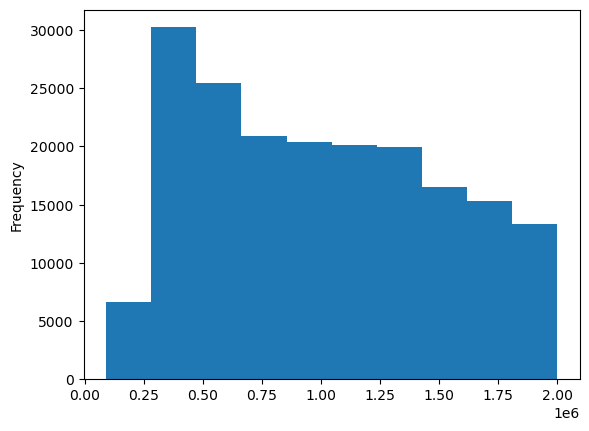

In [157]:
df_=data.price_aprox_local_currency[(data.property_type=='apartment') & (data.operation=='sell')]
#df=data.price_aprox_usd
df2=df_[data.price_aprox_local_currency<2000000]
df2.plot.hist()

<AxesSubplot:ylabel='Frequency'>

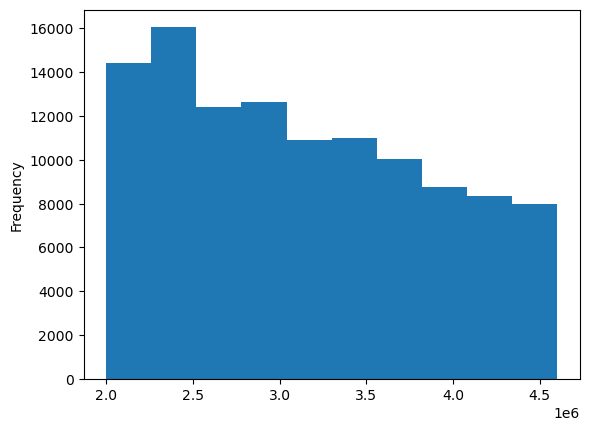

In [158]:
df_=data.price_aprox_local_currency[(data.property_type=='apartment') & (data.operation=='sell')]

#df=data.price_aprox_usd
df2=df_[(data.price_aprox_local_currency>2000000) & (data.price_aprox_local_currency<4600000)]
df2.plot.hist()

<AxesSubplot:ylabel='Frequency'>

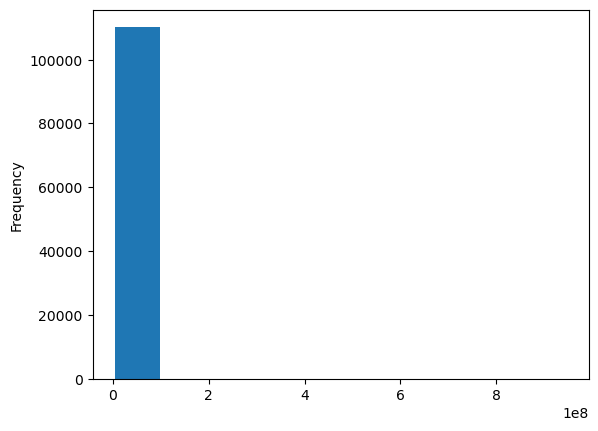

In [159]:
df_=data.price_aprox_local_currency[(data.property_type=='apartment') & (data.operation=='sell')]

#df=data.price_aprox_usd

df2=df_[(data.price_aprox_local_currency>4600000)]
df2.plot.hist()

In [160]:
print('average price of apartment sold in Mexico :',round(df.mean()))

average price of apartment sold in Mexico : 4285963


In [161]:
print('modal price of apartment sold in Mexico :',round(df.mode()[0]))

modal price of apartment sold in Mexico : 1200612


In [162]:
print('median price of apartment sold in Mexico :',round(df.median()))

median price of apartment sold in Mexico : 2301173


In [163]:
print('Least price of apartment sold in Mexico :',round(df.min()))

Least price of apartment sold in Mexico : 90044


In [164]:
print('Most expensive apartment sold in Mexico :',round(df.max()))

Most expensive apartment sold in Mexico : 945264224


In [165]:
print('The price of the top 5% most expensive apartmentt in Mexico :',round(df.quantile(0.95)))

The price of the top 5% most expensive apartmentt in Mexico : 14003914


In [166]:
print('The price of the top 2% most expensive apartment in Mexico :',round(df.quantile(0.98)))

The price of the top 2% most expensive apartment in Mexico : 21410408


In [167]:
print(' The price of the top 1% most expensive apartment in Mexico :',round(df.quantile(0.99)))

 The price of the top 1% most expensive apartment in Mexico : 28789738


The price of the apartments sold in Mexico is strongly skewed right. The majority of the apartments have low price, they  are on the left side of the distribution while  we have few apartments  with extremely  high price  on the right side of the distribution.

The average price of the apartment sold is  MXN 4,250,637

The least price of the apartment sold is MXN 90,044
 
The most expensive apartment sold is MXN 876,852,702

The median price of the apartment sold is  MXN 2,044,454, the median price is lower than the average price because the average price is pushed up by the extremely expensive few houses

75% of the apartments  sold cost less than  MXN 4,621,825

95% of the apartments sold cost less than MXN 14,781,435

Just 2% of the apartments sold cost more than MXN 30,203,126

### Cost of Apartments per states

In [168]:
df=data[(data.property_type=='apartment') & (data.operation=='sell')]
df

created_on operation property_type           place_name  \
129977   2015-03-27      sell     apartment              Jalisco   
130026   2015-01-05      sell     apartment              Zapopan   
133129   2015-01-05      sell     apartment              Zapopan   
133193   2015-01-05      sell     apartment          Guadalajara   
133213   2015-02-21      sell     apartment            Monterrey   
...             ...       ...           ...                  ...   
3396408  2017-06-26      sell     apartment             Guerrero   
3396409  2017-07-08      sell     apartment             Jiutepec   
3396412  2017-05-19      sell     apartment          Guadalajara   
3396413  2017-05-04      sell     apartment               Cancún   
3396414  2017-07-09      sell     apartment  Tlalnepantla de Baz   

               state_name        lat         lon      price currency  \
129977            Jalisco  20.633867 -103.282152   465000.0      MXN   
130026            Jalisco  20.717640 -103.411999  7800000.0      MXN   
133129            Jalisco  20.743200 -103.383278  6992000.0      MXN   
133193            Jalisco  20.689447 -103.394615  6515000.0      MXN   
133213         Nuevo León  25.735967 -100.397358  1080000.0      MXN   
...                   ...        ...         ...        ...      ...   
3396408          Guerrero  16.775039  -99.796154  4500000.0      MXN   
3396409           Morelos  18.882725  -99.163605  4500000.0      MXN   
3396412           Jalisco  20.671580 -103.363970  4500000.0      MXN   
3396413      Quintana Roo  21.136125  -86.830506  4500000.0      MXN   
3396414  Estado de México  19.553735  -99.218439  4500000.0      MXN   

         price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
129977                    536533.46         30317.25                 70.0   
130026                   7412242.80        418834.67                354.0   
133129                   7380120.08        417019.55                403.0   
133193                   6130747.68        346422.77                181.0   
133213                   1186411.24         67039.11                114.0   
...                             ...              ...                  ...   
3396408                  4502228.03        253195.89                110.0   
3396409                  4502228.03        253195.89                 65.0   
3396412                  4502228.03        253195.89                133.0   
3396413                  4502228.03        253195.89                215.0   
3396414                  4502228.03        253195.89                137.0   

         price_usd_per_m2  price_per_m2  
129977         433.103571   6642.857143  
130026        1183.148785  22033.898305  
133129        1034.787965  17349.875931  
133193        1913.937956  35994.475138  
133213         588.062368   9473.684211  
...                   ...           ...  
3396408       2301.780818  40909.090909  
3396409       3895.321385  69230.769231  
3396412       1903.728496  33834.586466  
3396413       1177.655302  20930.232558  
3396414       1848.145182  32846.715328  

[411930 rows x 14 columns]

In [169]:
mean_house_rent_per_state = df.groupby("state_name")["price_aprox_local_currency"].mean().sort_values(ascending = False)
mean_house_rent_per_state

state_name
Nuevo León                         7.331489e+06
Baja California Sur                7.174884e+06
Quintana Roo                       6.513349e+06
Nayarit                            6.280958e+06
Distrito Federal                   5.042978e+06
Jalisco                            5.042049e+06
Guerrero                           4.434406e+06
Ciudad de México                   3.857639e+06
Estado de México                   3.665498e+06
Oaxaca                             3.309315e+06
Sinaloa                            3.303658e+06
Chihuahua                          2.996489e+06
Colima                             2.987899e+06
Campeche                           2.753550e+06
Yucatán                            2.665162e+06
Baja California                    2.535357e+06
Puebla                             2.465303e+06
Querétaro                          2.435538e+06
Sonora                             2.365976e+06
Tabasco                            2.147422e+06
Veracruz de Ignacio de la Lla

<AxesSubplot:xlabel='state_name'>

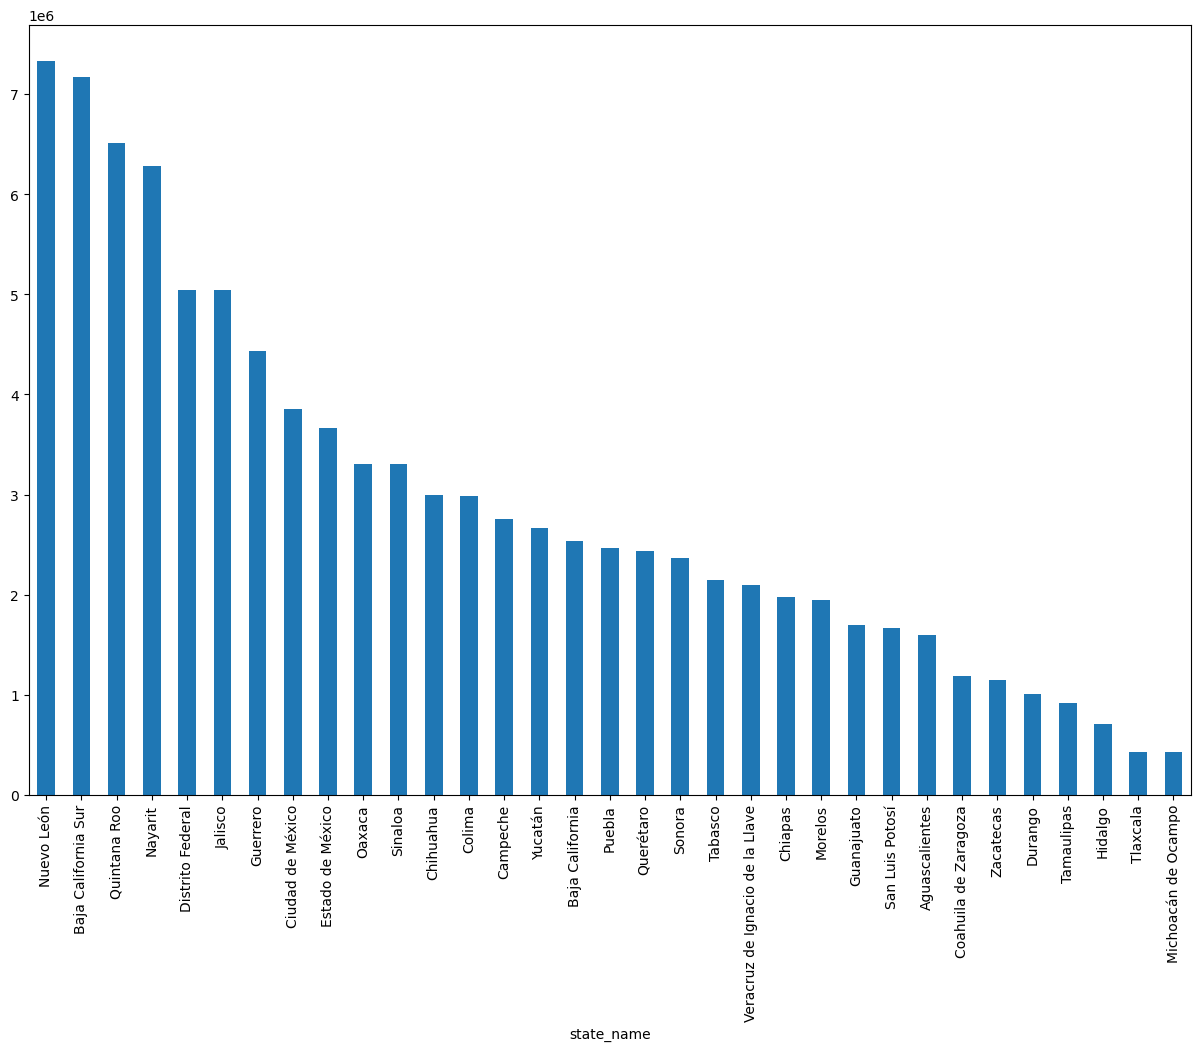

In [170]:
mean_house_rent_per_state.plot.bar(figsize=(15,10))

In [171]:
median_price_per_state = df.groupby("state_name")["price_aprox_local_currency"].median().sort_values(ascending = False)
median_price_per_state 

state_name
Nayarit                            5216594.500
Nuevo León                         4731651.750
Quintana Roo                       4503818.910
Baja California Sur                3904530.000
Jalisco                            3647244.130
Chihuahua                          2514615.670
Ciudad de México                   2489983.935
Sinaloa                            2378128.355
Distrito Federal                   2259614.470
Querétaro                          2251147.340
Guerrero                           2208183.740
Colima                             2166060.000
Puebla                             2084635.810
Oaxaca                             1891676.055
Baja California                    1819818.345
Sonora                             1803244.950
Yucatán                            1656137.850
Veracruz de Ignacio de la Llave    1559999.860
San Luis Potosí                    1533232.270
Campeche                           1453622.090
Morelos                            1320768.500
Ta

<AxesSubplot:xlabel='state_name'>

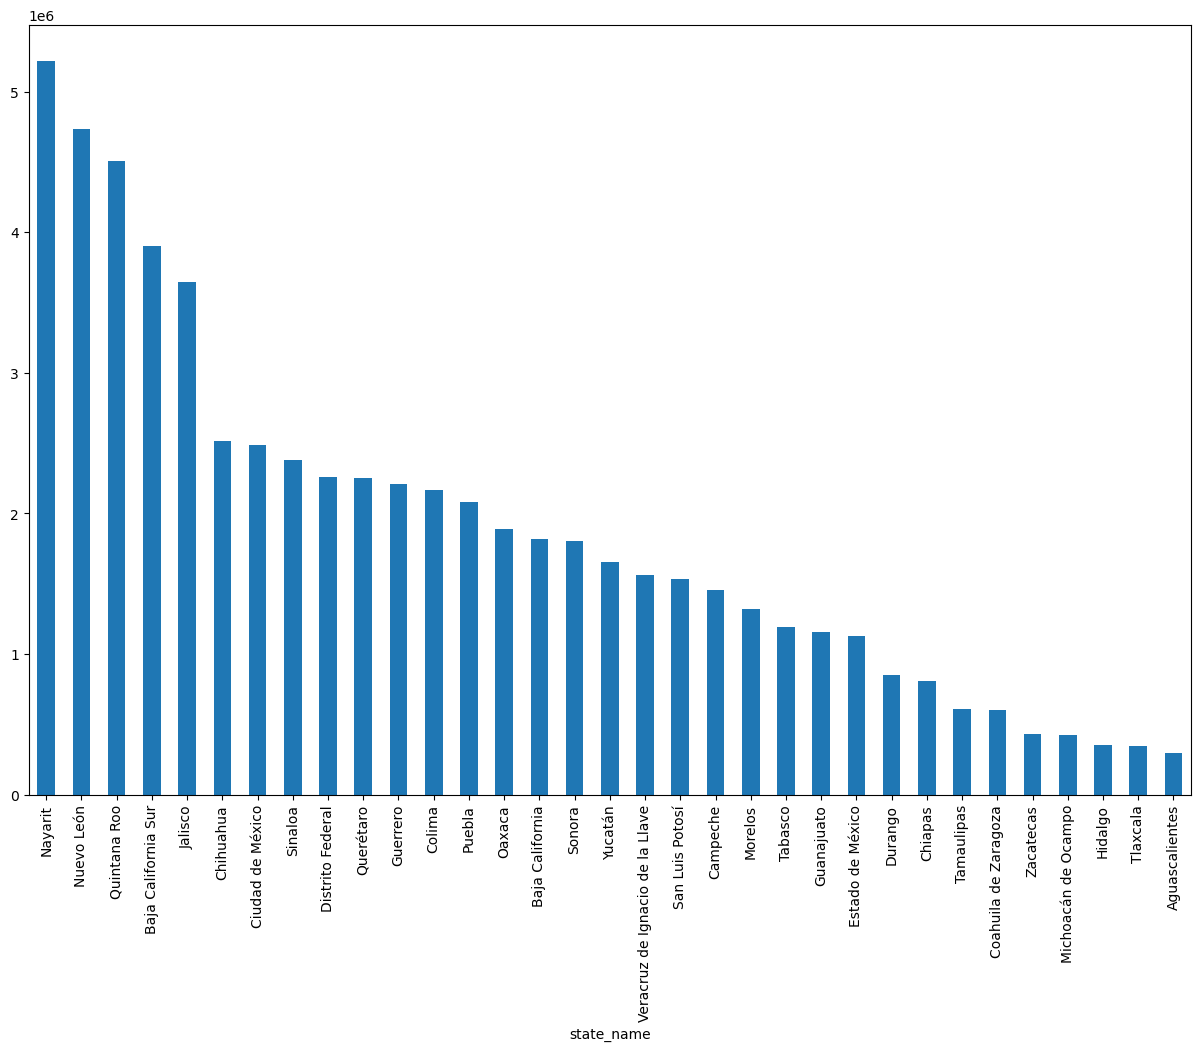

In [172]:
median_price_per_state.plot.bar(figsize=(15,10))

In [173]:
tab=pd.DataFrame({'Average Price':mean_house_rent_per_state,'Median Price':median_price_per_state})
tab.sort_values(by='Median Price',inplace=True,ascending=False)

<AxesSubplot:xlabel='state_name'>

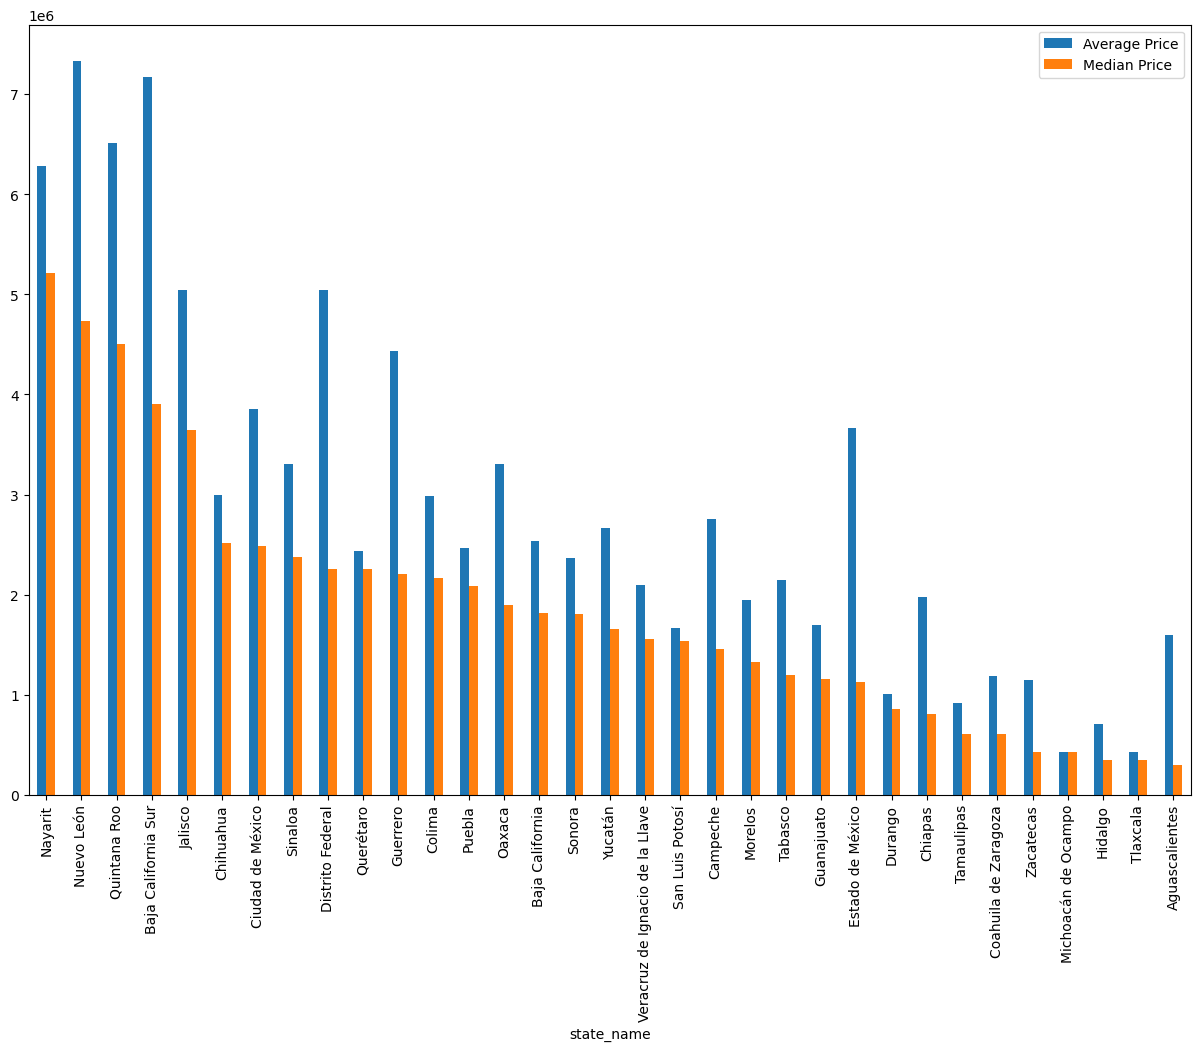

In [174]:
tab.plot.bar(figsize=(15,10))

In [175]:
print('the top  5 states where apartment  are most expensive' ,tab.index[:5])

the top  5 states where apartment  are most expensive Index(['Nayarit', 'Nuevo León', 'Quintana Roo', 'Baja California Sur',
       'Jalisco'],
      dtype='object', name='state_name')


In [176]:
print('the bottom  5 states where house rent  are least  expensive' ,tab.index[-5:])

the bottom  5 states where house rent  are least  expensive Index(['Zacatecas', 'Michoacán de Ocampo', 'Hidalgo', 'Tlaxcala',
       'Aguascalientes'],
      dtype='object', name='state_name')


The top  5 states where apartments  are most expensive are:
    
Nayarit
    
Nuevo León
    
Quintana Roo
    
Baja California Sur
    
Jalisco

The bottom  5 states where apartments are least expensive are:
    
Aguascalientes
    
Tlaxcala
    
Hidalgo
    
Zacatecas

Michoacán de Ocampo

###  Price of Renting  Apartments

In [177]:
df=data.price_aprox_local_currency[(data.property_type=='apartment') & (data.operation=='rent')]
df.describe()

count    1.455670e+05
mean     1.933463e+04
std      3.637640e+04
min      8.848600e+02
25%      7.112640e+03
50%      1.300646e+04
75%      2.284182e+04
max      1.890000e+06
Name: price_aprox_local_currency, dtype: float64

<AxesSubplot:ylabel='Frequency'>

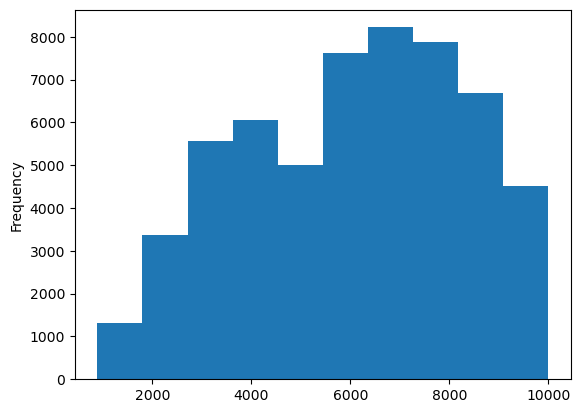

In [178]:
df_=data.price_aprox_local_currency[(data.property_type=='apartment') & (data.operation=='rent')]
#df=data.price_aprox_usd
df2=df_[data.price_aprox_local_currency<10000]

df2.plot.hist()

<AxesSubplot:ylabel='Frequency'>

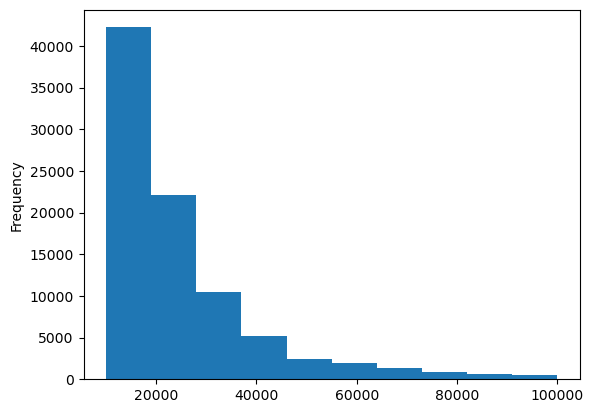

In [179]:
df_=data.price_aprox_local_currency[(data.property_type=='apartment') & (data.operation=='rent')]
df2=df_[(data.price_aprox_local_currency>10000) & (data.price_aprox_local_currency<100000)]
df2.plot.hist()

<AxesSubplot:ylabel='Frequency'>

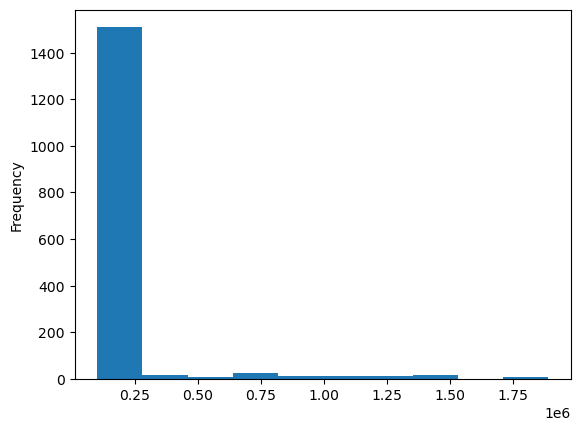

In [180]:
df_=data.price_aprox_local_currency[(data.property_type=='apartment') & (data.operation=='rent')]

#df=data.price_aprox_usd

df2=df_[(data.price_aprox_local_currency>100000)]
df2.plot.hist()

In [181]:
print('average apartment rent in Mexico :',round(df.mean()))

average apartment rent in Mexico : 19335


In [182]:
print('modal  apartment rent in Mexico :',round(df.mode()[0]))

modal  apartment rent in Mexico : 10005


In [183]:
print('median apartment rent in Mexico :',round(df.median()))

median apartment rent in Mexico : 13006


In [184]:
print('Least apartment rent in Mexico :',round(df.min()))

Least apartment rent in Mexico : 885


In [185]:
print('Most expensive apartment rent in Mexico :',round(df.max()))

Most expensive apartment rent in Mexico : 1890000


In [186]:
print('The price of the top 5% most expensive apartment rent in Mexico :',round(df.quantile(0.95)))

The price of the top 5% most expensive apartment rent in Mexico : 54033


In [187]:
print('The price of the top 2% most expensive apartment rent  in Mexico :',round(df.quantile(0.98)))

The price of the top 2% most expensive apartment rent  in Mexico : 80298


In [188]:
print('The price of the top 1% most expensive apartment rent in Mexico :',round(df.quantile(0.99)))

The price of the top 1% most expensive apartment rent in Mexico : 106184


The price of the apartments rent in Mexico is strongly skewed right. The majority of the apartments have low rent, they are on the left side of the distribution while we have few apartments with extremely high rent on the right side of the distribution.

The average price of the apartment rent is MXN 23,266

The least price of the apartment rent is MXN 885

The most expensive apartment rent  is MXN 1,890,000

The median price of the apartment rent is MXN 15,088, the median price is lower than the average price because the average price is pushed up by the extremely expensive few houses

75% of the apartments  rent less than MXN 26,013

95% of the apartments rent cost less than MXN 69,351

Just 2% of the apartments rent  more than MXN 99,803

### Cost of Apartments  Rent per states

In [189]:
df=data[(data.property_type=='apartment') & (data.operation=='rent')]
df

created_on operation property_type                        place_name  \
8       2014-11-20      rent     apartment                      Quintana Roo   
10      2015-02-26      rent     apartment                      Quintana Roo   
20      2015-01-05      rent     apartment                            Puebla   
24      2015-01-05      rent     apartment                            Centro   
28      2015-02-26      rent     apartment                           Durango   
...            ...       ...           ...                               ...   
877217  2017-08-26      rent     apartment        Zona San Agustín Campestre   
877218  2017-06-08      rent     apartment      Antigua Hacienda San Agustin   
877219  2017-07-04      rent     apartment      Antigua Hacienda San Agustin   
877220  2017-10-02      rent     apartment  Valle de San Ángel Sect Mexicano   
877221  2017-10-21      rent     apartment        Residencial Lago Esmeralda   

              state_name        lat         lon    price currency  \
8           Quintana Roo  18.509356  -88.314668   4150.0      MXN   
10          Quintana Roo  21.152753  -86.849743   9500.0      MXN   
20                Puebla  19.051640  -98.231447   9000.0      MXN   
24               Tabasco  18.002065  -92.955920  35000.0      MXN   
28               Durango  24.060737 -104.631096   5000.0      MXN   
...                  ...        ...         ...      ...      ...   
877217        Nuevo León  25.624144 -100.337852  60280.0      MXN   
877218        Nuevo León  25.641927 -100.330614  28500.0      MXN   
877219        Nuevo León  25.627283 -100.337861  28500.0      MXN   
877220        Nuevo León  25.619614 -100.373650  19500.0      MXN   
877221  Estado de México  19.524517  -99.268166  15000.0      MXN   

        price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
8                          4761.45           269.05                 40.0   
10                        10500.86           593.36                 95.0   
20                         9499.55           536.78                  NaN   
24                        33192.52          1875.57                  NaN   
28                         5819.75           328.85                 90.0   
...                            ...              ...                  ...   
877217                    59865.91          3144.02                160.0   
877218                    28304.17          1486.47                144.0   
877219                    28304.17          1486.47                144.0   
877220                    19366.04          1017.06                 95.0   
877221                    14896.88           782.35                124.0   

        price_usd_per_m2  price_per_m2  
8               6.726250    103.750000  
10              6.245895    100.000000  
20                   NaN           NaN  
24                   NaN           NaN  
28              3.653889     55.555556  
...                  ...           ...  
877217         19.650125    376.750000  
877218         10.322708    197.916667  
877219         10.322708    197.916667  
877220         10.705895    205.263158  
877221          6.309274    120.967742  

[145567 rows x 14 columns]

In [190]:
mean_house_rent_per_state = df.groupby("state_name")["price_aprox_local_currency"].mean().sort_values(ascending = False)
mean_house_rent_per_state

state_name
Distrito Federal                   41019.700140
Estado de México                   25961.851151
Nuevo León                         24087.583158
Nayarit                            23578.317550
Jalisco                            22960.232127
Quintana Roo                       21991.275126
Baja California                    19877.782833
Sinaloa                            16570.983459
Chihuahua                          16200.249541
Puebla                             15377.440545
Querétaro                          15143.525199
Aguascalientes                     14848.454796
San Luis Potosí                    13495.170233
Guanajuato                         12349.473333
Guerrero                           12341.081780
Yucatán                            12132.119724
Oaxaca                             11473.011924
Ciudad de México                   10985.549605
Colima                             10815.669689
Baja California Sur                10731.402611
Coahuila de Zaragoza         

<AxesSubplot:xlabel='state_name'>

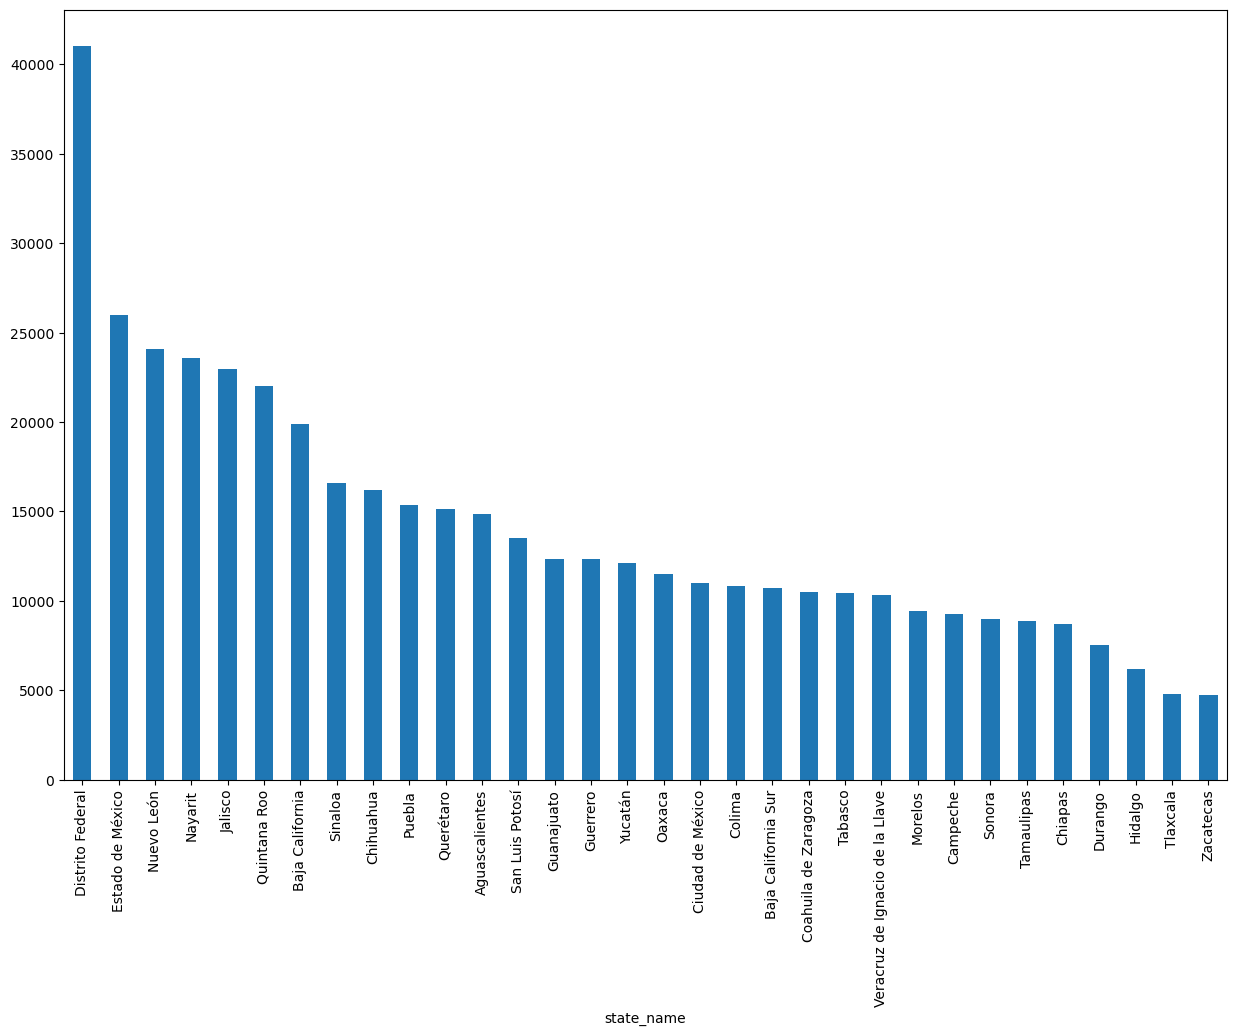

In [191]:
mean_house_rent_per_state.plot.bar(figsize=(15,10))

In [192]:
median_price_per_state = df.groupby("state_name")["price_aprox_local_currency"].median().sort_values(ascending = False)
median_price_per_state 

state_name
Distrito Federal                   27465.090
Estado de México                   21010.600
Jalisco                            20635.690
Nuevo León                         20122.830
Quintana Roo                       15435.495
Baja California                    14757.220
Aguascalientes                     14102.510
Querétaro                          14007.000
Puebla                             13903.690
Ciudad de México                   13120.740
Chihuahua                          13006.460
San Luis Potosí                    12737.530
Nayarit                            12073.550
Sinaloa                            11917.510
Guanajuato                          9745.520
Yucatán                             8103.950
Baja California Sur                 8083.715
Veracruz de Ignacio de la Llave     8003.950
Tabasco                             7980.300
Morelos                             7942.400
Oaxaca                              7845.640
Coahuila de Zaragoza                7835.205

<AxesSubplot:xlabel='state_name'>

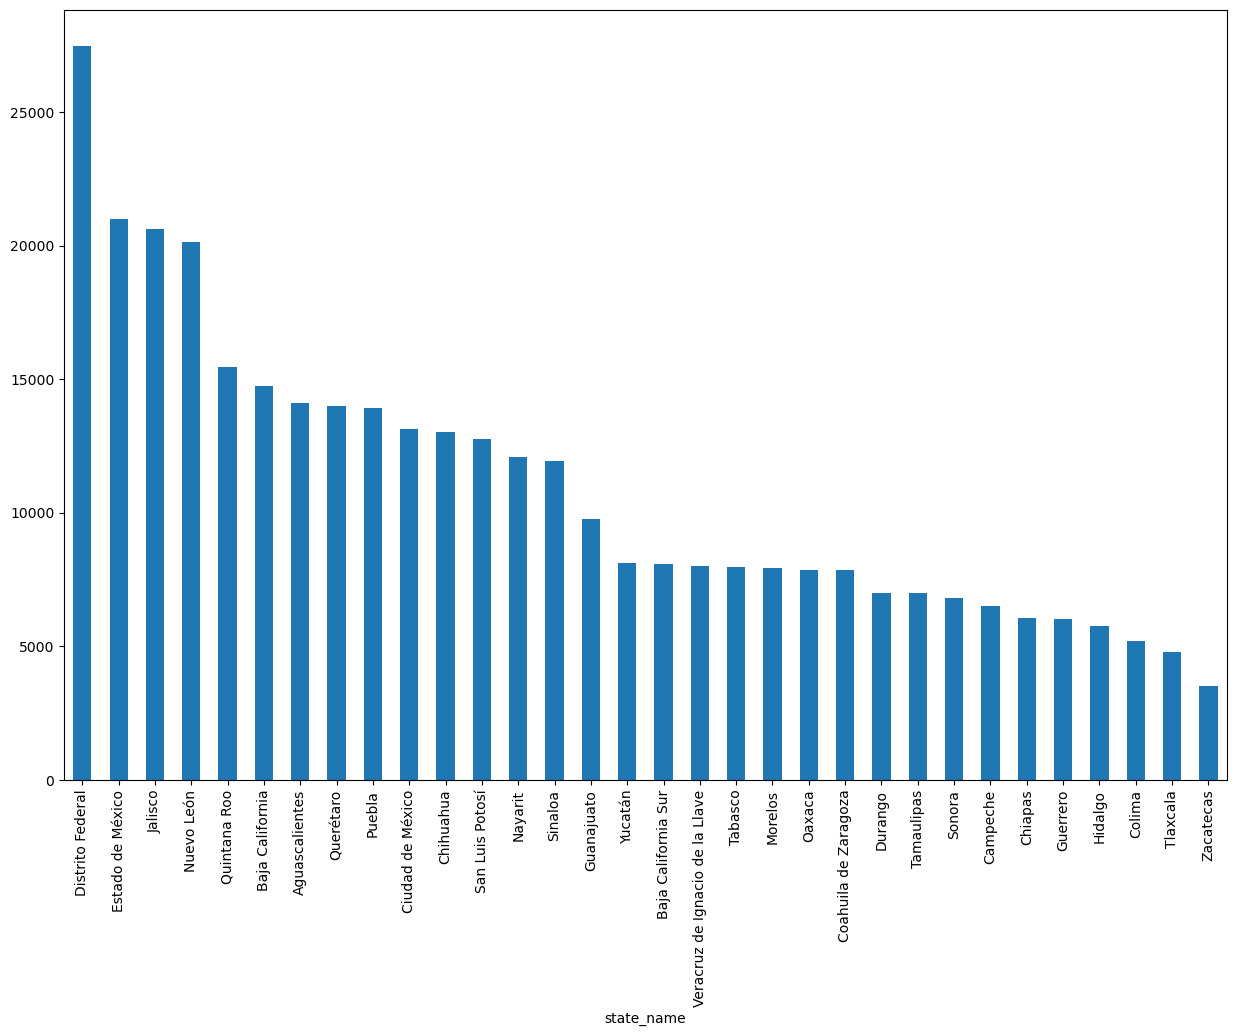

In [193]:
median_price_per_state.plot.bar(figsize=(15,10))

<AxesSubplot:xlabel='state_name'>

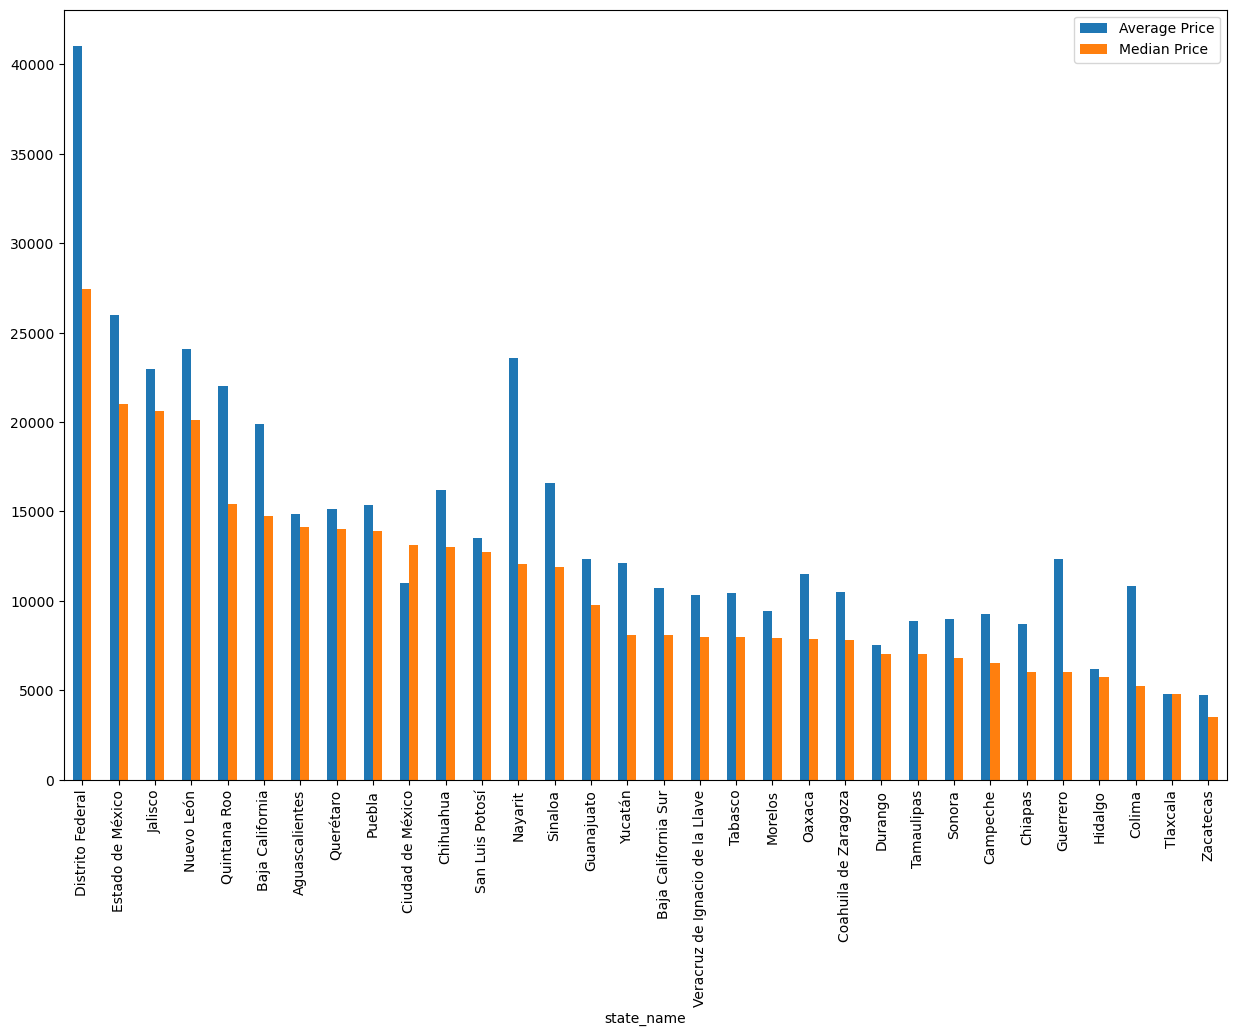

In [194]:
tab=pd.DataFrame({'Average Price':mean_house_rent_per_state,'Median Price':median_price_per_state})
tab.sort_values(by='Median Price',inplace=True,ascending=False)
tab.plot.bar(figsize=(15,10))

In [195]:
print('the top  5 states where apartment  are most expensive' ,tab.index[:5])

the top  5 states where apartment  are most expensive Index(['Distrito Federal', 'Estado de México', 'Jalisco', 'Nuevo León',
       'Quintana Roo'],
      dtype='object', name='state_name')


In [196]:
print('the bottom  5 states where house rent  are least  expensive' ,tab.index[-5:])

the bottom  5 states where house rent  are least  expensive Index(['Guerrero', 'Hidalgo', 'Colima', 'Tlaxcala', 'Zacatecas'], dtype='object', name='state_name')


The top  5 states where apartment rent  are most expensive are:
    
Baja California
    
Distrito Federal

Estado de México
    
Nuevo León

Jalisco

The bottom  5 states where house rent  are least expensive are:
    
Colima
    
Tlaxcala
    
Hidalgo
    
Zacatecas

Guerrero

For the individual who want to rent apartment, the median rent is better to make decision than the average rent of the apartment becuase:
    
Average price of the apartment rent  is pushed by the extremely expensive apartment that have very high price
  
The median rent  indicates the price of  the first half of the apartments listed in each state, and rent of the 75% of the apartment listed  in each state is closer to the median rent than the average rent
  


## Price of  Stores in Mexico

In [197]:
df=data.price_aprox_local_currency[(data.property_type=='store') & (data.operation=='sell')]
df.describe()

count    4.351300e+04
mean     5.984274e+06
std      1.599723e+07
min      8.971823e+04
25%      1.200000e+06
50%      2.361220e+06
75%      5.220084e+06
max      9.434744e+08
Name: price_aprox_local_currency, dtype: float64

<AxesSubplot:ylabel='Frequency'>

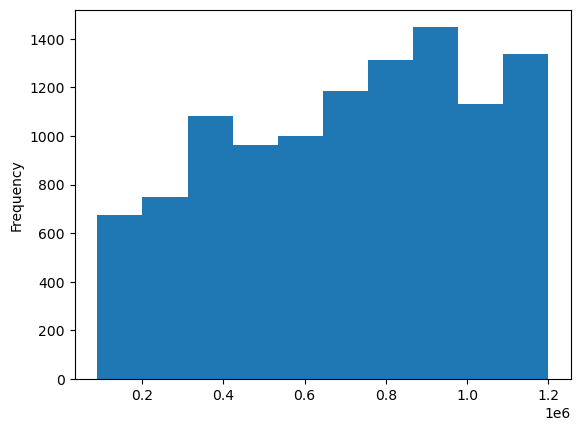

In [198]:
df_=data.price_aprox_local_currency[(data.property_type=='store') & (data.operation=='sell')]
#df=data.price_aprox_usd
df2=df_[data.price_aprox_local_currency<1200000]

df2.plot.hist()

<AxesSubplot:ylabel='Frequency'>

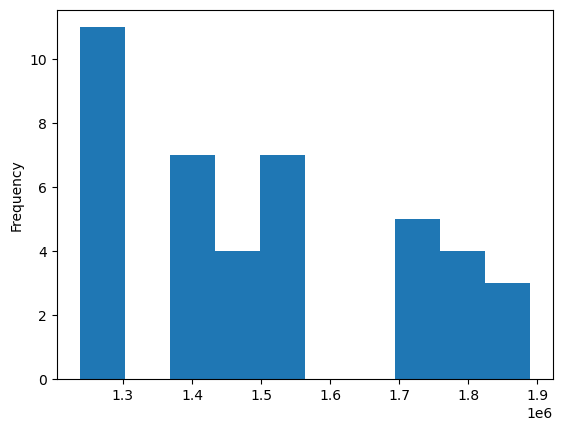

In [199]:
df_=data.price_aprox_local_currency[(data.property_type=='apartment') & (data.operation=='rent')]
df2=df_[(data.price_aprox_local_currency>1200000) & (data.price_aprox_local_currency<7300000)]
df2.plot.hist()

<AxesSubplot:ylabel='Frequency'>

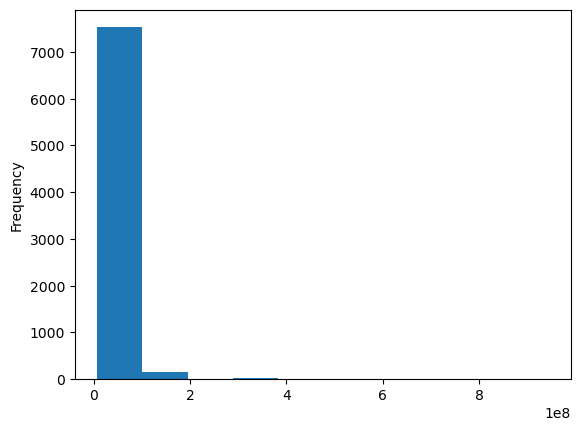

In [200]:
df_=data.price_aprox_local_currency[(data.property_type=='store') & (data.operation=='sell')]
#df=data.price_aprox_usd
df2=df_[data.price_aprox_local_currency>7300000]

df2.plot.hist()

In [201]:
print('Average price of store in Mexico :',round(df.mean()))
print('Modal price of store rent in Mexico :',round(df.mode()[0]))
print('Median price of store t in Mexico :',round(df.median()))
print('Least price of store in Mexico :',round(df.min()))
print('Most expensive store in Mexico :',round(df.max()))
print('The price of the top 5% most expensive store in Mexico :',round(df.quantile(0.95)))
print('The price of the top 2% most expensive store  in Mexico :',round(df.quantile(0.98)))
print('The price of the top 1% most expensive store in Mexico :',round(df.quantile(0.99)))

Average price of store in Mexico : 5984274
Modal price of store rent in Mexico : 1500765
Median price of store t in Mexico : 2361220
Least price of store in Mexico : 89718
Most expensive store in Mexico : 943474383
The price of the top 5% most expensive store in Mexico : 21115625
The price of the top 2% most expensive store  in Mexico : 41020907
The price of the top 1% most expensive store in Mexico : 57947439


The price of the stores sold in Mexico is strongly skewed right. The majority of the stores have low price, they are on the left side of the distribution while we have few apartments with extremely high price on the right side of the distribution.

The average price of the stores sold is MXN 6,223,669

The least price of the stores sold is MXN 94,500

The most expensive stores sold is MXN 943,474,383

The median price of the stores sold is MXN 2,399,503, the median price is lower than the average price because the average price is pushed up by the extremely expensive few houses

75% of the stores sold cost less than MXN 5,345,751

95% of the stores sold cost less than MXN 22,888,163

Just 2% of the stores  sold cost more than MXN 45,022,947

### Price  of stores per states

In [202]:
df=data[(data.property_type=='store') & (data.operation=='sell')]
df.head(5)

created_on operation property_type        place_name  \
130009  2015-02-03      sell         store            Centro   
133165  2015-03-28      sell         store        Hermosillo   
133276  2015-01-05      sell         store       Corregidora   
133354  2015-01-05      sell         store  Tuxtla Gutiérrez   
133402  2015-01-05      sell         store      Huixquilucan   

              state_name        lat         lon       price currency  \
130009           Tabasco  17.984374  -92.933203  10000000.0      MXN   
133165            Sonora  29.098160 -110.965569   2500000.0      MXN   
133276         Querétaro  20.549338 -100.439698   1088000.0      MXN   
133354           Chiapas  16.755679  -93.119141   5950000.0      MXN   
133402  Estado de México  19.386148  -99.277297   3000000.0      MXN   

        price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
130009                  9483626.11        535879.83                395.0   
133165                  2810665.54        158818.89                230.0   
133276                  1148393.90         64890.91                 75.0   
133354                  5599071.24        316379.97                648.0   
133402                  3166527.45        178927.15                288.0   

        price_usd_per_m2  price_per_m2  
130009       1356.657797  25316.455696  
133165        690.516913  10869.565217  
133276        865.212133  14506.666667  
133354        488.240694   9182.098765  
133402        621.274826  10416.666667

In [203]:
mean_store_price_per_state = df.groupby("state_name")["price_aprox_local_currency"].mean().sort_values(ascending = False)
mean_store_price_per_state

state_name
Quintana Roo                       1.105016e+07
Estado de México                   1.069097e+07
Baja California                    1.034576e+07
Distrito Federal                   9.255951e+06
Tabasco                            7.655311e+06
Zacatecas                          7.278579e+06
Tlaxcala                           6.984263e+06
Baja California Sur                6.832079e+06
Nuevo León                         6.584280e+06
Hidalgo                            5.565289e+06
Puebla                             5.528347e+06
Morelos                            5.486350e+06
Nayarit                            5.353701e+06
Campeche                           5.275905e+06
Jalisco                            5.252112e+06
Guerrero                           4.823710e+06
Tamaulipas                         4.780042e+06
Querétaro                          4.755974e+06
Oaxaca                             4.538008e+06
Yucatán                            4.504228e+06
Chiapas                      

<AxesSubplot:xlabel='state_name'>

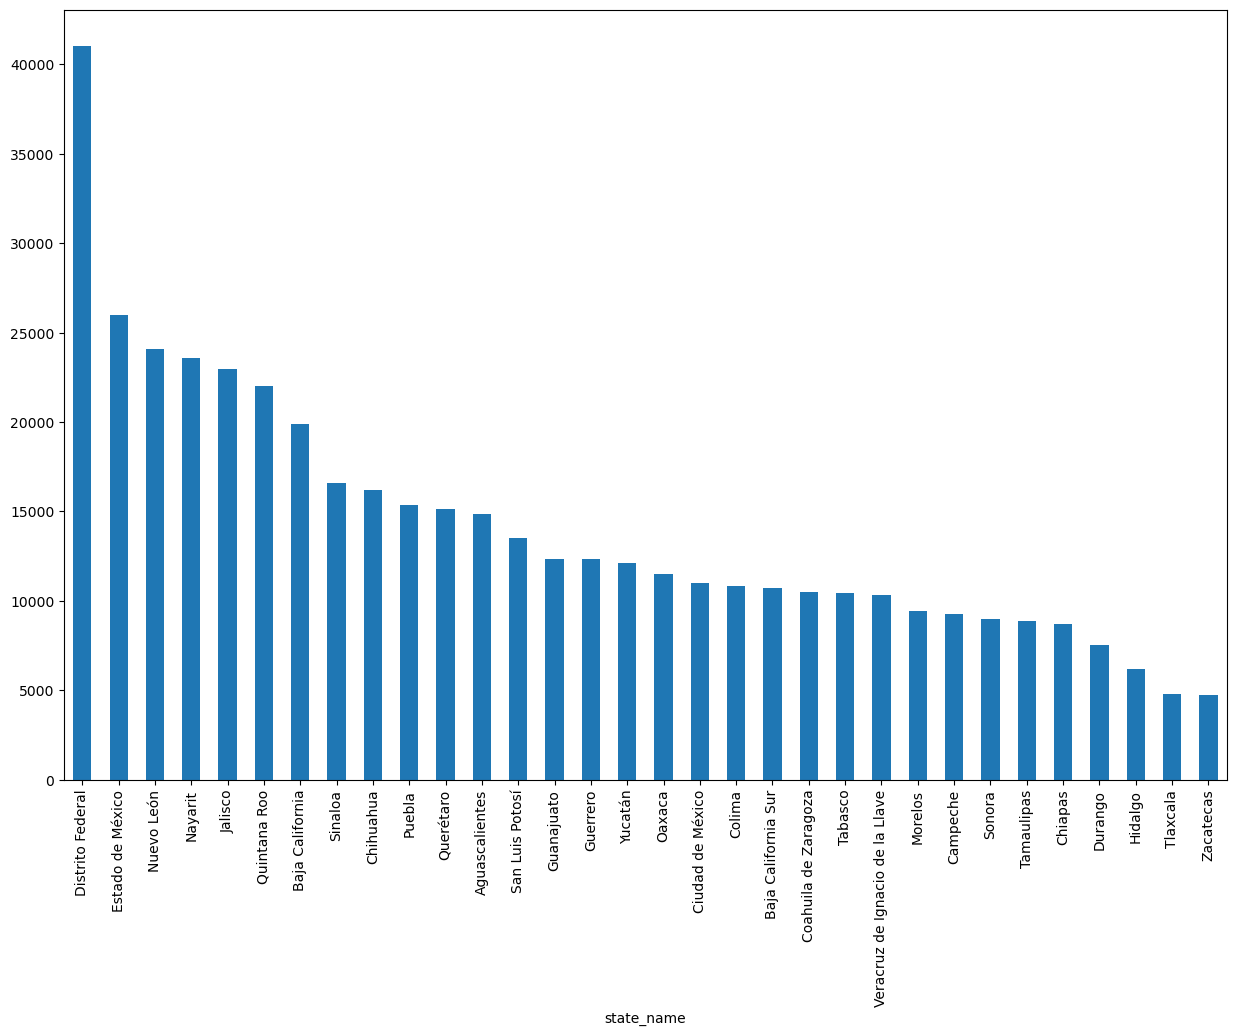

In [204]:
mean_house_rent_per_state.plot.bar(figsize=(15,10))

In [205]:
median_store_price_per_state = df.groupby("state_name")["price_aprox_local_currency"].median().sort_values(ascending = False)
median_store_price_per_state

state_name
Tabasco                            4494495.180
Distrito Federal                   3790126.680
Tlaxcala                           3711673.900
Nuevo León                         3421743.930
Estado de México                   3294080.150
Chiapas                            2696697.070
Baja California Sur                2601287.330
Puebla                             2595174.890
Ciudad de México                   2521640.340
Quintana Roo                       2499999.870
Morelos                            2353192.420
Jalisco                            2351512.640
Baja California                    2222700.000
Yucatán                            2201121.830
Veracruz de Ignacio de la Llave    2129581.615
Oaxaca                             1973185.060
Chihuahua                          1914038.680
Nayarit                            1898079.870
San Luis Potosí                    1894862.780
Querétaro                          1826254.495
Sinaloa                            1617282.170
Ta

<AxesSubplot:xlabel='state_name'>

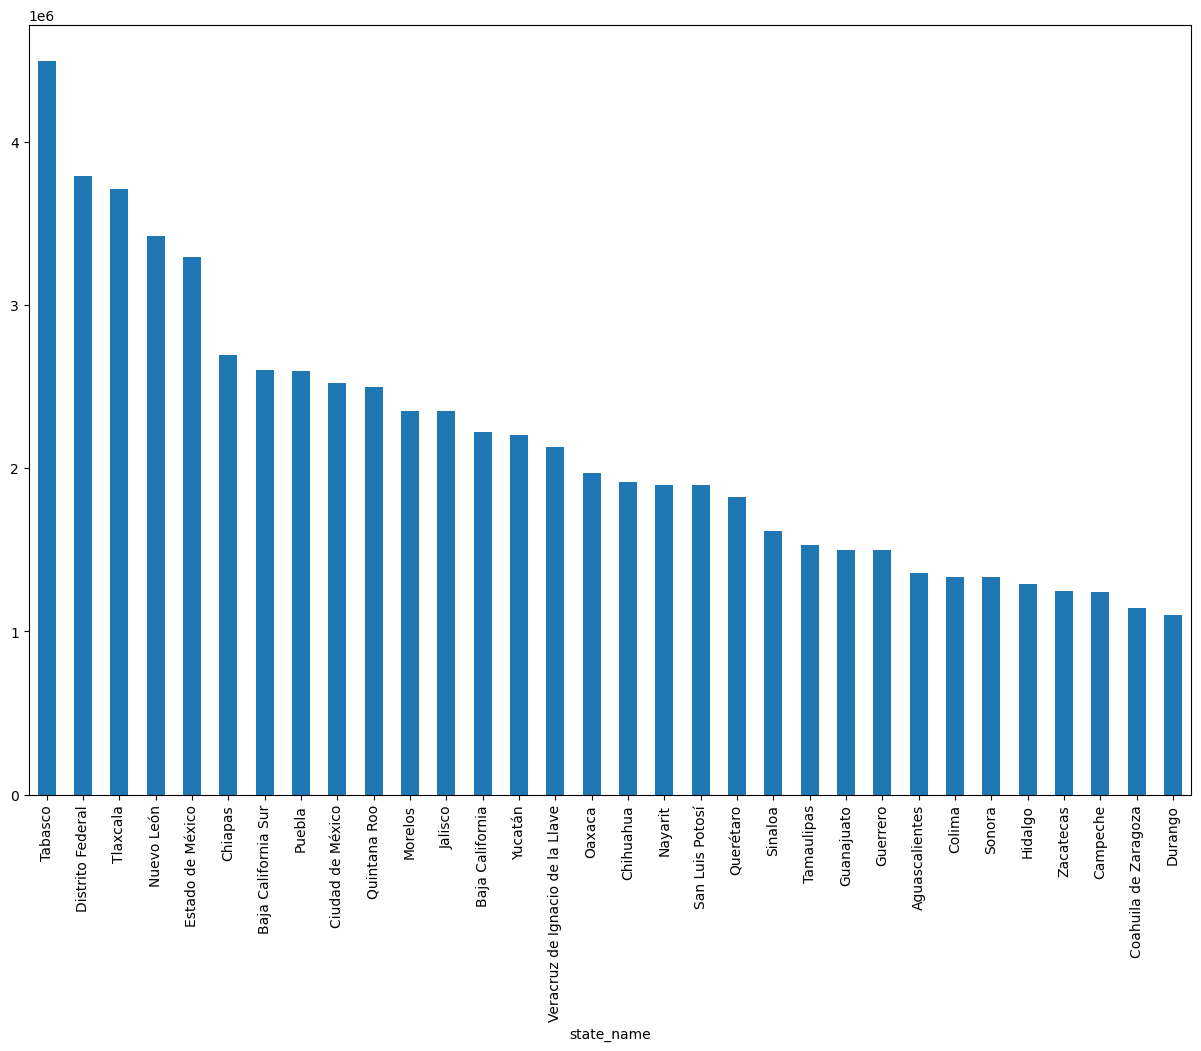

In [206]:
median_store_price_per_state.plot.bar(figsize=(15,10))

<AxesSubplot:xlabel='state_name'>

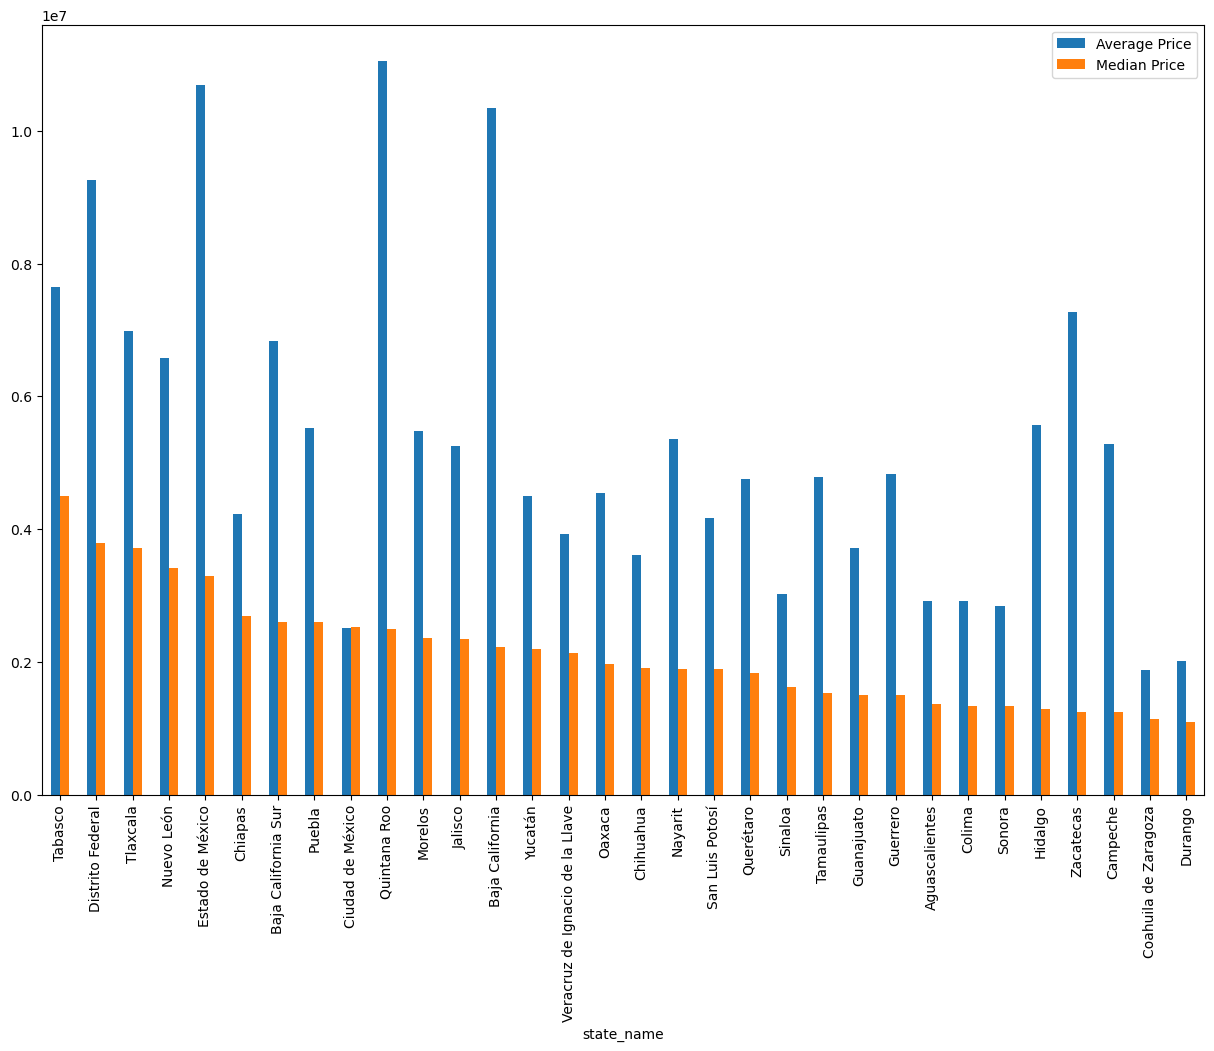

In [207]:
tab=pd.DataFrame({'Average Price':mean_store_price_per_state,'Median Price':median_store_price_per_state})
tab.sort_values(by='Median Price',inplace=True,ascending=False)
tab.plot.bar(figsize=(15,10))

In [208]:
print('the top  5 states where stores  are most expensive' ,tab.index[:5])

the top  5 states where stores  are most expensive Index(['Tabasco', 'Distrito Federal', 'Tlaxcala', 'Nuevo León',
       'Estado de México'],
      dtype='object', name='state_name')


In [209]:
print('the bottom  5 states where stores  are least  expensive' ,tab.index[-5:])

the bottom  5 states where stores  are least  expensive Index(['Hidalgo', 'Zacatecas', 'Campeche', 'Coahuila de Zaragoza', 'Durango'], dtype='object', name='state_name')


The top  5 states where apartment rent  are most expensive are:
    
Distrito Federal
    
Tabasco

Baja California
    
Tlaxcala

Nuevo León

The bottom  5 states where house rent  are least expensive are:
    
Campeche
    
Sonora
    
Durango
    
Colima

Coahuila de Zaragoza

### Price of  Stores Rent  in Mexico

In [210]:
df=data.price_aprox_local_currency[(data.property_type=='store') & (data.operation=='rent')]
df.describe()

count    9.924000e+04
mean     3.174378e+04
std      6.620486e+04
min      8.847600e+02
25%      7.921880e+03
50%      1.508787e+04
75%      3.110249e+04
max      1.805050e+06
Name: price_aprox_local_currency, dtype: float64

<AxesSubplot:ylabel='Frequency'>

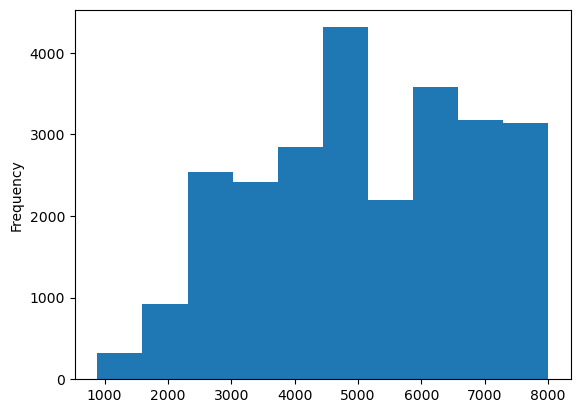

In [211]:
df_=data.price_aprox_local_currency[(data.property_type=='store') & (data.operation=='rent')]
#df=data.price_aprox_usd
df2=df_[data.price_aprox_local_currency<8000]

df2.plot.hist()

<AxesSubplot:ylabel='Frequency'>

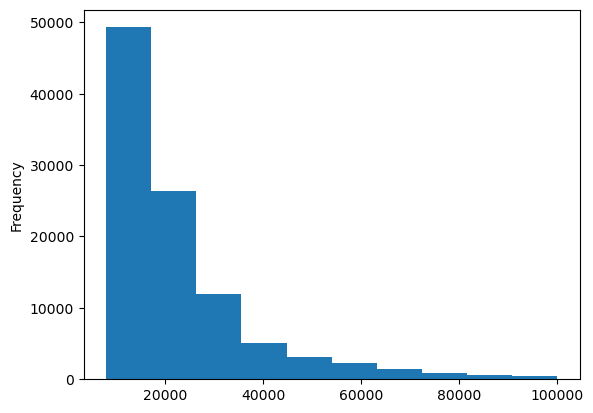

In [212]:
df_=data.price_aprox_local_currency[(data.property_type=='apartment') & (data.operation=='rent')]
df2=df_[(data.price_aprox_local_currency>8000) & (data.price_aprox_local_currency<100000)]
df2.plot.hist()

<AxesSubplot:ylabel='Frequency'>

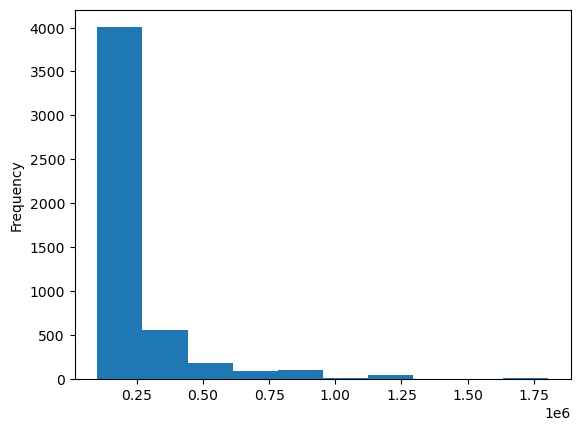

In [213]:
df_=data.price_aprox_local_currency[(data.property_type=='store') & (data.operation=='rent')]
#df=data.price_aprox_usd
df2=df_[data.price_aprox_local_currency>100000]

df2.plot.hist()

In [214]:
print('Average cost of store rent  in Mexico :',round(df.mean()))
print('Modal cost of store rent in Mexico :',round(df.mode()[0]))
print('Median cost of store rent in Mexico :',round(df.median()))
print('Least cost of store rent in Mexico :',round(df.min()))
print('Most expensive store rent  in Mexico :',round(df.max()))
print('The price of the top 5% most expensive store rent in Mexico :',round(df.quantile(0.95)))
print('The price of the top 2% most expensive store rent  in Mexico :',round(df.quantile(0.98)))
print('The price of the top 1% most expensive store in  rent Mexico :',round(df.quantile(0.99)))

Average cost of store rent  in Mexico : 31744
Modal cost of store rent in Mexico : 15008
Median cost of store rent in Mexico : 15088
Least cost of store rent in Mexico : 885
Most expensive store rent  in Mexico : 1805050
The price of the top 5% most expensive store rent in Mexico : 100051
The price of the top 2% most expensive store rent  in Mexico : 188696
The price of the top 1% most expensive store in  rent Mexico : 271642


The price of the stores rent in Mexico is strongly skewed right. The majority of the stores have low prent, they are on the left side of the distribution while we have few apartments with extremely high rent on the right side of the distribution.

The average price of the stores rent is MXN 33,747

The least price of the stores rent is MXN 885

The most expensive stores rent  is MXN 1,805,050

The median price of the stores srent  is MXN 15,699, the median rent is lower than the average prent because the average price is pushed up by the extremely expensive few houses

75% of the stores rent cost less than MXN 33,193

95% of the stores rent cost less than MXN 111,445

Just 2% of the stores  rent cost more than MXN 200,102

### Price  of store  rent per state

In [215]:
df=data[(data.property_type=='store') & (data.operation=='rent')]
df.head(5)

created_on operation property_type    place_name    state_name        lat  \
2   2015-01-05      rent         store       Morelos       Morelos  18.823515   
3   2015-01-05      rent         store       Tabasco       Tabasco  17.994583   
9   2014-11-20      rent         store  Quintana Roo  Quintana Roo  18.509356   
12  2015-02-24      rent         store        Colima        Colima  19.248841   
13  2015-02-28      rent         store         Lerdo       Durango  25.553747   

           lon   price currency  price_aprox_local_currency  price_aprox_usd  \
2   -98.949789  5000.0      MXN                     5652.51           319.40   
3   -93.386271  8000.0      MXN                     7586.83           428.70   
9   -88.314668  4000.0      MXN                     4589.44           259.33   
12 -103.726948  2500.0      MXN                     2604.33           147.16   
13 -103.512124  7800.0      MXN                     7014.32           396.35   

    surface_total_in_m2  price_usd_per_m2  price_per_m2  
2                 180.0          1.774444     27.777778  
3                 528.0          0.811932     15.151515  
9                  12.0         21.610833    333.333333  
12                 35.0          4.204571     71.428571  
13                 85.0          4.662941     91.764706

In [216]:
mean_store_rent_per_state = df.groupby("state_name")["price_aprox_local_currency"].mean().sort_values(ascending = False)
mean_store_rent_per_state

state_name
Distrito Federal                   98602.724168
Nuevo León                         47031.464555
Estado de México                   42120.437724
Baja California                    40992.876874
Jalisco                            31475.142880
Quintana Roo                       28673.948021
Chihuahua                          27991.039263
Puebla                             27959.797558
Tabasco                            26950.029066
Morelos                            26297.302505
Campeche                           25555.702234
Guerrero                           24886.013620
Oaxaca                             24540.351933
Querétaro                          24042.726178
San Luis Potosí                    23763.105344
Sonora                             23261.162951
Veracruz de Ignacio de la Llave    21865.178595
Tamaulipas                         21729.624779
Aguascalientes                     20453.312790
Guanajuato                         19879.557249
Hidalgo                      

<AxesSubplot:xlabel='state_name'>

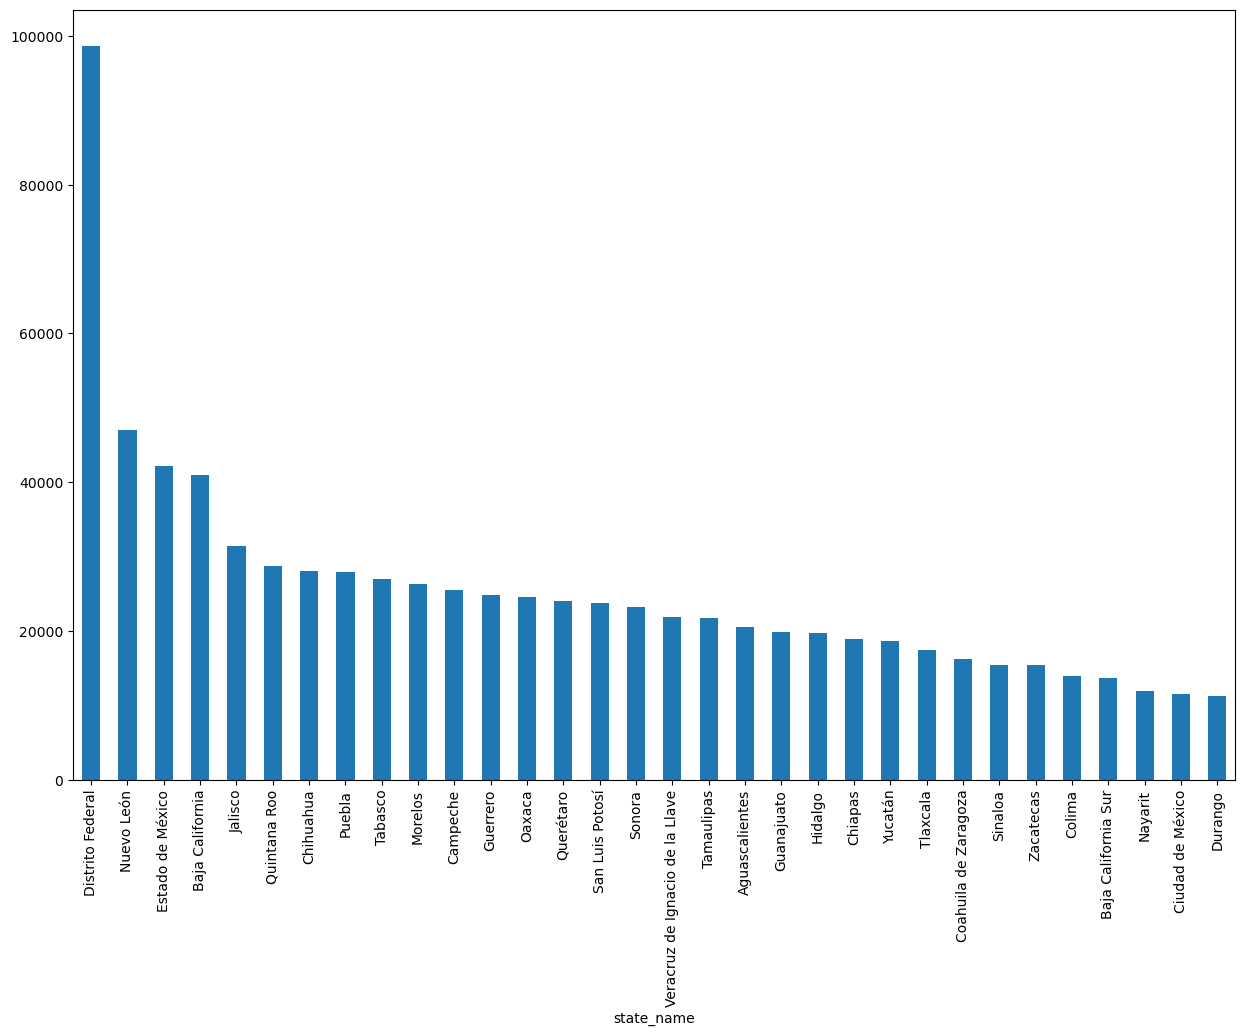

In [217]:
mean_store_rent_per_state.plot.bar(figsize=(15,10))

In [218]:
median_store_rent_per_state = df.groupby("state_name")["price_aprox_local_currency"].median().sort_values(ascending = False)
median_store_rent_per_state

state_name
Distrito Federal                   44106.570
Nuevo León                         25549.570
Baja California                    19709.335
Estado de México                   18053.655
Jalisco                            17981.680
Quintana Roo                       17008.620
Puebla                             17008.620
Chihuahua                          16808.800
Querétaro                          15055.780
Tabasco                            14963.270
Campeche                           14424.860
Morelos                            13954.000
Guerrero                           13087.150
Tlaxcala                           12758.450
San Luis Potosí                    12675.030
Veracruz de Ignacio de la Llave    11987.790
Guanajuato                         11697.930
Ciudad de México                   11575.240
Tamaulipas                         11449.430
Yucatán                            10553.060
Coahuila de Zaragoza               10533.165
Sonora                             10037.190

<AxesSubplot:xlabel='state_name'>

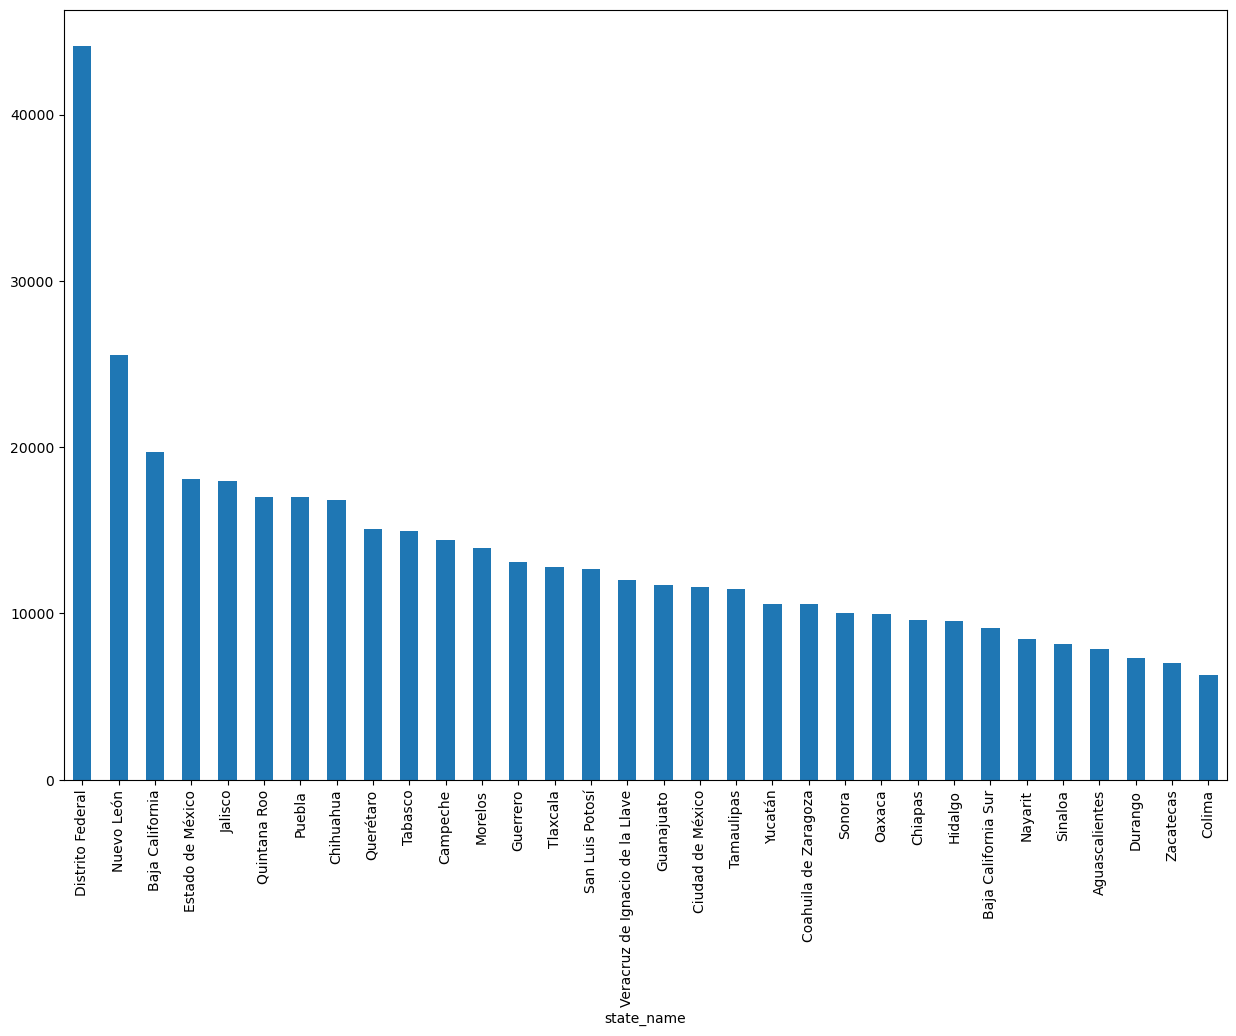

In [219]:
median_store_rent_per_state.plot.bar(figsize=(15,10))

<AxesSubplot:xlabel='state_name'>

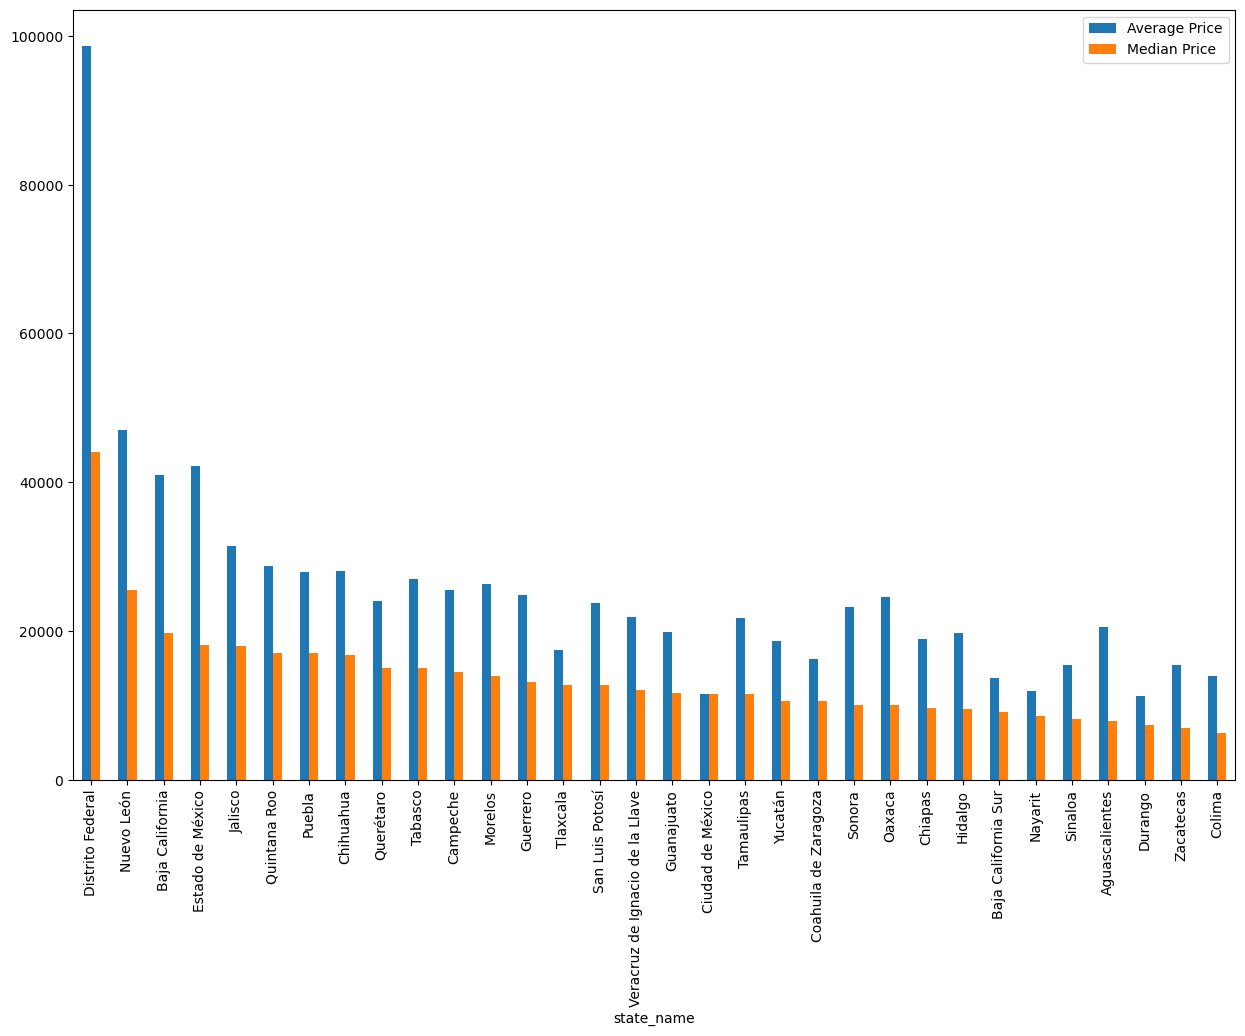

In [220]:
tab=pd.DataFrame({'Average Price':mean_store_rent_per_state,'Median Price':median_store_rent_per_state})
tab.sort_values(by='Median Price',inplace=True,ascending=False)
tab.plot.bar(figsize=(15,10))

In [221]:
print('the top  5 states where store rent  are most expensive' ,tab.index[:5])

the top  5 states where store rent  are most expensive Index(['Distrito Federal', 'Nuevo León', 'Baja California', 'Estado de México',
       'Jalisco'],
      dtype='object', name='state_name')


In [222]:
print('the bottom  5 states where store rent  are least  expensive' ,tab.index[-5:])

the bottom  5 states where store rent  are least  expensive Index(['Sinaloa', 'Aguascalientes', 'Durango', 'Zacatecas', 'Colima'], dtype='object', name='state_name')


The top  5 states where store  are most expensive  to rent  are:
    
Distrito Federal
    
Baja California

Nuevo León

Estado de México

Puebla

The bottom  5 states where store rent are least expensive are:
    
Colima
    
Durango
    
Aguascalientes
    
Sinaloa

Zacatecas

## Relationship between Price and Property Area 

###  Identify the outliers in property area and Prices of the properties 

Taking a close look at the prices and the propety area, the prices  are more operation and property type dependent than square m2 area. 

So in taking out the outliers, it has to be done on property type , operation basis and state basis otherwise, some states or property types or opeantion might be disproportinately affected.

for instance, prices that are outlier for  house sale in a small state like  Sonora might not  be an outlier price for house sale in a big  state like Estado de México   

### Property: House : Operation : Sales and Rent  

##### Taking out the outliers in  House Sale Prices 

In [223]:
data_house_sell=data[(data.property_type== 'house') & (data.operation=='sell')]
Q25= data_house_sell.price_aprox_local_currency.quantile(0.25)
Q75 = data_house_sell.price_aprox_local_currency.quantile(0.75) 
IQR = Q75 - Q25
print(IQR)
print(Q75)
print(Q25)
minus_outlier_H_S=data_house_sell[(data.price_aprox_local_currency > Q25 - 1.5*IQR) & (data.price_aprox_local_currency < Q75 + 1.5*IQR)]
minus_outlier_H_S.sort_values(by = 'price_aprox_local_currency',ascending=True ,inplace = True)

2688137.72
3842415.62
1154277.9


/var/folders/76/6w3x67rn4k15kv8p4s71fp540000gn/T/ipykernel_68776/1871531782.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minus_outlier_H_S=data_house_sell[(data.price_aprox_local_currency > Q25 - 1.5*IQR) & (data.price_aprox_local_currency < Q75 + 1.5*IQR)]
/var/folders/76/6w3x67rn4k15kv8p4s71fp540000gn/T/ipykernel_68776/1871531782.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minus_outlier_H_S.sort_values(by = 'price_aprox_local_currency',ascending=True ,inplace = True)


##### Taking out the outliers in  House Rent Prices

In [224]:
data_house_rent=data[(data.property_type== 'house') & (data.operation=='rent')]
Q25= data_house_rent.price_aprox_local_currency.quantile(0.25)
Q75 = data_house_rent.price_aprox_local_currency.quantile(0.75) 
IQR = Q75 - Q25
print(IQR)
print(Q75)
print(Q25)
minus_outlier_H_R=data_house_rent=data[(data.price_aprox_local_currency > Q25 - 1.5*IQR) & (data.price_aprox_local_currency < Q75 + 1.5*IQR)]
minus_outlier_H_R.sort_values(by = 'price_aprox_local_currency',ascending=True ,inplace = True)

14459.149999999998
22596.87
8137.72


/var/folders/76/6w3x67rn4k15kv8p4s71fp540000gn/T/ipykernel_68776/2167427764.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minus_outlier_H_R.sort_values(by = 'price_aprox_local_currency',ascending=True ,inplace = True)


In [225]:
from matplotlib import pyplot
df=minus_outlier_H_S.price_aprox_local_currency
a4_dims=(10,20)




#### Price of House Sale

<AxesSubplot:xlabel='price_aprox_local_currency', ylabel='state_name'>

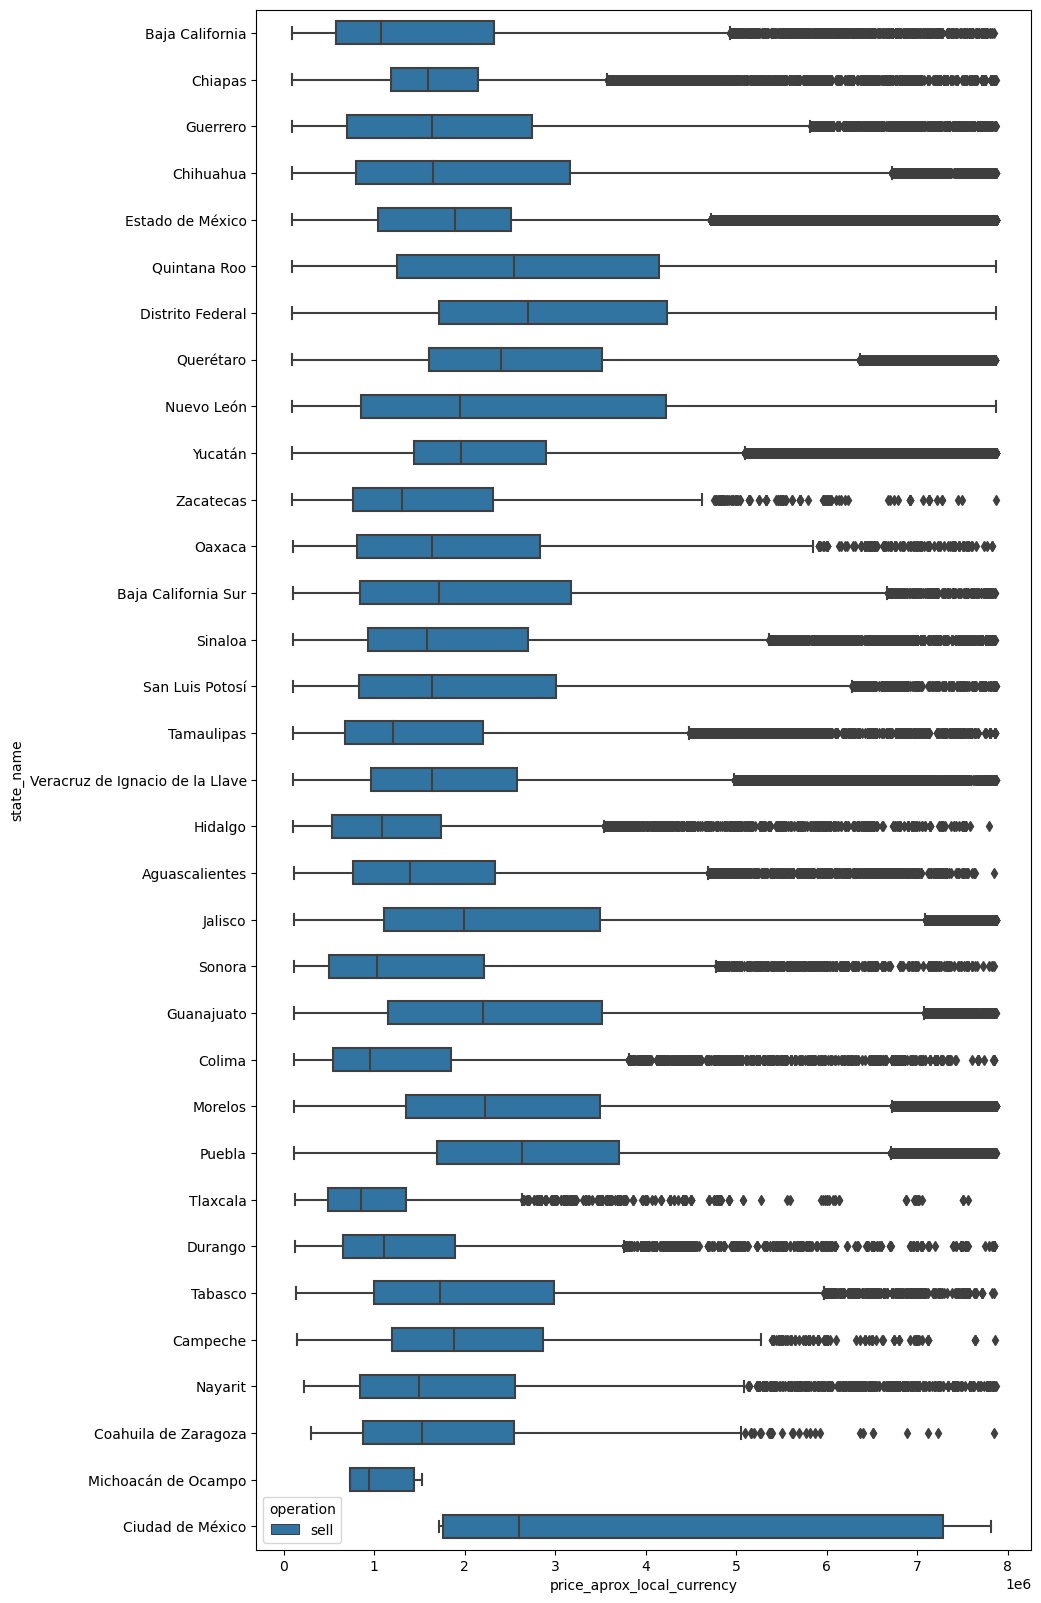

In [226]:
fig,ax=pyplot.subplots(figsize = a4_dims)
sns.boxplot(ax=ax,y='state_name', x=df, data=minus_outlier_H_S,hue ='operation',width=0.5 )

In [227]:
from matplotlib import pyplot
df=minus_outlier_H_R.price_aprox_local_currency
a4_dims=(10,20)
print(df.mean())

14721.453941212034


####  Cost of  House Rent 

<AxesSubplot:xlabel='price_aprox_local_currency', ylabel='state_name'>

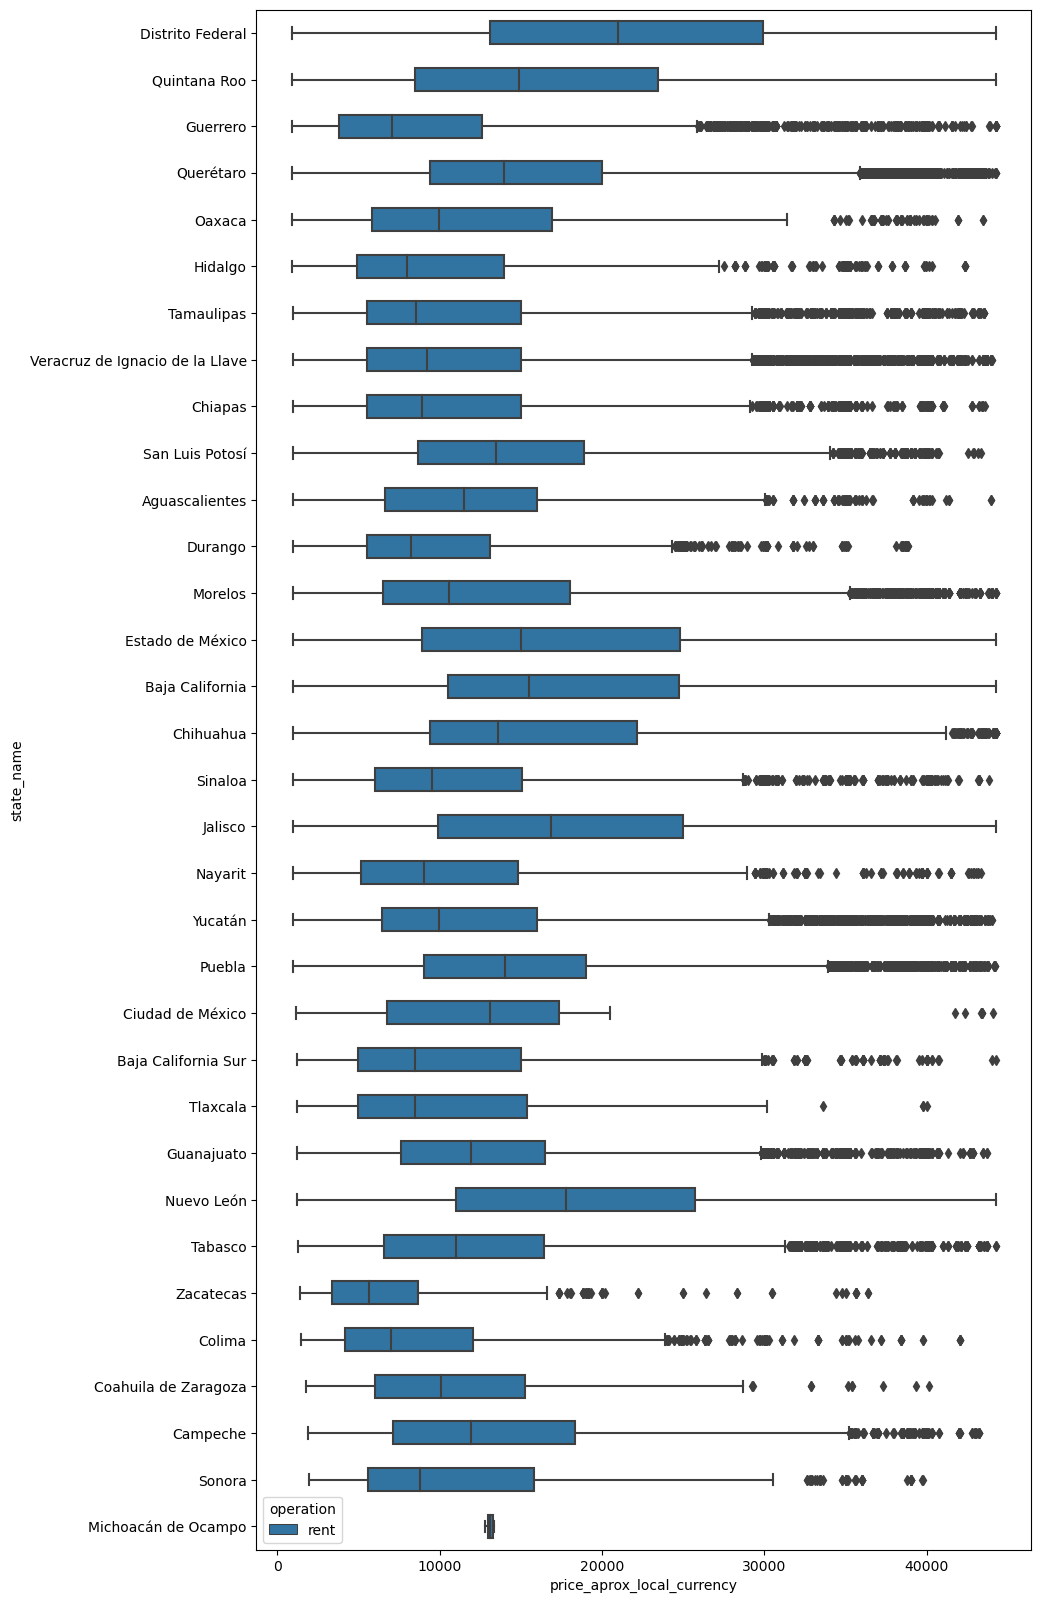

In [228]:
fig,ax=pyplot.subplots(figsize = a4_dims)

sns.boxplot(ax=ax,y='state_name', x=df, data=minus_outlier_H_R,hue ='operation',width=0.5)

### Insights for Investors

investors who are looking for houses to buy and rent it out for investment purpose should focus on the following state :

Baja California 

Neevo Leon

In these two states, the median price of purchasing houses is  lower or a little above that of every  other state where as, the median price of the rent in these  two states are almost the  highest among other states. so, if an investor can buy any of the first 50% least expensive house which are relatively cheaper that similar first 50% least expansive houses in other states, the investor  would make higher returns from rentage because the  rent of  first 50% houses in these are almost the highest across the states.

Cost of Rent is also for investors in Distrito Federal but the selling  price in Distrito Federal is not as good for investors as selling price in Baja California and Neevo Leon




### Property: Apartment : Operation : Sales and Rent

In [229]:
data_apartment_sell=data[(data.property_type== 'apartment') & (data.operation=='sell')]
Q25= data_apartment_sell.price_aprox_local_currency.quantile(0.25)
Q75 = data_apartment_sell.price_aprox_local_currency.quantile(0.75) 
IQR = Q75 - Q25
print(IQR)
print(Q75)
print(Q25)
minus_outlier_A_S=data_apartment_sell[(data.price_aprox_local_currency > Q25 - 1.5*IQR) & (data.price_aprox_local_currency < Q75 + 1.5*IQR)]
minus_outlier_A_S.sort_values(by = 'price_aprox_local_currency',ascending=True ,inplace = True)

3857956.88
4893994.93
1036038.05


/var/folders/76/6w3x67rn4k15kv8p4s71fp540000gn/T/ipykernel_68776/841577246.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minus_outlier_A_S=data_apartment_sell[(data.price_aprox_local_currency > Q25 - 1.5*IQR) & (data.price_aprox_local_currency < Q75 + 1.5*IQR)]
/var/folders/76/6w3x67rn4k15kv8p4s71fp540000gn/T/ipykernel_68776/841577246.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minus_outlier_A_S.sort_values(by = 'price_aprox_local_currency',ascending=True ,inplace = True)


#### Apartments Sales

<AxesSubplot:xlabel='price_aprox_local_currency', ylabel='state_name'>

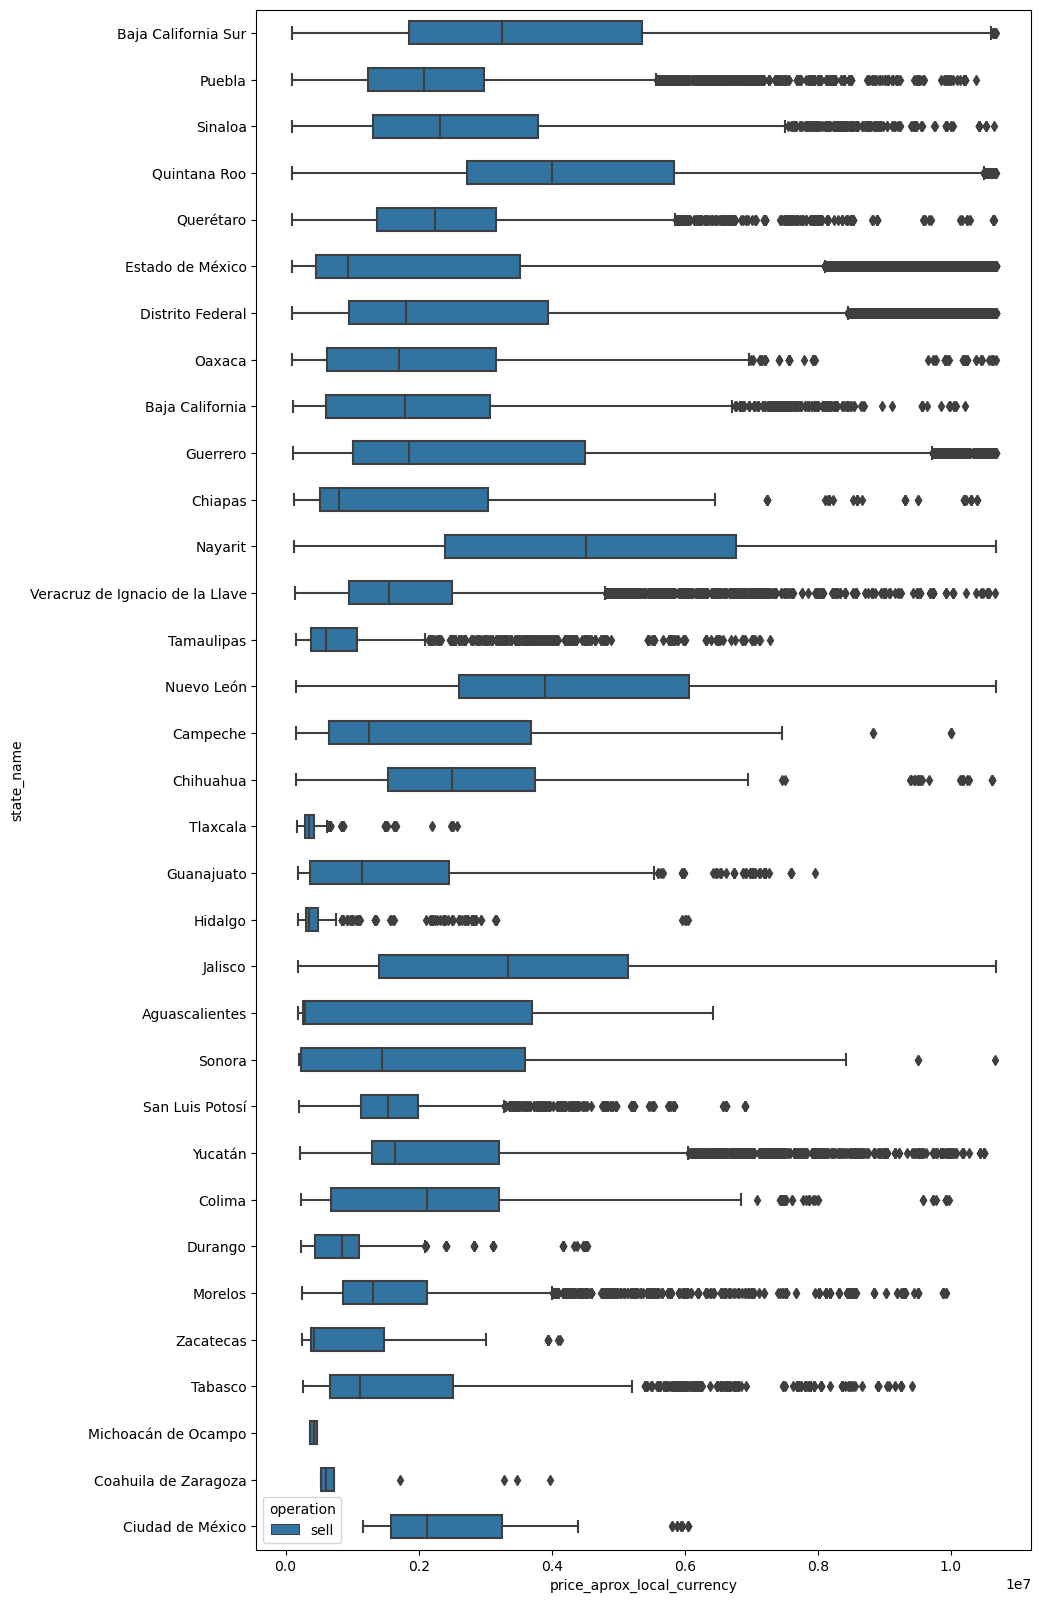

In [230]:
df=minus_outlier_A_S.price_aprox_local_currency
a4_dims=(10,20)
fig,ax=pyplot.subplots(figsize = a4_dims)

sns.boxplot(ax=ax,y='state_name', x=df, data=minus_outlier_A_S,hue ='operation',width=0.5)

15729.18
22841.82
7112.64
14666.590314298568


/var/folders/76/6w3x67rn4k15kv8p4s71fp540000gn/T/ipykernel_68776/41607517.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minus_outlier_A_R=data_apartment_rent[(data.price_aprox_local_currency > Q25 - 1.5*IQR) & (data.price_aprox_local_currency < Q75 + 1.5*IQR)]
/var/folders/76/6w3x67rn4k15kv8p4s71fp540000gn/T/ipykernel_68776/41607517.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minus_outlier_A_R.sort_values(by = 'price_aprox_local_currency',ascending=True ,inplace = True)


<AxesSubplot:xlabel='price_aprox_local_currency', ylabel='state_name'>

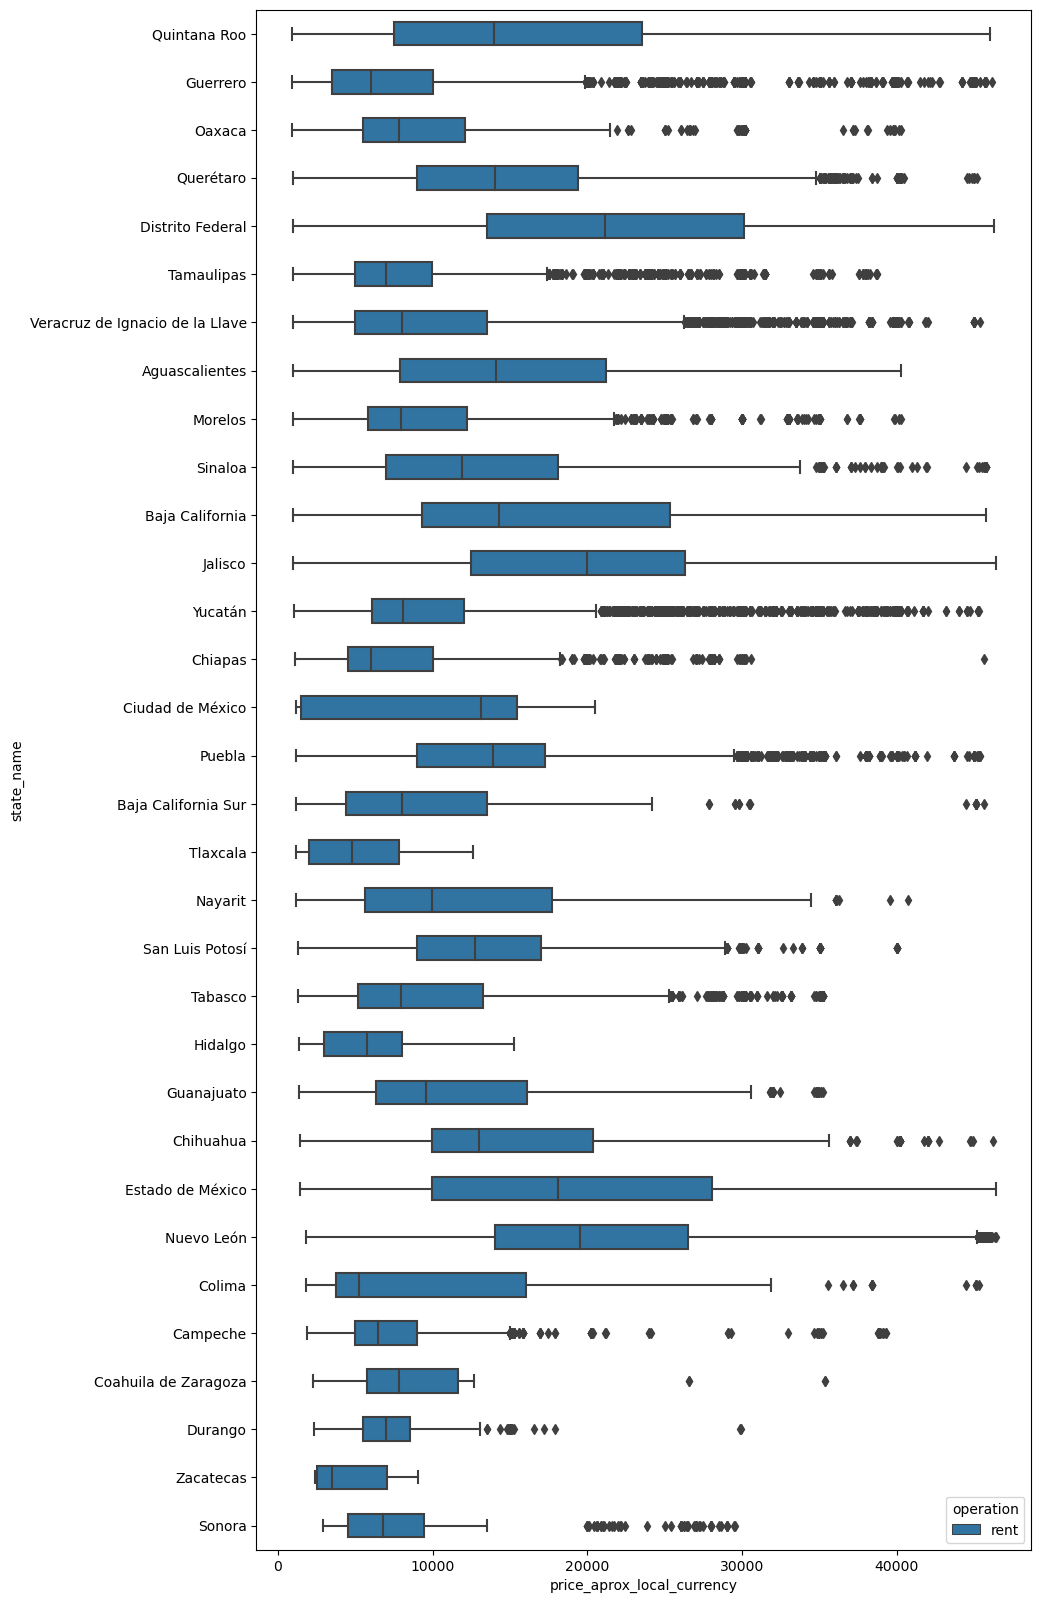

In [231]:
data_apartment_rent=data[(data.property_type== 'apartment') & (data.operation=='rent')]
Q25= data_apartment_rent.price_aprox_local_currency.quantile(0.25)
Q75 = data_apartment_rent.price_aprox_local_currency.quantile(0.75) 
IQR = Q75 - Q25
print(IQR)
print(Q75)
print(Q25)
minus_outlier_A_R=data_apartment_rent[(data.price_aprox_local_currency > Q25 - 1.5*IQR) & (data.price_aprox_local_currency < Q75 + 1.5*IQR)]
minus_outlier_A_R.sort_values(by = 'price_aprox_local_currency',ascending=True ,inplace = True)

df=minus_outlier_A_R.price_aprox_local_currency
a4_dims=(10,20)
fig,ax=pyplot.subplots(figsize = a4_dims)
print (df.mean())

sns.boxplot(ax=ax,y='state_name', x=df, data=minus_outlier_A_R,hue ='operation',width=0.5)

### Insights for Investors

Baja California and Distrito Federal are good states for investors who want to invest in apartments.Median selling price of apartments in these are very relatively low compare to other states and median cost of rent of apartments in these states are about the highest in Mexico.

This translates to higher returns on apartment rentage for investors.




## Property: Store : Operation : Sales and Rent

### Store Sale Price 

4020084.05
5220084.0
1199999.95
2846920.1489691515


/var/folders/76/6w3x67rn4k15kv8p4s71fp540000gn/T/ipykernel_68776/1494851566.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minus_outlier_S_S=data_store_sell[(data.price_aprox_local_currency > Q25 - 1.5*IQR) & (data.price_aprox_local_currency < Q75 + 1.5*IQR)]
/var/folders/76/6w3x67rn4k15kv8p4s71fp540000gn/T/ipykernel_68776/1494851566.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minus_outlier_S_S.sort_values(by = 'price_aprox_local_currency',ascending=True ,inplace = True)


<AxesSubplot:xlabel='price_aprox_local_currency', ylabel='state_name'>

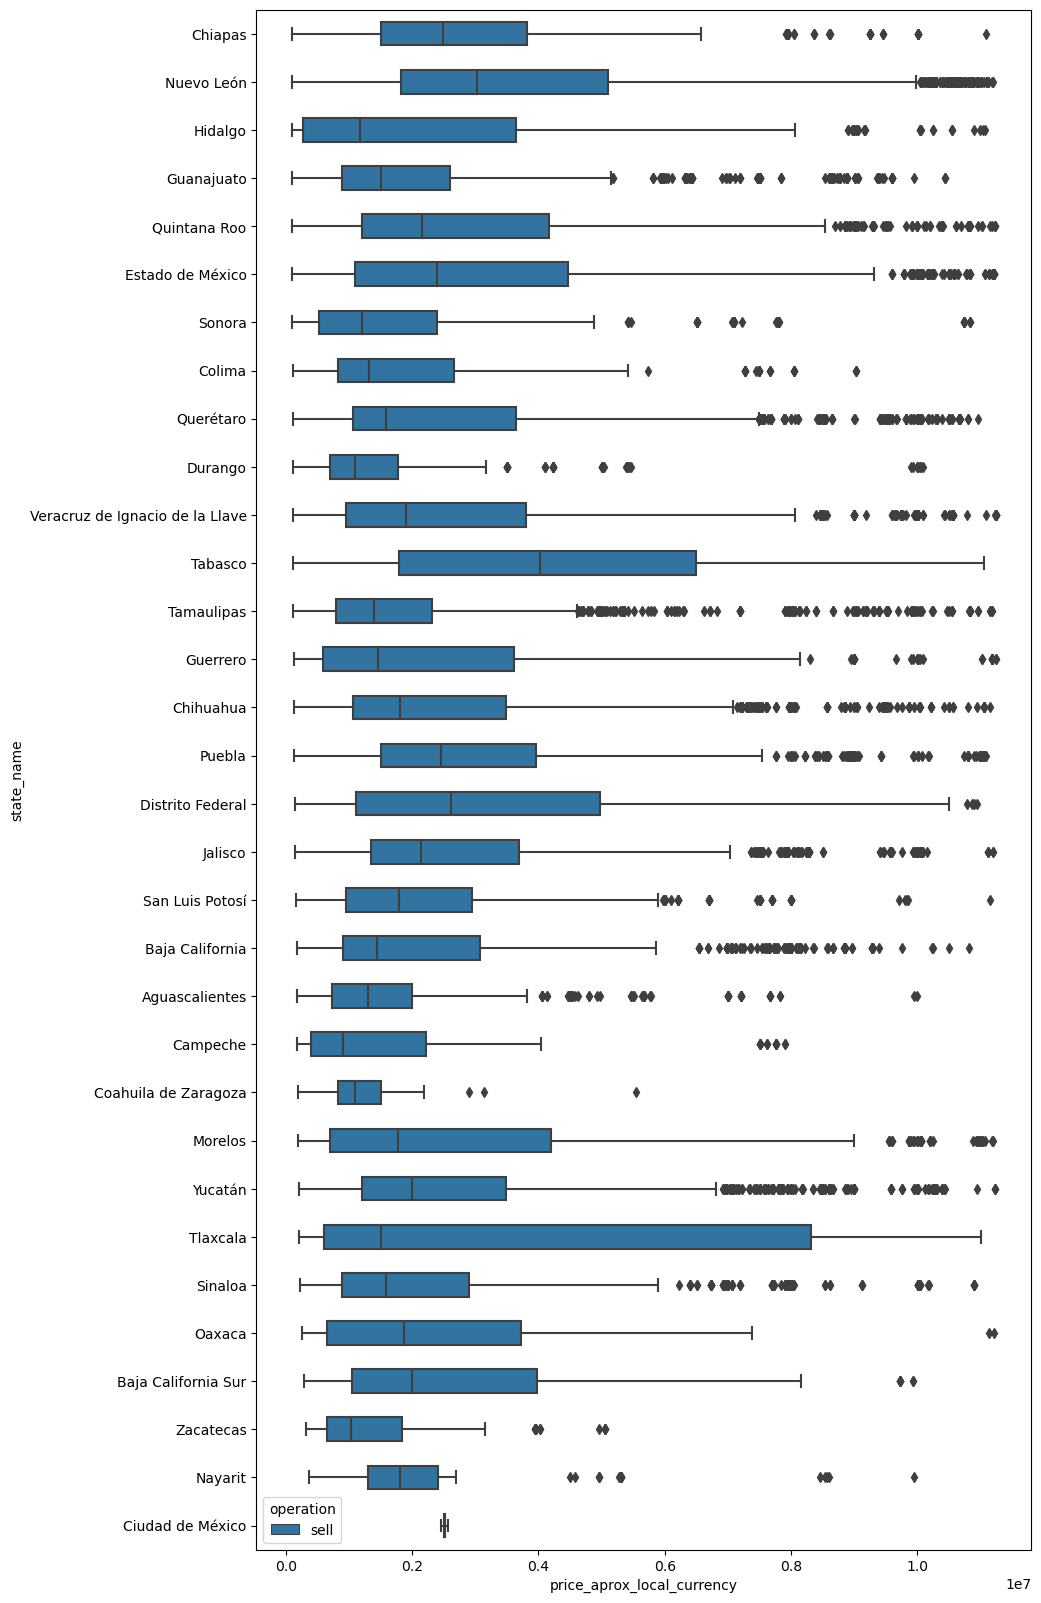

In [232]:
data_store_sell=data[(data.property_type== 'store') & (data.operation=='sell')]
Q25= data_store_sell.price_aprox_local_currency.quantile(0.25)
Q75 = data_store_sell.price_aprox_local_currency.quantile(0.75) 
IQR = Q75 - Q25
print(IQR)
print(Q75)
print(Q25)
minus_outlier_S_S=data_store_sell[(data.price_aprox_local_currency > Q25 - 1.5*IQR) & (data.price_aprox_local_currency < Q75 + 1.5*IQR)]
minus_outlier_S_S.sort_values(by = 'price_aprox_local_currency',ascending=True ,inplace = True)

df=minus_outlier_S_S.price_aprox_local_currency
a4_dims=(10,20)
fig,ax=pyplot.subplots(figsize = a4_dims)
print (df.mean())

sns.boxplot(ax=ax,y='state_name', x=df, data=minus_outlier_S_S,hue ='operation',width=0.5)

Insights:
    
Individual looking for cheapest stores to buy  in Mexico should visit the following states: Queretaro, Tamaulipas,Oaxaca, Hidalgo and Campeche

#### Cost of  Store Rent 

23180.609999999997
31102.489999999998
7921.88
18222.54002644067


/var/folders/76/6w3x67rn4k15kv8p4s71fp540000gn/T/ipykernel_68776/3698313040.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minus_outlier_S_R=data_store_rent[(data.price_aprox_local_currency > Q25 - 1.5*IQR) & (data.price_aprox_local_currency < Q75 + 1.5*IQR)]
/var/folders/76/6w3x67rn4k15kv8p4s71fp540000gn/T/ipykernel_68776/3698313040.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minus_outlier_S_R.sort_values(by = 'price_aprox_local_currency',ascending=True ,inplace = True)


<AxesSubplot:xlabel='price_aprox_local_currency', ylabel='state_name'>

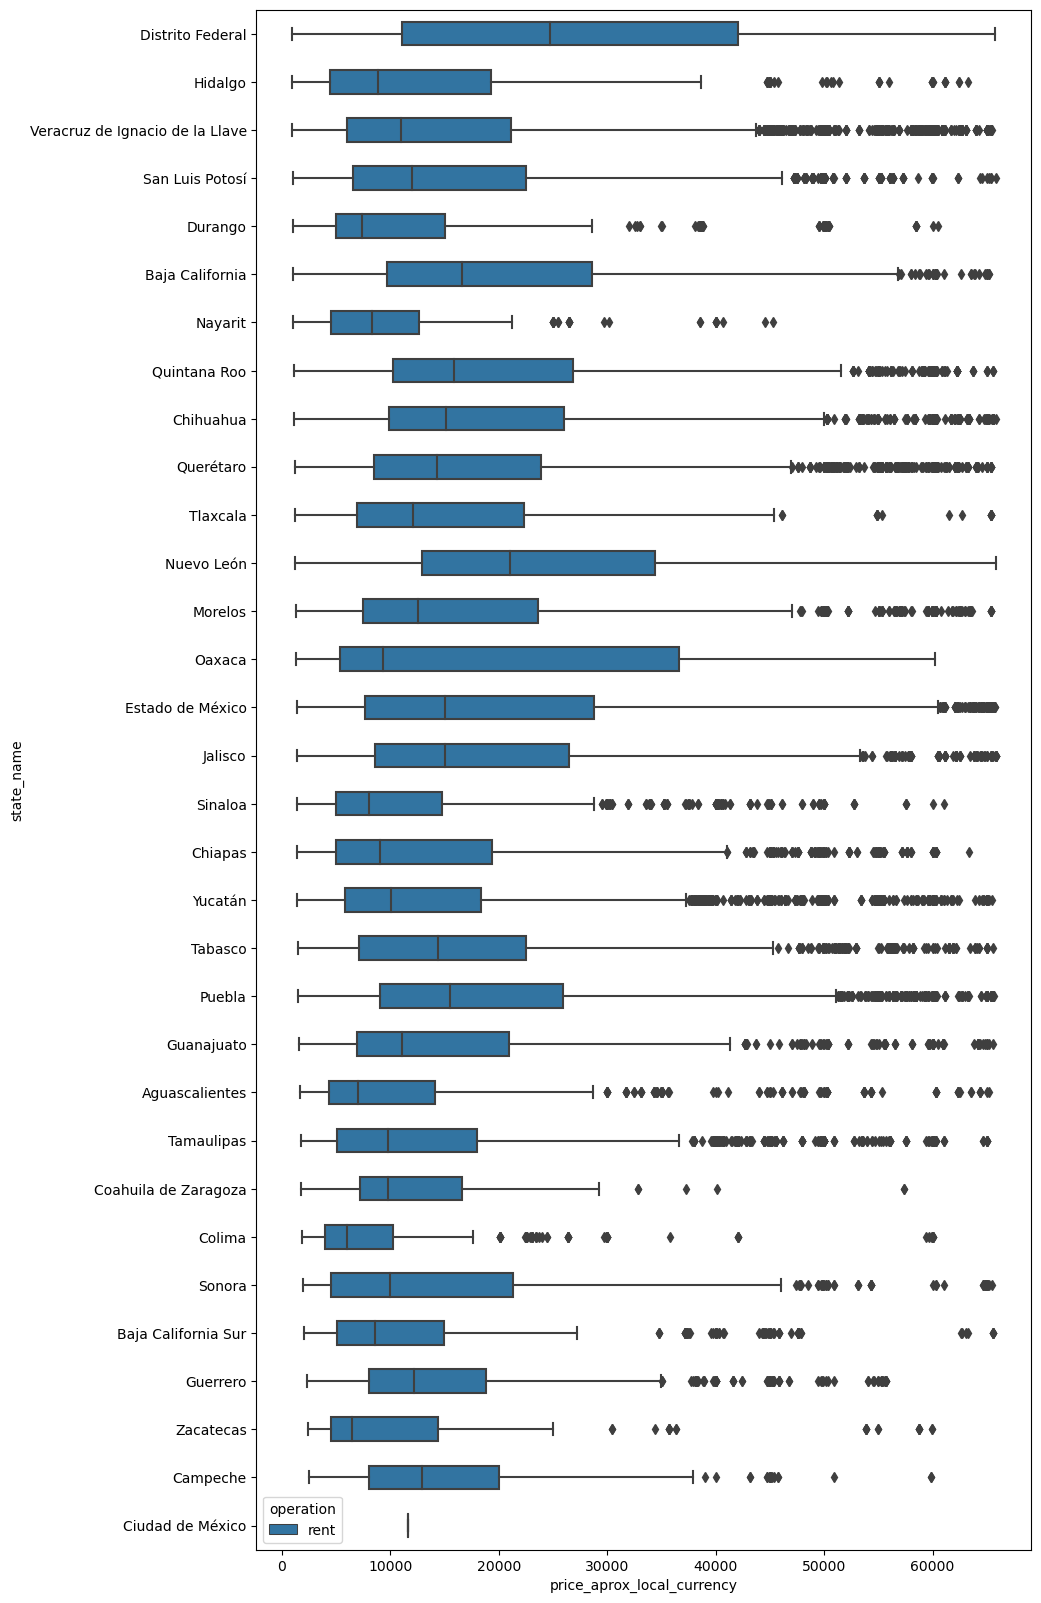

In [233]:
data_store_rent=data[(data.property_type== 'store') & (data.operation=='rent')]
Q25= data_store_rent.price_aprox_local_currency.quantile(0.25)
Q75 = data_store_rent.price_aprox_local_currency.quantile(0.75) 
IQR = Q75 - Q25
print(IQR)
print(Q75)
print(Q25)
minus_outlier_S_R=data_store_rent[(data.price_aprox_local_currency > Q25 - 1.5*IQR) & (data.price_aprox_local_currency < Q75 + 1.5*IQR)]
minus_outlier_S_R.sort_values(by = 'price_aprox_local_currency',ascending=True ,inplace = True)

df=minus_outlier_S_R.price_aprox_local_currency
a4_dims=(10,20)
fig,ax=pyplot.subplots(figsize = a4_dims)
print (df.mean())

sns.boxplot(ax=ax,y='state_name', x=df, data=minus_outlier_S_R,hue ='operation',width=0.5)

Insights:
    
Individual looking for cheapest stores  to rent in Mexico should visit the following states: Hidalgo,Durango and Nayarit

### Analysis of Relationship between price of property and  surace area m2 of property

Drop outliers for the price of property and area m2 of property

In [234]:
Q25= data_house_sell.price_aprox_local_currency.quantile(0.25)
Q75 = data_house_sell.price_aprox_local_currency.quantile(0.75) 
IQR = Q75 - Q25
print(IQR)
print(Q75)
print(Q25)
minus_outlier=data[(data.price_aprox_local_currency > Q25 - 1.5*IQR) & (data.price_aprox_local_currency < Q75 + 1.5*IQR)]
Q25= data_house_sell.surface_total_in_m2.quantile(0.25)
Q75 = data_house_sell.surface_total_in_m2.quantile(0.75) 
IQR = Q75 - Q25
print(IQR)
print(Q75)
print(Q25)
minus_outlier2=minus_outlier[(data.surface_total_in_m2 > Q25 - 1.5*IQR) & (data.surface_total_in_m2 < Q75 + 1.5*IQR)]

2688137.72
3842415.62
1154277.9
206.0
320.0
113.99999999999999


/var/folders/76/6w3x67rn4k15kv8p4s71fp540000gn/T/ipykernel_68776/992868082.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minus_outlier2=minus_outlier[(data.surface_total_in_m2 > Q25 - 1.5*IQR) & (data.surface_total_in_m2 < Q75 + 1.5*IQR)]


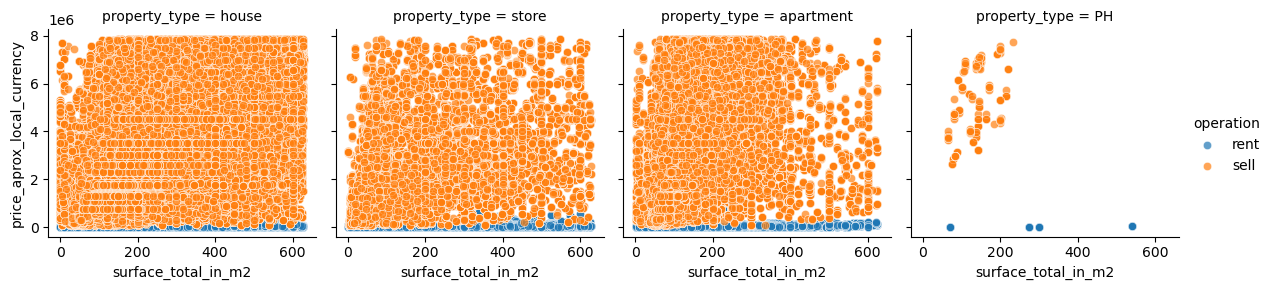

In [235]:
g = sns.FacetGrid(minus_outlier2, col='property_type',hue='operation')
g.map(sns.scatterplot, 'surface_total_in_m2', "price_aprox_local_currency", alpha=.7)
g.add_legend()

[[1.         0.40496328]
 [0.40496328 1.        ]]


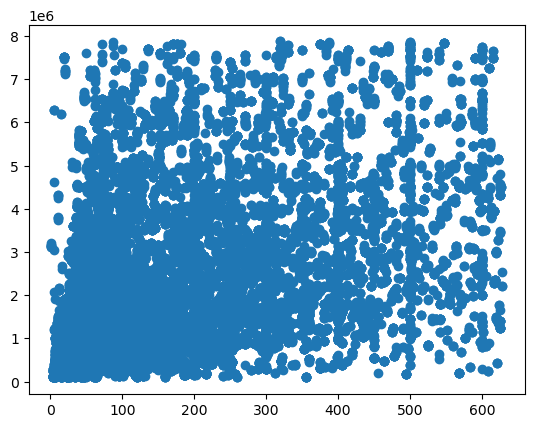

In [236]:
df=minus_outlier2.price_aprox_local_currency[(minus_outlier2.property_type=='store') & (minus_outlier2.operation=='sell')]
df1=minus_outlier2.surface_total_in_m2[(minus_outlier2.property_type=='store') & (minus_outlier2.operation=='sell')]
plt.scatter(df1,df)
corr_mat = np.corrcoef([df1],[df])
print(corr_mat)

[[1.         0.39963634]
 [0.39963634 1.        ]]


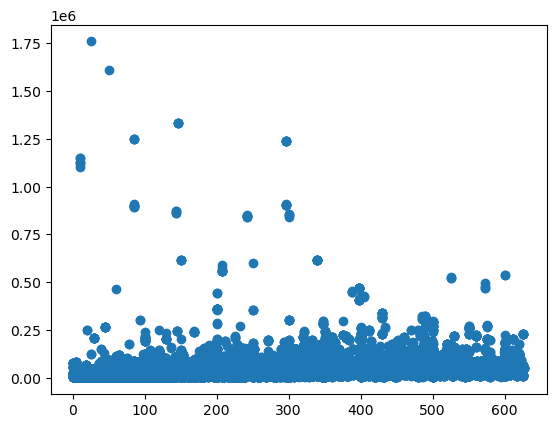

In [237]:
df=minus_outlier2.price_aprox_local_currency[(minus_outlier2.property_type=='store') & (minus_outlier2.operation=='rent')]
df1=minus_outlier2.surface_total_in_m2[(minus_outlier2.property_type=='store') & (minus_outlier2.operation=='rent')]
plt.scatter(df1,df)
corr_mat = np.corrcoef([df1],[df])
print(corr_mat)

[[1.         0.29088954]
 [0.29088954 1.        ]]


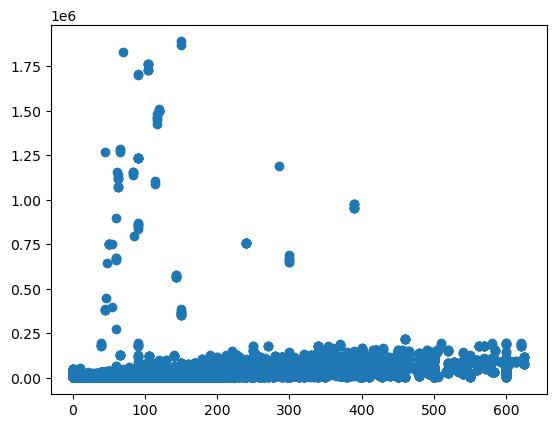

In [238]:
df=minus_outlier2.price_aprox_local_currency[(minus_outlier2.property_type=='apartment') & (minus_outlier2.operation=='rent')]
df1=minus_outlier2.surface_total_in_m2[(minus_outlier2.property_type=='apartment') & (minus_outlier2.operation=='rent')]
plt.scatter(df1,df)
corr_mat = np.corrcoef([df1],[df])
print(corr_mat)

[[1.         0.59739388]
 [0.59739388 1.        ]]


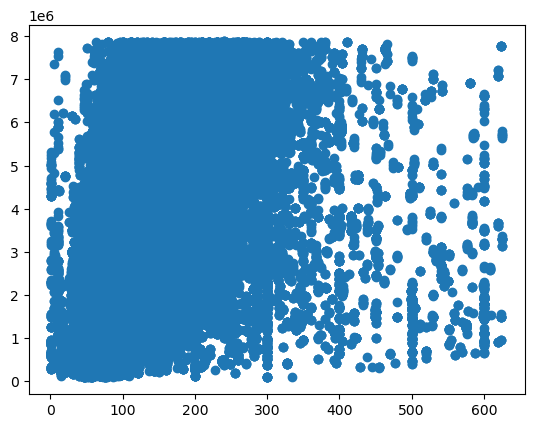

In [239]:
df=minus_outlier2.price_aprox_local_currency[(minus_outlier2.property_type=='apartment') & (minus_outlier2.operation=='sell')]
df1=minus_outlier2.surface_total_in_m2[(minus_outlier2.property_type=='apartment') & (minus_outlier2.operation=='sell')]
plt.scatter(df1,df)
corr_mat = np.corrcoef([df1],[df])
print(corr_mat)
             

[[1.         0.65255353]
 [0.65255353 1.        ]]


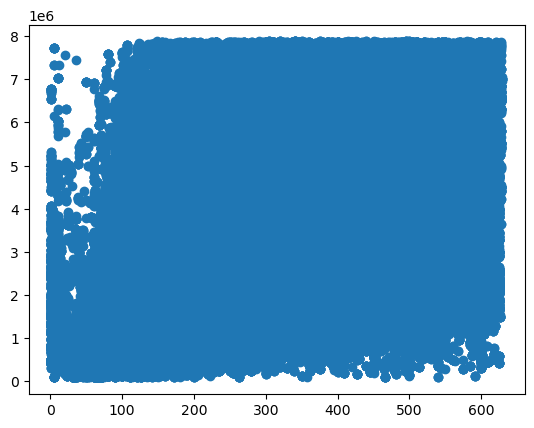

In [240]:
df=minus_outlier2.price_aprox_local_currency[(minus_outlier2.property_type=='house') & (minus_outlier2.operation=='sell')]
df1=minus_outlier2.surface_total_in_m2[(minus_outlier2.property_type=='house') & (minus_outlier2.operation=='sell')]
plt.scatter(df1,df)
corr_mat = np.corrcoef([df1],[df])
print(corr_mat)

[[1.         0.13341515]
 [0.13341515 1.        ]]


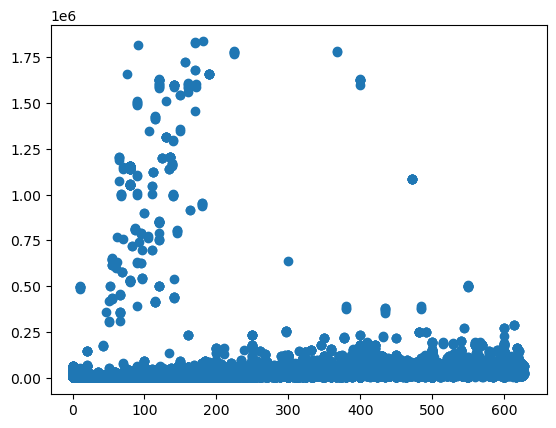

In [241]:
df=minus_outlier2.price_aprox_local_currency[(minus_outlier2.property_type=='house') & (minus_outlier2.operation=='rent')]
df1=minus_outlier2.surface_total_in_m2[(minus_outlier2.property_type=='house') & (minus_outlier2.operation=='rent')]
plt.scatter(df1,df)
corr_mat = np.corrcoef([df1],[df])
print(corr_mat)

The correlation between the prices of the properties and thier surface area is positive but it is not very strong. according to the dataset.Area of the properties is not a strong determinant of thier prices. Properties of the same m2 area  at different locations have different prices.

The correlation between price and m3 area is stongest in the sales of houses, about poistive  0.7. The size of houses  Mexico is stong determinant of the price they will sold. However, there is no such correlation in house rent in Mexico. The size of the house does have much influence on the costo of the rent. The correlation between both is very weak at positive 0.15.

Similarly, m2 area of the apartments and stores  does have  fair influence on thier selling price.The correlation between area of apartment and their selling price is fairly stronger  at postive 0.6. However, the correlation between area and price  is weeker for stores at positive 0.4.


Conserverly, the relationship between the cost of rent of apartments and thier area is weak, the correlation is positive 0.38 while that of store is positive 0.36.


For individual who like o rent  big apartments and house, they go to the states Oaxaca , Colima and the likes   to get bigger houses and apartments at comparatively cheaper price. 

In [242]:
data["Date"]=pd.to_datetime(data['created_on'],format = '%Y-%m-%d')

/var/folders/76/6w3x67rn4k15kv8p4s71fp540000gn/T/ipykernel_68776/3646534121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"]=pd.to_datetime(data['created_on'],format = '%Y-%m-%d')


In [248]:
data.head(10)

created_on operation property_type    place_name    state_name        lat  \
0   2015-01-05      rent         house       Morelos       Morelos  18.824124   
1   2015-01-05      rent         house       Morelos       Morelos  18.825402   
2   2015-01-05      rent         store       Morelos       Morelos  18.823515   
3   2015-01-05      rent         store       Tabasco       Tabasco  17.994583   
7   2015-02-20      rent         house  Quintana Roo  Quintana Roo  21.133346   
8   2014-11-20      rent     apartment  Quintana Roo  Quintana Roo  18.509356   
9   2014-11-20      rent         store  Quintana Roo  Quintana Roo  18.509356   
10  2015-02-26      rent     apartment  Quintana Roo  Quintana Roo  21.152753   
11  2015-02-24      rent         house        Colima        Colima  19.253490   
12  2015-02-24      rent         store        Colima        Colima  19.248841   

           lon    price currency  price_aprox_local_currency  price_aprox_usd  \
0   -98.948113  10000.0      MXN                    11184.51           631.99   
1   -98.946803  20000.0      MXN                    22485.30          1270.55   
2   -98.949789   5000.0      MXN                     5652.51           319.40   
3   -93.386271   8000.0      MXN                     7586.83           428.70   
7   -86.861353  12500.0      MXN                    14638.67           827.17   
8   -88.314668   4150.0      MXN                     4761.45           269.05   
9   -88.314668   4000.0      MXN                     4589.44           259.33   
10  -86.849743   9500.0      MXN                    10500.86           593.36   
11 -103.714803   9000.0      MXN                     9375.85           529.79   
12 -103.726948   2500.0      MXN                     2604.33           147.16   

    surface_total_in_m2  price_usd_per_m2  price_per_m2       Date  
0                 500.0          1.263980     20.000000 2015-01-05  
1                 480.0          2.646979     41.666667 2015-01-05  
2                 180.0          1.774444     27.777778 2015-01-05  
3                 528.0          0.811932     15.151515 2015-01-05  
7                 190.0          4.353526     65.789474 2015-02-20  
8                  40.0          6.726250    103.750000 2014-11-20  
9                  12.0         21.610833    333.333333 2014-11-20  
10                 95.0          6.245895    100.000000 2015-02-26  
11                225.0          2.354622     40.000000 2015-02-24  
12                 35.0          4.204571     71.428571 2015-02-24

In [249]:
data['month'] = pd.to_datetime(data['Date']).dt.month


/var/folders/76/6w3x67rn4k15kv8p4s71fp540000gn/T/ipykernel_68776/2692274109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = pd.to_datetime(data['Date']).dt.month


In [263]:
data['year'] = pd.to_datetime(data['Date']).dt.year

/var/folders/76/6w3x67rn4k15kv8p4s71fp540000gn/T/ipykernel_68776/638735201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = pd.to_datetime(data['Date']).dt.year


In [250]:
mean_house_rent_per_state = data[(data.property_type == 'house') & (data.operation== 'rent')].groupby("month")["price_aprox_local_currency"].median()
mean_house_rent_per_state


month
1     14007.54
2     13922.25
3     14007.00
4     13732.54
5     13299.78
6     13614.85
7     13999.95
8     14086.06
9     13550.04
10    13694.91
11    13550.04
12    13863.53
Name: price_aprox_local_currency, dtype: float64

### Insight for Tenants:

For some reasons that needs further investigation, the rent of of houses are slightly lower in `September, May and November while the house rent  is highest in July and August.



In [252]:
data.Date.min()

Timestamp('2014-07-01 00:00:00')

In [253]:
data.Date.max()

Timestamp('2018-02-01 00:00:00')

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'date_column' is the name of your date column
# Assuming 'price' is the name of your price column

# Convert 'date_column' to datetime if not already
data['date_column'] = pd.to_datetime(data['date_column'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data['date_column'], data['price'], marker='o', linestyle='-')
plt.title('Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [260]:
price=data['price'].loc[data.property_type=="house"]
date=data['Date'].loc[data.property_type=="house"]

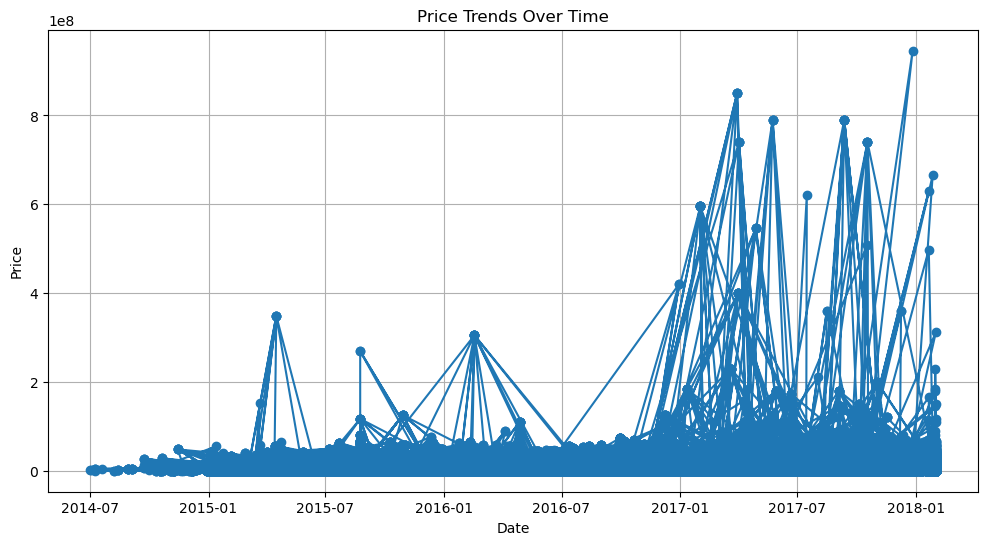

In [262]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(date, price, marker='o', linestyle='-')
plt.title('Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [268]:
data[(data['property_type'] == 'house') & (data['operation'] == 'rent')].groupby('year')['price'].mean()


year
2014    17328.125000
2015    18720.583664
2016    20307.195872
2017    18995.551158
2018    20812.379138
Name: price, dtype: float64

In [271]:
data[(data['property_type'] == 'house') & (data['operation'] == 'sell')].groupby('year')['price'].mean()

year
2014    4.005512e+06
2015    3.305398e+06
2016    3.497030e+06
2017    3.260381e+06
2018    3.776242e+06
Name: price, dtype: float64

In [272]:
data[(data['property_type'] == 'store') & (data['operation'] == 'rent')].groupby('year')['price'].mean()

year
2014    16145.841463
2015    25116.532088
2016    30049.153124
2017    30639.308870
2018    29555.797747
Name: price, dtype: float64

In [273]:
data[(data['property_type'] == 'store') & (data['operation'] == 'sell')].groupby('year')['price'].mean()

year
2014    1.963500e+06
2015    4.583910e+06
2016    5.776661e+06
2017    4.502766e+06
2018    5.251455e+06
Name: price, dtype: float64